Index

0 : Unzipping of Nested Dataset using os
1.1 : Creating 2-Pickles for alcohol and control
1.2 : Creating Pickles for every recording
    
2.1 : Understanding the data (Selected one alcohol and control recording)
2.11 : Grouped random channel 'FT7' on the basis of stimulus and plotted
2.12 : Grouped random channel 'FT7' on the basis of alcohol and control and plotted
2.13 : Grouped random channel 'FT7' on the basis of stimulus and plotted mean on scatter plot
2.14 : Grouped all channels on the basic of stimulus and plotted mean on scatter plot
2.15 : Grouped all channels on the basic of alcohol and control and plotted mean
2.16 : Grouped all channels on the basic of alcohol and control and plotted mean on Histogram
2.17 : Grouped all channels on the basic of alcohol and control and plotted Empirical Cumulative Distribution
      Function (ECDF)
        
2.2 : Data  Visualization (All alcohol and control recording)        
2.21 : Grouped all channels on the basic of alcohol and control and plotted mean
2.22 : Grouped all channels on the basic of alcohol and control and plotted Heatmaps
2.23 : Grouped all channels on the basic of stimulus and plotted Heatmaps
2.31 : Grouped all channels on the basic of alcohol and control and plotted ECDF
2.32 : Grouped all channels on the basic of stimulus and plotted ECDF

3 : Correlation
3.11 : Cross-Correlations across different channels grouped by stimulus in a recording  
3.12 : Plotted Correlations using networkx
3.12 : Observing and Ploting Highest Cross-Correlation Pairs across different channels in every alcohol recording for S1 obj
3.13 : Observing and Ploting Highest Cross-Correlation Pairs across different channels in every alcohol recording for S1 match
3.14 : Observing and Ploting Highest Cross-Correlation Pairs across different channels in every alcohol recording for S1 nomatch
3.21 : Observing and Ploting Highest Cross-Correlation Pairs across different channels in every control recording for S1 obj
3.22 : Observing and Ploting Highest Cross-Correlation Pairs across different channels in every control recording for S1 match
3.23 : Observing and Ploting Highest Cross-Correlation Pairs across different channels in every control recording for S1 nomatch
3.3 : Observing that Y and nd is most Correlated
    
4 : Hypothesis Testing
4.1 : Restructuring Dataset to accommodate mean, std and number of observations
4.2 : Defining and calculating Hypothesis
4.21 : Hypothesis testing across S1 obj and Analyzing the results
4.22 : Hypothesis testing across S1 match and Analyzing the results
4.23 : Hypothesis testing across S1 nomatch and Analyzing the results
4.3 : Common accpeted and rejected channels after Hypothesis Test of all 122 recordings
4.41 : Correlation between stimulus of Alcohol 
4.42 : Correlation between stimulus of Control 
4.43 : Correlation between S1 obj 
4.44 : Correlation between s2 match
4.45 : Correlation between s2 nomatch      
    

In [ ]:
Introduction

Dataset contains 122 recordings 77 Alcoholic and 45 Control
Each recoring contains results of various trails 
Each trail was observed on 64 channels/sensors
There were 3 major stimulus S1 obj, s2 match and s2 nomatch


# Pickled Dataset
# First Self-Visualized dataset by plot one channel of a alcohol and a control recording
# Plotted Heatmap and ECDF for complete data visualization
# Calculated cross-correlations, plotted and analyzed them
# Conducted Hypothesis Testing, plotted and concluded results


In [ ]:
## 0 Unzipping of Nested Dataset ##

#written a small script to unzip/gzip all nested database files

import os
f=os.listdir("eeg_full")
for l in f:
    os.system("gzip -d eeg_full"+'/'+l+'/'+l+'/*.gz')

In [ ]:
## 1.1 Creating 2-Pickles for alcohol and control ##

# Not using becuase of big load on memory

import os,pickle

# Tried pickling of two groups i.e. alcohol and control
# Data Structure is multileveled first level is a list, second level is 2 dictionaries, one for alcohol and
# second for control, third level contains a dictionary with key i.e. filename and value i.e. another dictionary
# Forth level is a dictionary contains key i.e. stimulus and value i.e. another dictionary
# Fifth level is a dictionary contains key i.e. channel code and value i.e. list
# Sixth level is a list that conatins values corresponding to channels 
# Not using it, as both pickles were still too big to load in Memory

path="eeg_full"
dir=os.listdir(path)
no_scan=["parser.py","tempfile.txt","dirparser.py"]
data=[{},{}]
for d in dir:
    if d[3]=='a':
        dpara=0
    else:
        dpara=1  
    for f in os.listdir(path+"/"+d+"/"+d):
            if f not in no_scan:
                fw=open(path+'/'+d+'/'+d+'/'+f,"r")
                fool=0
                for l in fw:
                    row=l.split()
                    #print(row)
                    if d not in data[dpara]:
                         data[dpara][d]={}
                    if fool<=4:
                        if fool==3:
                            temp=l.split(",")
                            stimulus=temp[0].replace("#","").strip()
                            if stimulus not in data[dpara][d]:
                                   data[dpara][d][stimulus]={}
                        fool+=1 
                    elif fool>4:
                        if len(row)==4:
                                if row[1] not in list(data[dpara][d][stimulus].keys()): 
                                    data[dpara][d][stimulus][row[1]]=[]
                                    # if (stimulus=="S2 match"):    
                                    #      print(l, "here for ",row[1],len(list(data[dpara][d][stimulus].keys())))
                                data[dpara][d][stimulus][row[1]].append(row[3])
a_pickle=open("alcohol_pickle","wb")
pickle.dump(data[0],a_pickle)
c_pickle=open("control_pickle","wb")
pickle.dump(data[1],c_pickle)
a_pickle.close()   
c_pickle.close()

In [ ]:
## 1.2 : Creating Pickles for every recording ##
    
import os,pickle

# Pickling
# Accumulated readings of all channels in all trails and grouped them as stimulus
# Stored Pickles of every file/recording separate
# Data is a multi-dimentional dictionary 
# First level dictionary conatins Key i.e. stimulus (S1 obj, S2 match etc) and value i.e. dictionary
# Second level dictionary contains key i.e. channel and value i.e. list
# Third level contains their corresponding channel values

path="eeg_full"
a_count,c_count,dir_count=0,0,0
dir=os.listdir(path)
no_scan=["parser.py","tempfile.txt","dirparser.py"]
for d in dir:    
    #print(dir_count)
    if d[3]=='a':
        dpara=a_count
        a_count+=1
    else:
        dpara=c_count
        c_count+=1
    dir_count+=1        
    data={}
    for f in os.listdir(path+"/"+d+"/"+d):
            if f not in no_scan:
                fw=open(path+'/'+d+'/'+d+'/'+f,"r")
                fool=0
                for l in fw:
                    row=l.split()
                    if fool<=4:
                        if fool==3:
                            temp=l.split(",")
                            stimulus=temp[0].replace("#","").strip()
                            if stimulus not in data:
                                   data[stimulus]={}
                        fool+=1 
                    elif fool>4:
                        if len(row)==4:
                                if row[1] not in list(data[stimulus].keys()): 
                                    data[stimulus][row[1]]=[]
                                data[stimulus][row[1]].append(row[3])
    t_pickle=open("pickles/"+d[3]+str(dpara),"wb")
    pickle.dump(data,t_pickle)
    del data
    t_pickle.close()

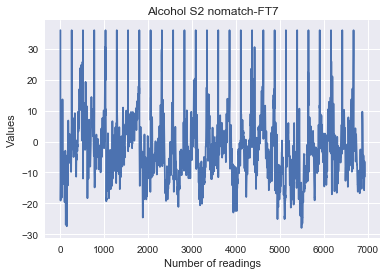

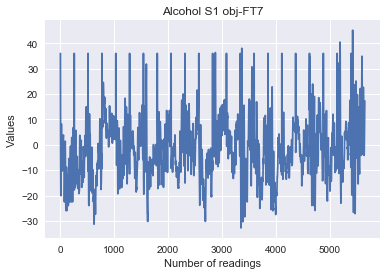

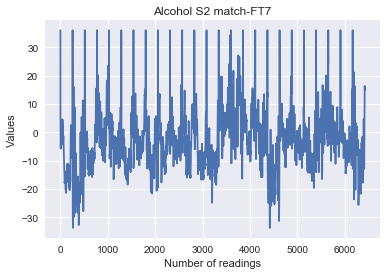

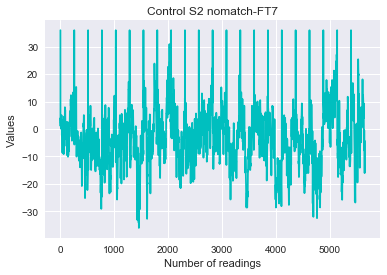

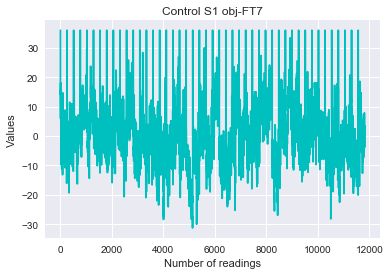

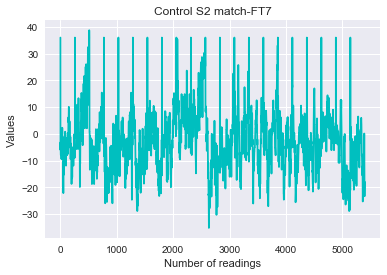

In [23]:
## 2.1 Understanding the data ##
# Selected one alcohol and control recording

import matplotlib.pyplot as plt
import pickle

# Grouped FT7 channel based upon stimulus
# 3 Stimulus Graphs of "FT7" channel of an Alcohol and a Control Recording

data=pickle.load(open("pickles/a0","rb"))
for stimulus in data:
    for channel in data[stimulus]:
        if channel=="FT7":
             plt.title("Alcohol "+stimulus+"-"+channel)
             plt.xlabel("Number of readings") 
             plt.ylabel("Values")
             plt.plot([i for i in range (0,len(data[stimulus][channel]))],data[stimulus][channel])
             plt.show()
                
cdata=pickle.load(open("pickles/c1","rb"))
#print(cdata.keys())
for stimulus in cdata:
    for channel in cdata[stimulus]:
        if channel=="FT7":
             plt.title("Control "+stimulus+"-"+channel)
             plt.xlabel("Number of readings") 
             plt.ylabel("Values")
             plt.plot([i for i in range (0,len(cdata[stimulus][channel]))],cdata[stimulus][channel],color='c')
             plt.show()                


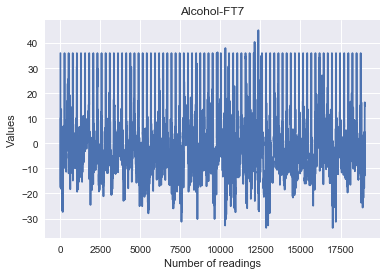

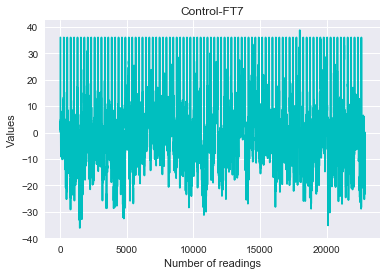

In [24]:
## 2.2 ##

# Graph representing channel "FT7" corresponding to every trail in an Alcohol and Control recording

temp=[]
for stimulus in data:
    for channel in data[stimulus]:
        if channel=="FT7":
            temp.extend(data[stimulus][channel])

plt.title("Alcohol-FT7")
plt.xlabel("Number of readings") 
plt.ylabel("Values")
plt.plot([i for i in range (0,len(temp))],temp)
plt.show()

temp=[]
for stimulus in cdata:
    for channel in cdata[stimulus]:
        if channel=="FT7":
            temp.extend(cdata[stimulus][channel])

plt.title("Control-FT7")
plt.xlabel("Number of readings") 
plt.ylabel("Values")
plt.plot([i for i in range (0,len(temp))],temp,color='c')
plt.show()
                      

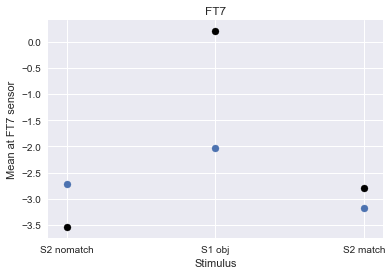

In [29]:
## 2.3 ##

import statistics as s
import numpy as np

# Scatter Graph of mean of three stimulus of channel "FT7" of an Alcohol(##BLUE##) and Control(##BLACK##)
# recording.

temp={}
for stimulus in data:
    for channel in data[stimulus]:
        if channel=="FT7":
            temp[stimulus]=np.mean([float(i) for i in data[stimulus][channel]])
plt.scatter([i for i in range (0,len(temp.keys()))],[temp[i] for i in temp]) 
#plt.xticks([i for i in range (0,len(temp.keys()))],[i for i in temp])
#plt.show()

temp={}
for stimulus in cdata:
    for channel in cdata[stimulus]:
        if channel=="FT7":
            temp[stimulus]=np.mean([float(i) for i in cdata[stimulus][channel]])
            
plt.scatter([i for i in range (0,len(temp.keys()))],[temp[i] for i in temp],color='k') 
plt.xticks([i for i in range (0,len(temp.keys()))],[i for i in temp])
plt.title("FT7")
plt.xlabel("Stimulus")
plt.ylabel("Mean at FT7 sensor")
plt.show()
             

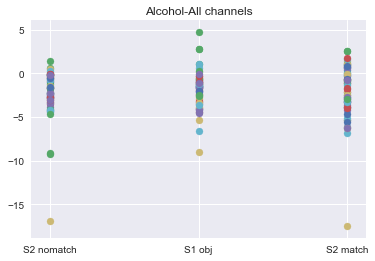

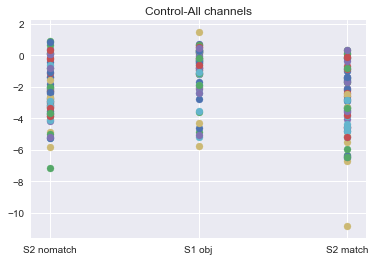

In [34]:
## 2.4 ##

#Values of all channels corresponding to Stimuli of a Alcohol and Control recording

temp={}
ts=[]
for stimulus in data:    
    for channel in data[stimulus]:
        if channel not in temp:
            temp[channel]=[]
        temp[channel].append(np.mean([float(i) for i in data[stimulus][channel]])) 
    ts.append(stimulus)
#print(temp,ts)

for channel in temp:
    plt.title("Alcohol-All channels")
    plt.scatter([i for i in range(0,len(ts))],temp[channel])
    plt.xticks([i for i in range(0,len(ts))],[i for i in ts])
plt.show()

temp={}
ts=[]
for stimulus in cdata:    
    for channel in cdata[stimulus]:
        if channel not in temp:
            temp[channel]=[]
        temp[channel].append(np.mean([float(i) for i in cdata[stimulus][channel]])) 
    ts.append(stimulus)
#print(temp,ts)

for channel in temp:
    plt.title("Control-All channels")
    plt.scatter([i for i in range(0,len(ts))],temp[channel])
    plt.xticks([i for i in range(0,len(ts))],[i for i in ts])
plt.show()

# Observed differnce in limits over y axis Alcohol [5,-20] and control [2,-10]

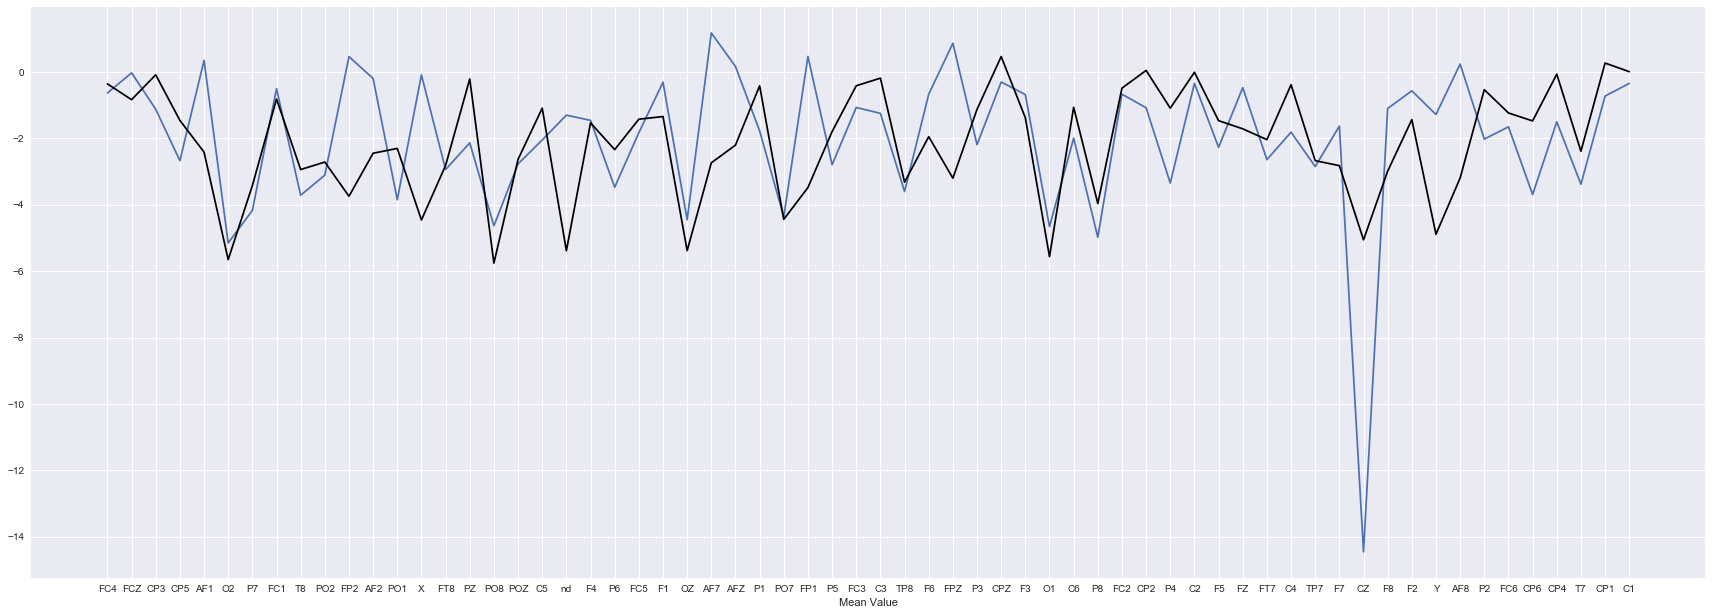

In [46]:
## 2.5 ##

# Graph of mean of all channels of an alcohol (blue) and control(black) recording. (irrespective of stimuli)

temp={}
t=[]
for stimulus in data:    
    for channel in data[stimulus]:
        if channel not in temp:
            temp[channel]=[]
        temp[channel].append(np.mean([float(i) for i in data[stimulus][channel]])) 
##
plt.plot([i for i in range(0,len(temp.keys()))],[np.mean(temp[l]) for l in temp])


temp={}
t=[]
for stimulus in cdata:    
    for channel in cdata[stimulus]:
        if channel not in temp:
            temp[channel]=[]
        temp[channel].append(np.mean([float(i) for i in cdata[stimulus][channel]])) 
##
plt.plot([i for i in range(0,len(temp.keys()))],[np.mean(temp[l]) for l in temp],color='k')


plt.rcParams.update({'font.size': 20})
plt.xticks([i for i in range(0,len(temp.keys()))],[i for i in temp.keys()])        
fig = plt.gcf()
fig.set_size_inches(30, 10.5)
plt.xlabel("Channels")
plt.xlabel("Mean Value")
plt.show() 


# Their is a significant difference and in the case of alcohol, As we can see CZ channels gives minimum value

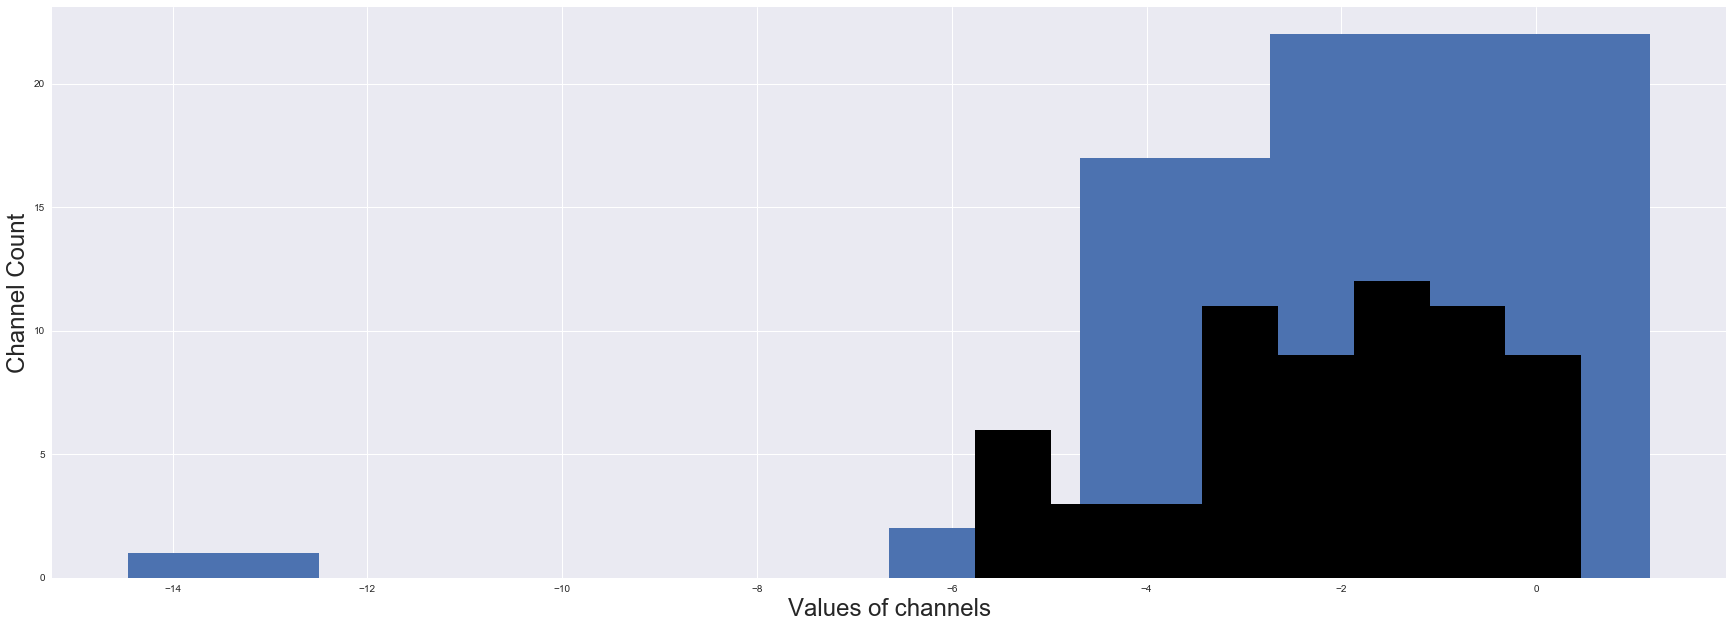

In [49]:
## 2.6 ##

# Histogram with Seaborn: Mean of channels of a Alcohol(blue) and Control (black) Recording
# Calculated bins for histogram as sqrt of total data size

import numpy as np
import seaborn as sns

temp={}
t=[]
for stimulus in data:    
    for channel in data[stimulus]:
        if channel not in temp:
            temp[channel]=[]
        temp[channel].append(np.mean([float(i) for i in data[stimulus][channel]])) 
   
# #
sns.set()
n_bins=int(np.sqrt(len(temp)))
plt.hist([np.mean(temp[l]) for l in temp],bins=n_bins)

temp={}
t=[]
for stimulus in cdata:    
    for channel in cdata[stimulus]:
        if channel not in temp:
            temp[channel]=[]
        temp[channel].append(np.mean([float(i) for i in cdata[stimulus][channel]])) 
   
# #
sns.set()
n_bins=int(np.sqrt(len(temp)))
plt.hist([np.mean(temp[l]) for l in temp],bins=n_bins,color='k')

plt.rcParams.update({'font.size': 20})
plt.xlabel("Values of channels",fontsize=24)
plt.ylabel("Channel Count",fontsize=24)       
fig = plt.gcf()
fig.set_size_inches(30, 10.5)
plt.show() 

#This gives a clear indication of the difference

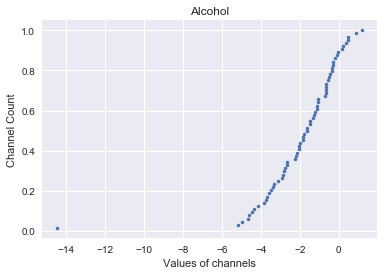

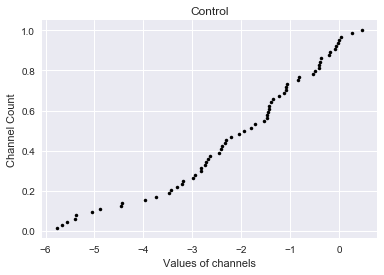

In [51]:
## 2.17 ##

# ECDF Plot of Channels of a Alcohol and Control Recording

import numpy as np
import seaborn as sns

temp={}
t=[]
for stimulus in data:    
    for channel in data[stimulus]:
        if channel not in temp:
            temp[channel]=[]
        temp[channel].append(np.mean([float(i) for i in data[stimulus][channel]])) 
   
# #

x=np.sort([np.mean(temp[l]) for l in temp])
y=np.arange(1,len(x)+1)/len(x)
plt.plot(x,y,marker='.',linestyle='none')
plt.title("Alcohol")
plt.xlabel("Values of channels")
plt.ylabel("Channel Count")       
plt.show()

temp={}
t=[]
for stimulus in cdata:    
    for channel in cdata[stimulus]:
        if channel not in temp:
            temp[channel]=[]
        temp[channel].append(np.mean([float(i) for i in cdata[stimulus][channel]])) 
   
# #

x=np.sort([np.mean(temp[l]) for l in temp])
y=np.arange(1,len(x)+1)/len(x)
plt.plot(x,y,marker='.',linestyle='none',color='k')
plt.title("Control")
plt.xlabel("Values of channels")
plt.ylabel("Channel Count")       
plt.show()

# In Case of Alcohol we can see steep slope and in the case of control we can observe a more linear (ex x=y) curve.

# Here we can deduce that in case of Alcohol 20% of channels has -3.8 or less values
# About 90% of channels has 0 or less values 
# In case of Control 20% of channels has -2 or less values
# About 90% of channels has 0 or less values 


In [53]:
# Calculating mean of all channels in a recording, then in all 122 recordings of Alcohol and control

c_data=[]
a_data=[]

for files in range (0,45):
    tdata=pickle.load(open("pickles/c"+str(files),"rb"))
    tmean=[]
    for stimulus in tdata:    
        for channel in tdata[stimulus]:
            #print (channel,stimulus)
            tmean.append(np.mean([float(i) for i in tdata[stimulus][channel]]))
    c_data.append(np.mean(tmean))
    del tdata
    
for files in range (0,77):
    tdata=pickle.load(open("pickles/a"+str(files),"rb"))
    tmean=[]
    for stimulus in tdata:    
        for channel in tdata[stimulus]:
            #print (channel,stimulus)
            tmean.append(np.mean([float(i) for i in tdata[stimulus][channel]]))
    a_data.append(np.mean(tmean))
    del tdata


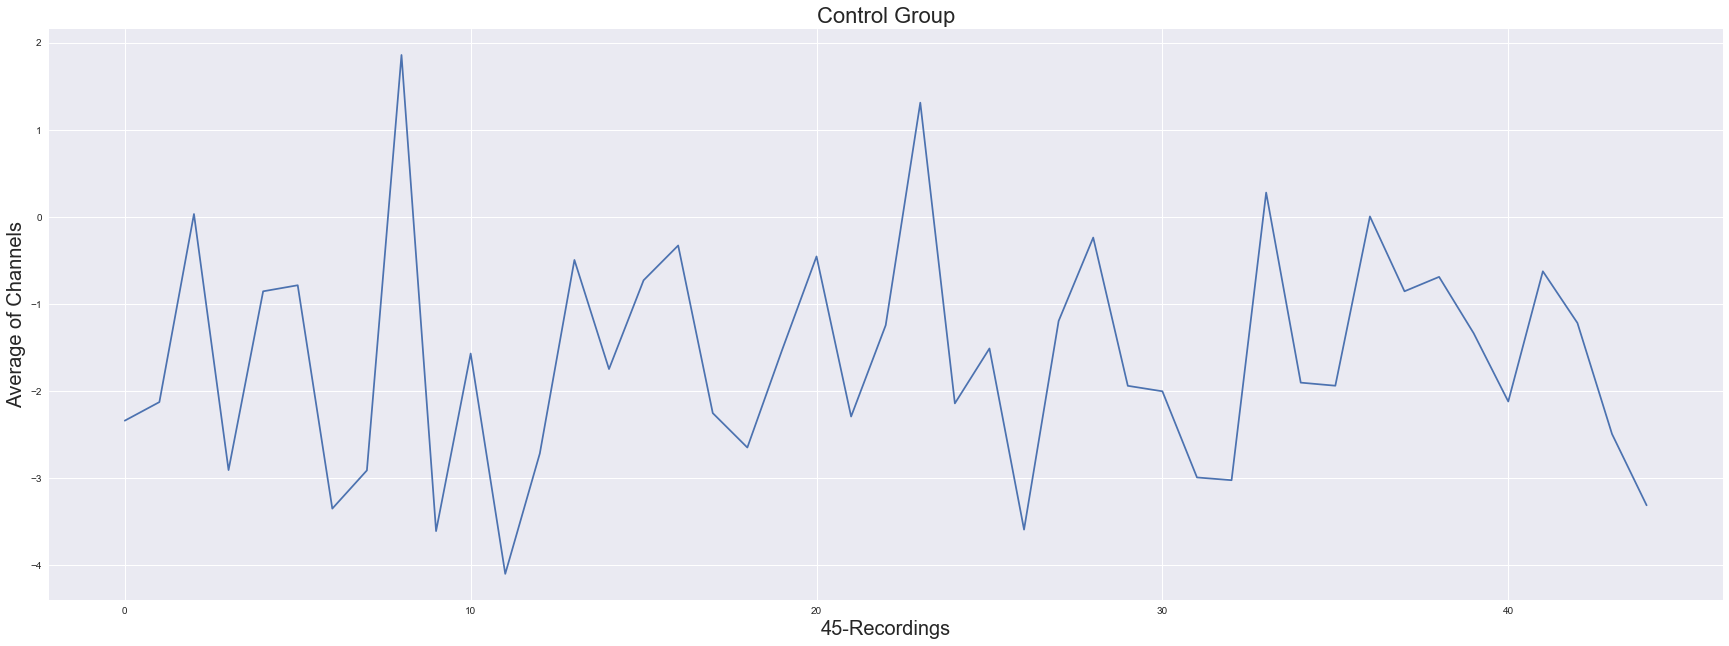

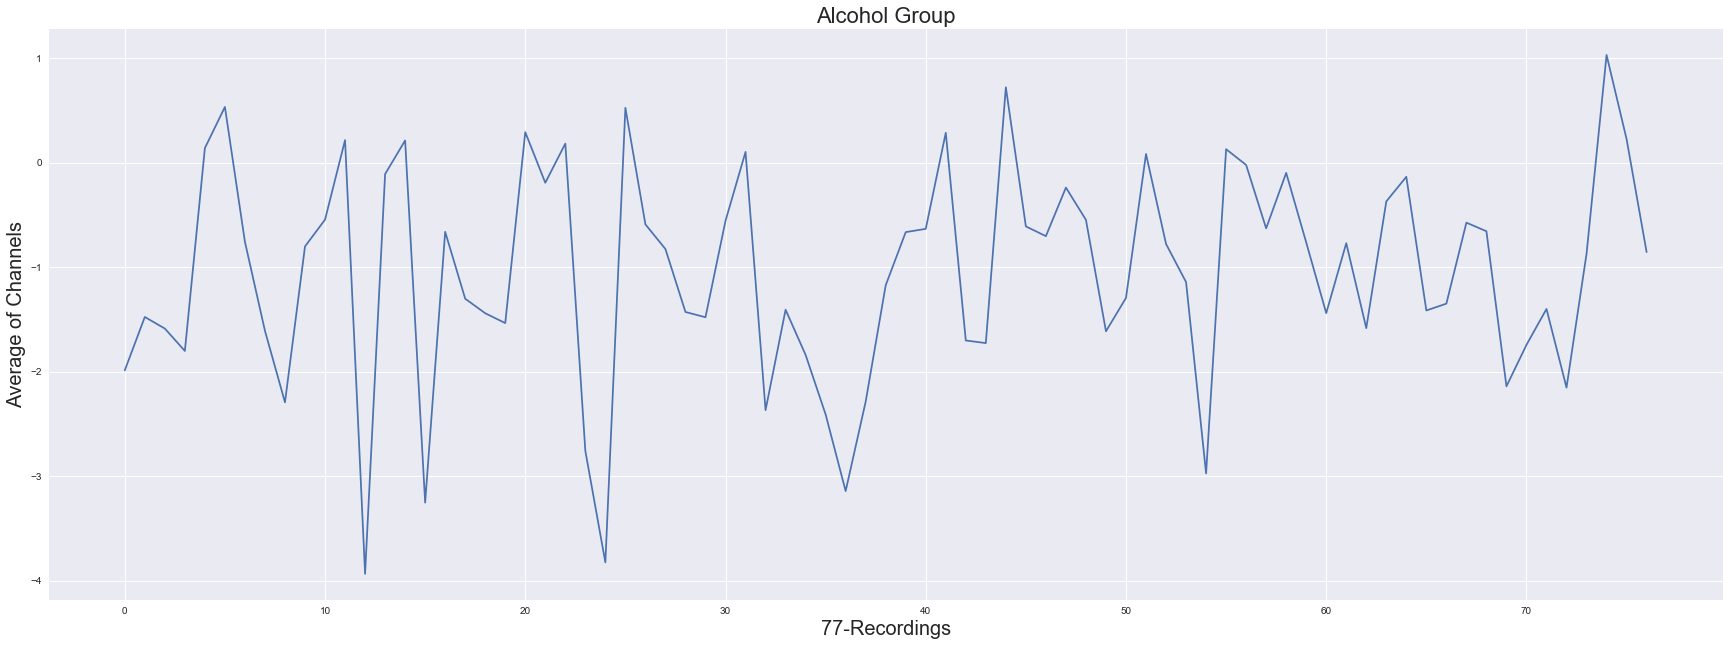

In [56]:
## 2.21 ##

# Graph: Mean of channels values of all recordings

plt.title("Control Group",fontsize=22)
plt.xlabel("45-Recordings",fontsize=20)
plt.ylabel("Average of Channels",fontsize=20)
fig = plt.gcf()
fig.set_size_inches(30, 10.5)
plt.plot([i for i in range(0,len(c_data))],[i for i in c_data])
plt.show()

plt.title("Alcohol Group",fontsize=22)
plt.xlabel("77-Recordings",fontsize=20)
plt.ylabel("Average of Channels",fontsize=20)
fig = plt.gcf()
fig.set_size_inches(30, 10.5)
plt.plot([i for i in range(0,len(a_data))],[i for i in a_data])
plt.show()

In [7]:
# channel_map

channel=['PO7', 'AF8', 'F8', 'P1', 'FC3', 'CZ', 'OZ', 'CP1', 'P4', 'PO8', 'C3', 'FC4', 'F6', 'P7', 'C6', 'TP8', 'FT8', 'TP7', 'FCZ', 'AF7', 'O1', 'CPZ', 'F4', 'C2', 'F2', 'CP4', 'CP2', 'O2', 'FC1', 'FC5', 'C4', 'AF2', 'nd', 'F3', 'X', 'CP6', 'P5', 'P8', 'FC2', 'CP5', 'F1', 'PO1', 'C1', 'PZ', 'C5', 'FP2', 'FZ', 'P3', 'CP3', 'T8', 'F5', 'FP1', 'Y', 'P2', 'POZ', 'P6', 'T7', 'AF1', 'FT7', 'FC6', 'PO2', 'F7', 'AFZ', 'FPZ']
channel_map={}
x=0
for c in channel:
    channel_map[c]=x
    x+=1
index_map={}
x=0
for c in channel:
    index_map[x]=c
    x+=1
#print(index_map) 

In [19]:
## 2.12 Heatmap: Grouping Alcohol and Control ##

#Preparing Pickles as 2D Data for Heat Map of all recordings across every channel

import pickle
import numpy as np

c_hdata=[]
a_hdata=[]

for files in range (0,45):
    maind=[0]*64
    for i in range (0,64):
        maind[i]=[]  
    tdata=pickle.load(open("pickles/c"+str(files),"rb"))
    for stimulus in tdata:
        for channel in tdata[stimulus]:
            tdata[stimulus][channel]=np.mean([float(i) for i in tdata[stimulus][channel]])
                
    #print(tdata)
    for stimulus in tdata:
        for key, value in tdata[stimulus].items():
            #print(key,value)
            maind[channel_map[key]].append(value)
    ptr=0
    for i in maind:
        maind[ptr]=np.mean(i)
        ptr+=1
    c_hdata.append(maind)
    del maind
    
for files in range (0,77):
    maind=[0]*64
    for i in range (0,64):
        maind[i]=[]  
    tdata=pickle.load(open("pickles/a"+str(files),"rb"))
    for stimulus in tdata:
        for channel in tdata[stimulus]:
            tdata[stimulus][channel]=np.mean([float(i) for i in tdata[stimulus][channel]])
                
    #print(tdata)
    for stimulus in tdata:
        for key, value in tdata[stimulus].items():
            #print(key,value)
            maind[channel_map[key]].append(value)
    ptr=0
    for i in maind:
        maind[ptr]=np.mean(i)
        ptr+=1
    a_hdata.append(maind)
    del maind 

cdump=open("c_hdata","wb")
pickle.dump(c_hdata,cdump) 
adump=open("a_hdata","wb")
pickle.dump(a_hdata,adump)
adump.close()
cdump.close()
del a_hdata
del c_hdata


In [195]:
#loading pickles

c_hdata=pickle.load(open("c_hdata","rb"))
a_hdata=pickle.load(open("a_hdata","rb"))

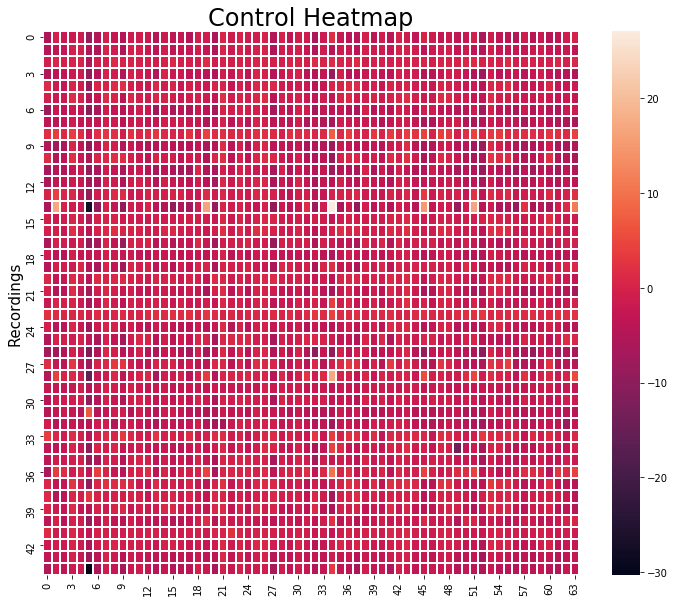

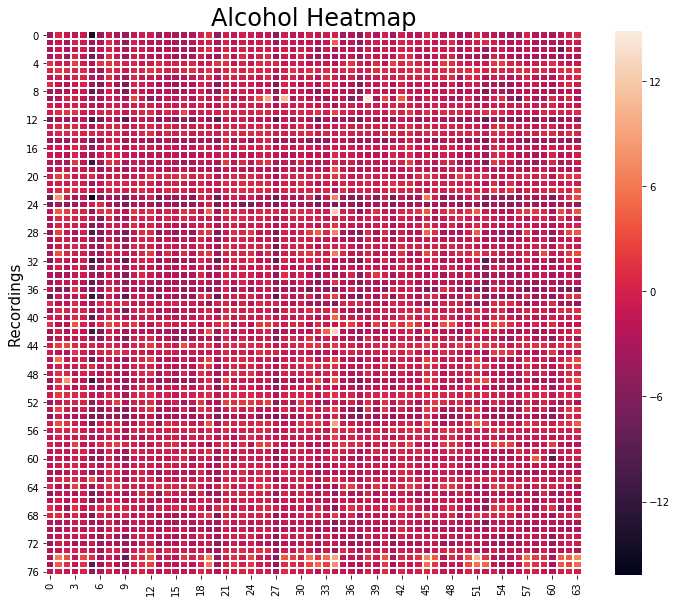

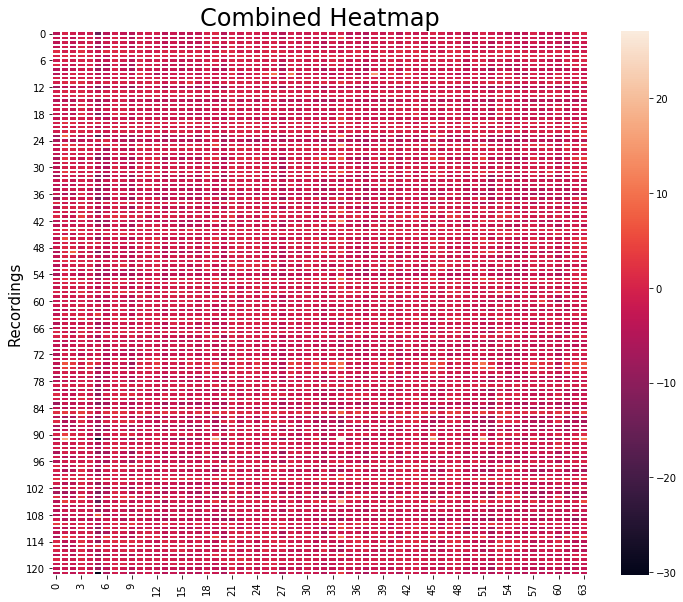

In [63]:
import seaborn as sns
import pandas as pd
import pickle
import matplotlib.pyplot as plt

# Heat Map

c_df=pd.DataFrame(data=c_hdata)
sns.heatmap(c_df,linewidths=1)
plt.ylabel("Recordings",size=15)
plt.title("Control Heatmap",size=24)
fig = plt.gcf()
fig.set_size_inches(12, 10)
plt.show()

a_df=pd.DataFrame(data=a_hdata)
sns.heatmap(a_df,linewidths=1)
plt.title("Alcohol Heatmap",size=24)
plt.ylabel("Recordings",size=15)
fig = plt.gcf()
fig.set_size_inches(12, 10)
plt.show()


t_hdata=a_hdata+c_hdata
t_df=pd.DataFrame(data=t_hdata)
sns.heatmap(t_df,linewidths=1)
plt.title("Combined Heatmap",size=24)
plt.ylabel("Recordings",size=15)
fig = plt.gcf()
fig.set_size_inches(12, 10)
plt.show()


# Here we can deduce significant difference between heats of Control and Alcoholics that shows their 
# varying state of mind by observing limits of heat difference.

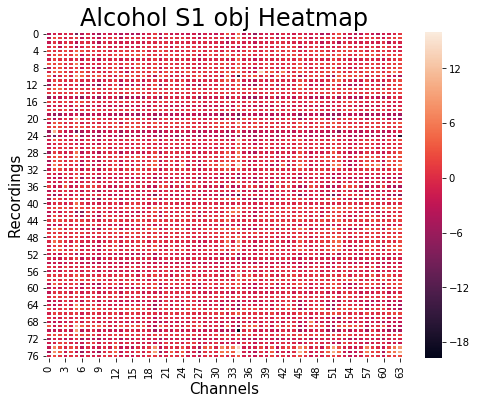

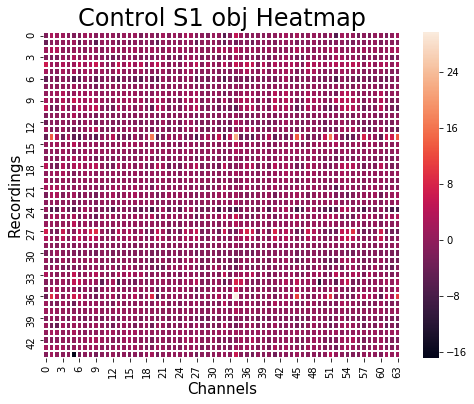

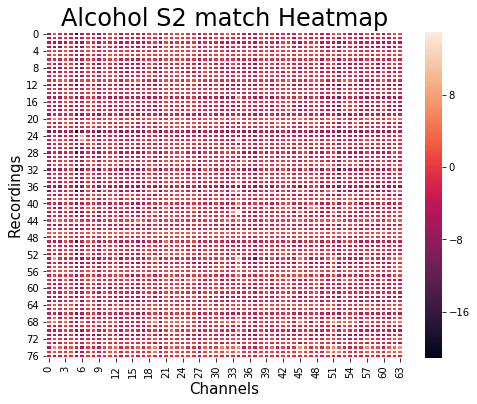

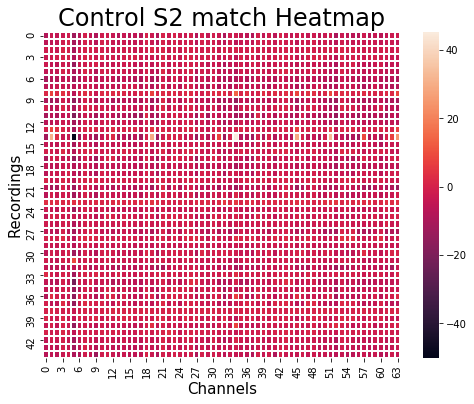

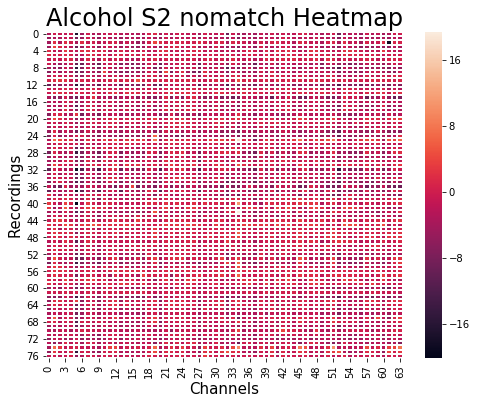

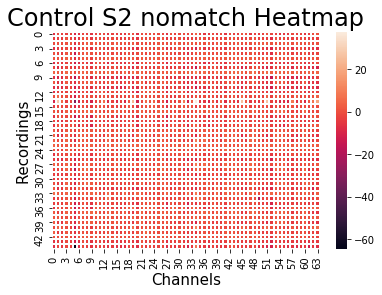

In [175]:
## 2.23 Heatmap: Grouping Stimulus ##

import pandas as pd
import seaborn as sns

# This Pickles is created in 4.1
all_a=pickle.load(open("all_a_mean","rb"))
all_c=pickle.load(open("all_c_mean","rb"))

# Heat Map S1 obj

c_df=pd.DataFrame(data=all_a[0])
sns.heatmap(c_df,linewidths=1)
plt.ylabel("Recordings",size=15)
plt.xlabel("Channels",size=15)
plt.title("Alcohol S1 obj Heatmap",size=24)
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.show()
plt.clf()

a_df=pd.DataFrame(data=all_c[0])
sns.heatmap(a_df,linewidths=1)
plt.title("Control S1 obj Heatmap",size=24)
plt.ylabel("Recordings",size=15)
plt.xlabel("Channels",size=15)
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.show()
plt.clf()

# Heat Map S2 match

c_df=pd.DataFrame(data=all_a[1])
sns.heatmap(c_df,linewidths=1)
plt.ylabel("Recordings",size=15)
plt.xlabel("Channels",size=15)
plt.title("Alcohol S2 match Heatmap",size=24)
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.show()
plt.clf()

a_df=pd.DataFrame(data=all_c[1])
sns.heatmap(a_df,linewidths=1)
plt.title("Control S2 match Heatmap",size=24)
plt.ylabel("Recordings",size=15)
plt.xlabel("Channels",size=15)
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.show()
plt.clf()

# Heat Map S2 nomatch

c_df=pd.DataFrame(data=all_a[2])
sns.heatmap(c_df,linewidths=1)
plt.ylabel("Recordings",size=15)
plt.xlabel("Channels",size=15)
plt.title("Alcohol S2 nomatch Heatmap",size=24)
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.show()
plt.clf()

a_df=pd.DataFrame(data=all_c[2])
sns.heatmap(a_df,linewidths=1)
plt.title("Control S2 nomatch Heatmap",size=24)
plt.ylabel("Recordings",size=15)
plt.xlabel("Channels",size=15)
fig.set_size_inches(8, 6)
plt.show()
plt.clf()


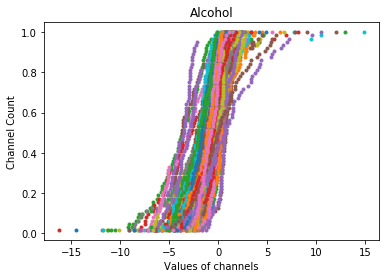

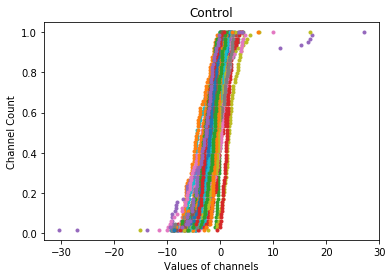

In [204]:
## 2.31 ##

# ECDF Plot of Channels of all Alcohol and Control Recording

for ahd in a_hdata:
    x=np.sort(ahd)
    y=np.arange(1,len(x)+1)/len(x)
    plt.plot(x,y,marker='.',linestyle='none')
plt.title("Alcohol")
plt.xlabel("Values of channels")
plt.ylabel("Channel Count")       
plt.show()


for chd in c_hdata:
    x=np.sort(chd)
    y=np.arange(1,len(x)+1)/len(x)
    plt.plot(x,y,marker='.',linestyle='none')
plt.title("Control")
plt.xlabel("Values of channels")
plt.ylabel("Channel Count")       
plt.show()

# In Case of Alcohol we can see significant slope and in the case of control we can observe a horizontal
# clustering..


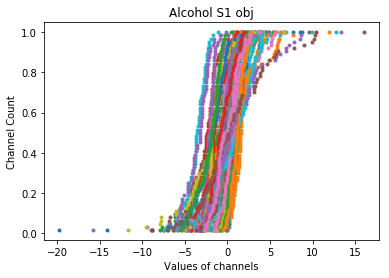

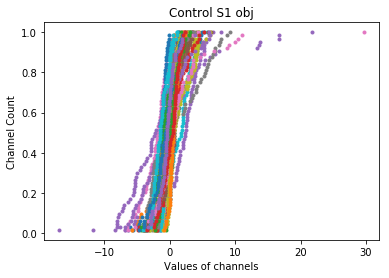

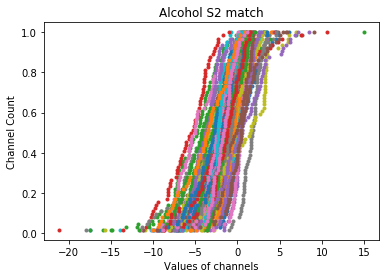

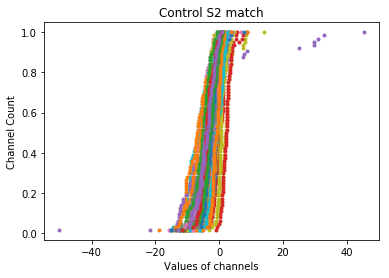

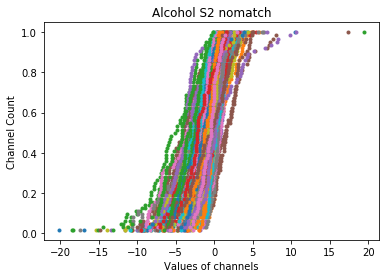

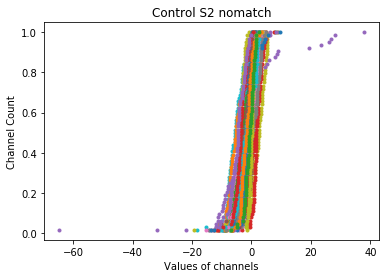

In [205]:
## 2.32 ##

# ECDF Plot of Channels of all Stimulus

for ahd in all_a[0]:
    x=np.sort(ahd)
    y=np.arange(1,len(x)+1)/len(x)
    plt.plot(x,y,marker='.',linestyle='none')
plt.title("Alcohol S1 obj")
plt.xlabel("Values of channels")
plt.ylabel("Channel Count")       
plt.show()


for chd in all_c[0]:
    x=np.sort(chd)
    y=np.arange(1,len(x)+1)/len(x)
    plt.plot(x,y,marker='.',linestyle='none')
plt.title("Control S1 obj")
plt.xlabel("Values of channels")
plt.ylabel("Channel Count")       
plt.show()

for ahd in all_a[1]:
    x=np.sort(ahd)
    y=np.arange(1,len(x)+1)/len(x)
    plt.plot(x,y,marker='.',linestyle='none')
plt.title("Alcohol S2 match")
plt.xlabel("Values of channels")
plt.ylabel("Channel Count")       
plt.show()


for chd in all_c[1]:
    x=np.sort(chd)
    y=np.arange(1,len(x)+1)/len(x)
    plt.plot(x,y,marker='.',linestyle='none')
plt.title("Control S2 match")
plt.xlabel("Values of channels")
plt.ylabel("Channel Count")       
plt.show()

for ahd in all_a[2]:
    x=np.sort(ahd)
    y=np.arange(1,len(x)+1)/len(x)
    plt.plot(x,y,marker='.',linestyle='none')
plt.title("Alcohol S2 nomatch")
plt.xlabel("Values of channels")
plt.ylabel("Channel Count")       
plt.show()


for chd in all_c[2]:
    x=np.sort(chd)
    y=np.arange(1,len(x)+1)/len(x)
    plt.plot(x,y,marker='.',linestyle='none')
plt.title("Control S2 nomatch")
plt.xlabel("Values of channels")
plt.ylabel("Channel Count")       
plt.show()

# In Case of Alcohol we can see significant slope and in the case of control we can observe a horizontal
# clustering..

In [176]:
######################### Part-3 Correlation ############################################

In [148]:
### 3.1 One recording###
# Understanding Correlation from a Alcohol recording

import pickle
a1data=pickle.load(open("pickles/a0","rb"))
print(a1data.keys())   

dict_keys(['S2 match', 'S2 nomatch', 'S1 obj'])


In [206]:
# Correlation across channels for stimulus 'S1 obj' for a Alcohol recording
# Replacing missing values with np.nan

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

maind=[0]*64
for i in range(0,64):
    maind[i]=[]
    
for channel in a1data['S1 obj']:
    maind[channel_map[channel]]=[float(i) for i in a1data['S1 obj'][channel]]   

    

maind[51].extend([np.nan for i in range(22)])
cor=np.corrcoef(maind)

df=pd.DataFrame(cor)
np.fill_diagonal(df.values, -1000.)
cor_sum=list(zip(df.max(), df.columns, df.idxmax())) 
cor_sum=sorted(cor_sum, key=lambda x: x[0],reverse=True)

print("Maximum 3 electrode combination correlation are observed for \n(Correlation, Sensor 1, Sensor 2)\n")
for l in cor_sum[:5:2]:
   print (str(l[0])+" between "+str(index_map[l[1]])+"/"+str(l[1])+" and "+ str(index_map[l[2]])+"/"+str(l[2]))


# It shows that they are highly correlated with each other. 

Maximum 3 electrode combination correlation are observed for 
(Correlation, Sensor 1, Sensor 2)

0.999411050094 between Y/52 and nd/32
0.962958187169 between AF2/31 and AFZ/62
0.961818669787 between FP2/45 and AF8/1


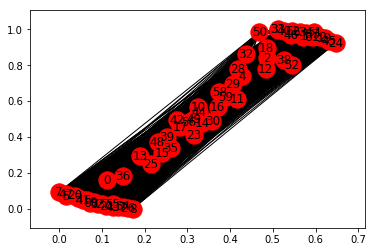

In [150]:
# Networkx Graph from Numpy corr matrix of all 64 channels for a alcohol recording
# Next is another Networkx Graph

plt.clf()
G=nx.from_numpy_matrix(cor)
G.edges(data=True)
nx.draw_networkx(G)
plt.show()
plt.clf()




length/weight of Y and nd  0.999411050094


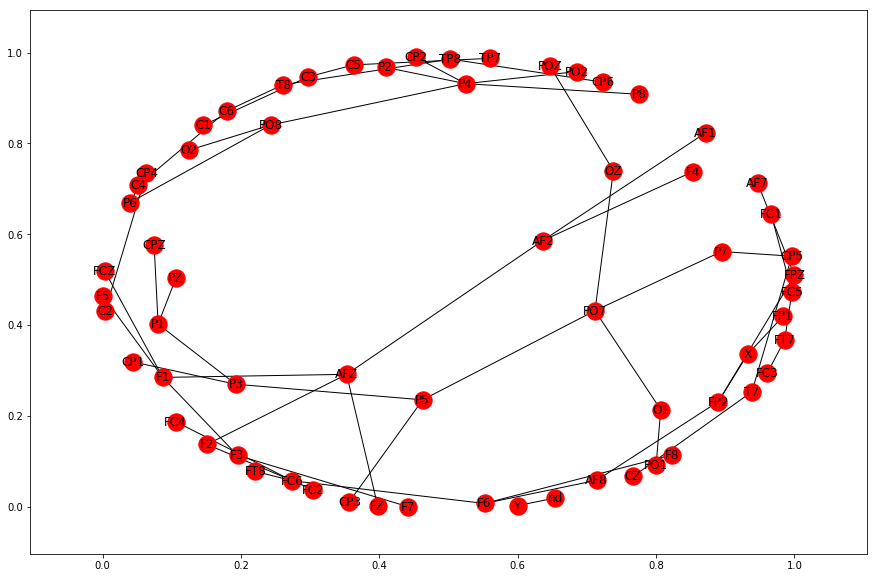

In [151]:
# networkx Graph by adding nodes and edges and weight and length as correlation coeffciant of a alcohol recording

G=nx.Graph()

for l in cor_sum:
    G.add_node(l[1])
    G.add_node(l[2])
    G.add_edge(l[1],l[2],length=l[0],weight=l[0])
    #print(l[0])
    
    
nx.relabel_nodes(G,index_map,copy=False)
nx.draw_networkx(G)
print("length/weight of Y and nd ",nx.shortest_path_length(G,'nd', 'Y', weight='length'))
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()


In [157]:
## 3.21 All Alcohol for S1 obj ##

# Selecting highest Correlation combination corresponding to every alcohol recording at stimulus 'S1 obj'
# Total alcohol recording 77
# Replacing missing values with np.nan

a_s1obj=[]
for i in range(0,77):
    adata=pickle.load((open("pickles/a"+str(i),"rb")))
    maind=[0]*64
    for i in range(0,64):
        maind[i]=[]

    for channel in adata['S1 obj']:
        maind[channel_map[channel]]=[float(i) for i in adata['S1 obj'][channel]]   

    max=0
    for l in maind:
        if(max<len(l)):
            max=len(l)
    for l in maind:
        if (len(l)!=max):
            l.extend([np.nan for i in range(abs(max-len(l)))])
        
    
    cor=np.corrcoef(maind)

    df=pd.DataFrame(cor)
    np.fill_diagonal(df.values, -1000.)
    cor_sum=list(zip(df.max(), df.columns, df.idxmax())) 
    cor_sum=sorted(cor_sum, key=lambda x: x[0],reverse=True)
    l=cor_sum[0]
    a_s1obj.append(l)
    del maind
    del adata
    
print("Maximum electrode combination correlation are observed for \n(Correlation, Sensor 1, Sensor 2)\n")
recording=1
for l in a_s1obj:
    print ("Alcohol recording ",recording,": ",str(l[0])+" between "+str(index_map[l[1]])+"/"+str(l[1])+" and "+ str(index_map[l[2]])+"/"+str(l[2]))
    recording+=1

Maximum electrode combination correlation are observed for 
(Correlation, Sensor 1, Sensor 2)

Alcohol recording  1 :  0.999411050094 between Y/52 and nd/32
Alcohol recording  2 :  0.98550885615 between O1/20 and nd/32
Alcohol recording  3 :  0.99968224287 between nd/32 and Y/52
Alcohol recording  4 :  0.982608054557 between O1/20 and nd/32
Alcohol recording  5 :  0.999388030136 between nd/32 and Y/52
Alcohol recording  6 :  0.999600182548 between nd/32 and Y/52
Alcohol recording  7 :  0.982512128808 between nd/32 and OZ/6
Alcohol recording  8 :  0.999743287024 between nd/32 and Y/52
Alcohol recording  9 :  0.999789310593 between nd/32 and Y/52
Alcohol recording  10 :  0.999482433685 between nd/32 and Y/52
Alcohol recording  11 :  0.98252448213 between FP2/45 and FPZ/63
Alcohol recording  12 :  0.999890624344 between nd/32 and Y/52
Alcohol recording  13 :  0.999336624227 between nd/32 and Y/52
Alcohol recording  14 :  0.999566817953 between nd/32 and Y/52
Alcohol recording  15 :  0.972

In [213]:
# Analyzing above results
a_s1obj=pickle.load(open("a_s1obj","rb"))
tc_data={}
for i in range(0,77):
    a_s1obj[i]=list(a_s1obj[i])
    if a_s1obj[i][1]>a_s1obj[i][2]:
        a_s1obj[i][1],a_s1obj[i][2]=a_s1obj[i][2],a_s1obj[i][1]
    if (a_s1obj[i][1],a_s1obj[i][2]) not in tc_data:
         tc_data[(a_s1obj[i][1],a_s1obj[i][2])]=[]
    tc_data[(a_s1obj[i][1],a_s1obj[i][2])].append(a_s1obj[i][0])        
            
        
for l in tc_data:
    if len(tc_data[l])>=3:
        print("Correlation between ",index_map[l[0]]," and ",index_map[l[1]], ": ",len(tc_data[l])," times")
        print("Mean of correlation: ",np.mean(tc_data[l]))
        
# We can observe from all 77 alcohol recondings that nd and Y channels in 49 of them has approx 0.9999 correlation


Correlation between  OZ  and  nd :  3  times
Mean of correlation:  0.982020530276
Correlation between  nd  and  Y :  49  times
Mean of correlation:  0.999198725793
Correlation between  O1  and  nd :  14  times
Mean of correlation:  0.982161672391


In [214]:
# Adjusting tc_data to plot
gp_data=[]
for l in tc_data:
    gp_data.append([l[0],l[1],np.mean(tc_data[l]),len(tc_data[l])])
#print(gp_data)    
    
    

length of Y/52 and nd/32  49
weight of Y/52 and nd/32  0.999198725793


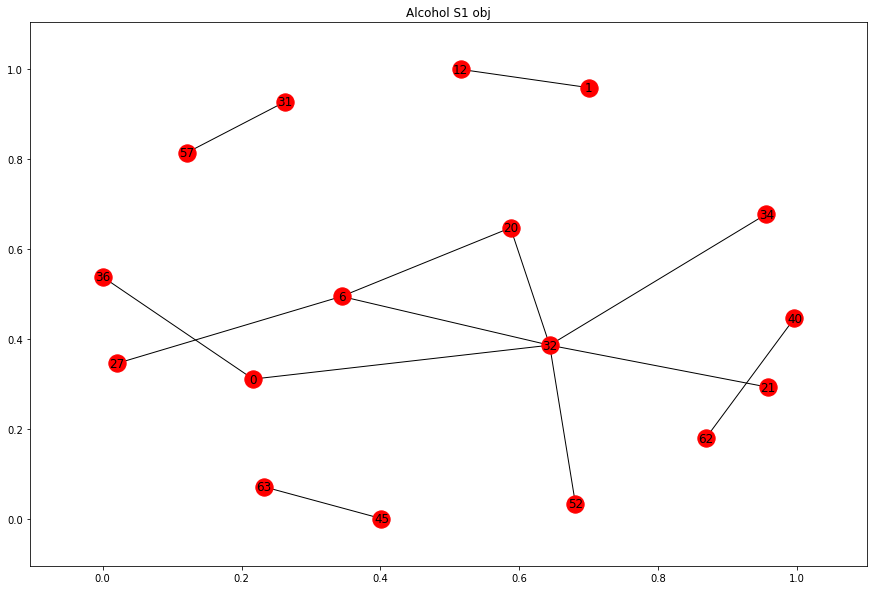

In [215]:
# Networkx plot of all highest correlations observed from 77 alcohol recordings
# Weight: mean of correlation
# length: no. of times correlation observed in recordings

G=nx.Graph()

for l in gp_data:
    G.add_edge(l[0],l[1],weight=l[2],length=l[3])
    #print(l[0])
    
    
nx.draw_networkx(G)
print("length of Y/52 and nd/32 ",nx.shortest_path_length(G,52, 32, weight='length'))
print("weight of Y/52 and nd/32 ",nx.shortest_path_length(G,52, 32,weight='weight'))
fig = plt.gcf()
plt.title("Alcohol S1 obj")
fig.set_size_inches(15, 10)
plt.show()

In [207]:
## 3.3 All Alcohol for S2 match ##

# Selecting highest Correlation combination corresponding to every alcohol recording at stimulus 'S2 match'
# Total alcohol recording 77
# Replacing missing values with np.nan

a_s2match=[]
for i in range(0,77):
    adata=pickle.load((open("pickles/a"+str(i),"rb")))
    maind=[0]*64
    for i in range(0,64):
        maind[i]=[]

    for channel in adata['S2 match']:
        maind[channel_map[channel]]=[float(i) for i in adata['S2 match'][channel]]   

    max=0
    for l in maind:
        if(max<len(l)):
            max=len(l)
    for l in maind:
        if (len(l)!=max):
            l.extend([np.nan for i in range(abs(max-len(l)))])
        
    
    cor=np.corrcoef(maind)

    df=pd.DataFrame(cor)
    np.fill_diagonal(df.values, -1000.)
    cor_sum=list(zip(df.max(), df.columns, df.idxmax())) 
    cor_sum=sorted(cor_sum, key=lambda x: x[0],reverse=True)
    l=cor_sum[0]
    a_s2match.append(l)
    del maind
    del adata
    
print("Maximum electrode combination correlation are observed for \n(Correlation, Sensor 1, Sensor 2)\n")
recording=1
for l in a_s2match:
    print ("Alcohol recording ",recording,": ",str(l[0])+" between "+str(index_map[l[1]])+"/"+str(l[1])+" and "+ str(index_map[l[2]])+"/"+str(l[2]))
    recording+=1

Maximum electrode combination correlation are observed for 
(Correlation, Sensor 1, Sensor 2)

Alcohol recording  1 :  0.99956318643 between Y/52 and nd/32
Alcohol recording  2 :  0.987431139277 between nd/32 and O1/20
Alcohol recording  3 :  0.999802317479 between nd/32 and Y/52
Alcohol recording  4 :  0.990006480571 between OZ/6 and nd/32
Alcohol recording  5 :  0.999376730703 between Y/52 and nd/32
Alcohol recording  6 :  0.999245350637 between nd/32 and Y/52
Alcohol recording  7 :  0.978643275819 between OZ/6 and nd/32
Alcohol recording  8 :  0.999742474974 between nd/32 and Y/52
Alcohol recording  9 :  0.999574684697 between Y/52 and nd/32
Alcohol recording  10 :  0.999656068243 between nd/32 and Y/52
Alcohol recording  11 :  0.973462646036 between FPZ/63 and AF7/19
Alcohol recording  12 :  0.999890257687 between nd/32 and Y/52
Alcohol recording  13 :  0.999558705979 between nd/32 and Y/52
Alcohol recording  14 :  0.999299365491 between Y/52 and nd/32
Alcohol recording  15 :  0.97

In [208]:
# Analyzing above results
a_s2match=pickle.load(open("a_s2match","rb"))
tc_data={}

for i in range(0,77):
    a_s2match[i]=list(a_s2match[i])
    if a_s2match[i][1]>a_s2match[i][2]:
        a_s2match[i][1],a_s2match[i][2]=a_s2match[i][2],a_s2match[i][1]
    if (a_s2match[i][1],a_s2match[i][2]) not in tc_data:
         tc_data[(a_s2match[i][1],a_s2match[i][2])]=[]
    tc_data[(a_s2match[i][1],a_s2match[i][2])].append(a_s2match[i][0])        
            
        
for l in tc_data:
    if len(tc_data[l])>=3:
        print("Correlation between ",index_map[l[0]]," and ",index_map[l[1]], ": ",len(tc_data[l])," times")
        print("Mean of correlation: ",np.mean(tc_data[l]))
        
# We can observe from all 77 alcohol recondings that nd and Y channels in 49 of them has approx 0.9999 correlation


Correlation between  nd  and  Y :  49  times
Mean of correlation:  0.999200173395
Correlation between  OZ  and  nd :  5  times
Mean of correlation:  0.985300691757
Correlation between  O1  and  nd :  12  times
Mean of correlation:  0.984635690547


In [209]:
gp_data=[]
for l in tc_data:
    gp_data.append([l[0],l[1],np.mean(tc_data[l]),len(tc_data[l])])
#print(gp_data) 

length of Y/52 and nd/32  49
weight of Y/52 and nd/32  0.999200173395


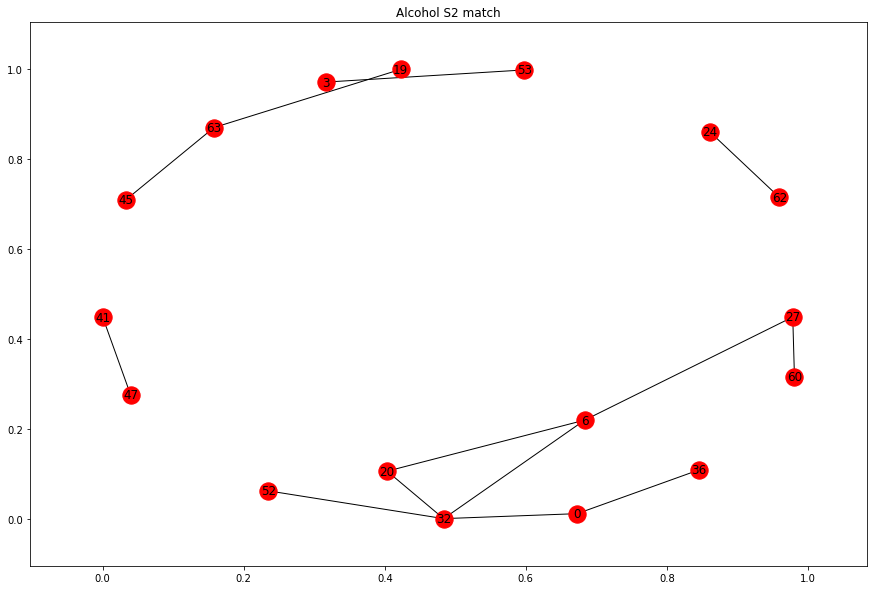

In [211]:
# Networkx plot of all highest correlations observed from 77 alcohol recordings
# Weight: mean of correlation
# length: no. of times correlation observed in recordings

G=nx.Graph()

for l in gp_data:
    G.add_edge(l[0],l[1],weight=l[2],length=l[3])
    #print(l[0])
    
    
nx.draw_networkx(G)
print("length of Y/52 and nd/32 ",nx.shortest_path_length(G,52, 32, weight='length'))
print("weight of Y/52 and nd/32 ",nx.shortest_path_length(G,52, 32,weight='weight'))
fig = plt.gcf()
plt.title("Alcohol S2 match")
fig.set_size_inches(15, 10)
plt.show()

In [177]:
## 3.3 All Alcohol for S2 nomatch ##

# Selecting highest Correlation combination corresponding to every alcohol recording at stimulus 'S2 nomatch'
# Total alcohol recording 77
# Replacing missing values with np.nan

a_s2nomatch=[]
for i in range(0,77):
    adata=pickle.load((open("pickles/a"+str(i),"rb")))
    maind=[0]*64
    for i in range(0,64):
        maind[i]=[]

    for channel in adata['S2 nomatch']:
        maind[channel_map[channel]]=[float(i) for i in adata['S2 nomatch'][channel]]   

    max=0
    for l in maind:
        if(max<len(l)):
            max=len(l)
    for l in maind:
        if (len(l)!=max):
            l.extend([np.nan for i in range(abs(max-len(l)))])
        
    
    cor=np.corrcoef(maind)

    df=pd.DataFrame(cor)
    np.fill_diagonal(df.values, -1000.)
    cor_sum=list(zip(df.max(), df.columns, df.idxmax())) 
    cor_sum=sorted(cor_sum, key=lambda x: x[0],reverse=True)
    l=cor_sum[0]
    a_s2nomatch.append(l)
    del maind
    del adata
    
print("Maximum electrode combination correlation are observed for \n(Correlation, Sensor 1, Sensor 2)\n")
recording=1
for l in a_s2nomatch:
    print ("Alcohol recording ",recording,": ",str(l[0])+" between "+str(index_map[l[1]])+"/"+str(l[1])+" and "+ str(index_map[l[2]])+"/"+str(l[2]))
    recording+=1

Maximum electrode combination correlation are observed for 
(Correlation, Sensor 1, Sensor 2)

Alcohol recording  1 :  0.999626448373 between nd/32 and Y/52
Alcohol recording  2 :  0.985539792883 between O1/20 and nd/32
Alcohol recording  3 :  0.999790360771 between nd/32 and Y/52
Alcohol recording  4 :  0.988864810401 between nd/32 and O1/20
Alcohol recording  5 :  0.999367341806 between Y/52 and nd/32
Alcohol recording  6 :  0.999059216775 between nd/32 and Y/52
Alcohol recording  7 :  0.97922986606 between OZ/6 and nd/32
Alcohol recording  8 :  0.999768859226 between nd/32 and Y/52
Alcohol recording  9 :  0.999572366239 between nd/32 and Y/52
Alcohol recording  10 :  0.999770763882 between nd/32 and Y/52
Alcohol recording  11 :  0.977454562985 between nd/32 and O1/20
Alcohol recording  12 :  0.999728608073 between nd/32 and Y/52
Alcohol recording  13 :  0.999596752353 between nd/32 and Y/52
Alcohol recording  14 :  0.999281856556 between nd/32 and Y/52
Alcohol recording  15 :  0.973

In [178]:
# Analyzing above results
#a_s2nomatch=pickle.load(open("a_s2nomatch","rb"))
tc_data={}

for i in range(0,77):
    a_s2nomatch[i]=list(a_s2nomatch[i])
    if a_s2nomatch[i][1]>a_s2nomatch[i][2]:
        a_s2nomatch[i][1],a_s2nomatch[i][2]=a_s2nomatch[i][2],a_s2nomatch[i][1]
    if (a_s2nomatch[i][1],a_s2nomatch[i][2]) not in tc_data:
         tc_data[(a_s2nomatch[i][1],a_s2nomatch[i][2])]=[]
    tc_data[(a_s2nomatch[i][1],a_s2nomatch[i][2])].append(a_s2nomatch[i][0])        
            
        
for l in tc_data:
    if len(tc_data[l])>=3:
        print("Correlation between ",index_map[l[0]]," and ",index_map[l[1]], ": ",len(tc_data[l])," times")
        print("Mean of correlation: ",np.mean(tc_data[l]))
        
# We can observe from all 77 alcohol recondings that nd and Y channels in 48 of them has approx 0.9999 correlation


Correlation between  nd  and  Y :  48  times
Mean of correlation:  0.999105116517
Correlation between  OZ  and  nd :  5  times
Mean of correlation:  0.979911186585
Correlation between  O1  and  nd :  12  times
Mean of correlation:  0.984367518226


In [181]:
gp_data=[]
for l in tc_data:
    gp_data.append([l[0],l[1],np.mean(tc_data[l]),len(tc_data[l])])
#print(gp_data) 

length of Y/52 and nd/32  48
weight of Y/52 and nd/32  0.999105116517


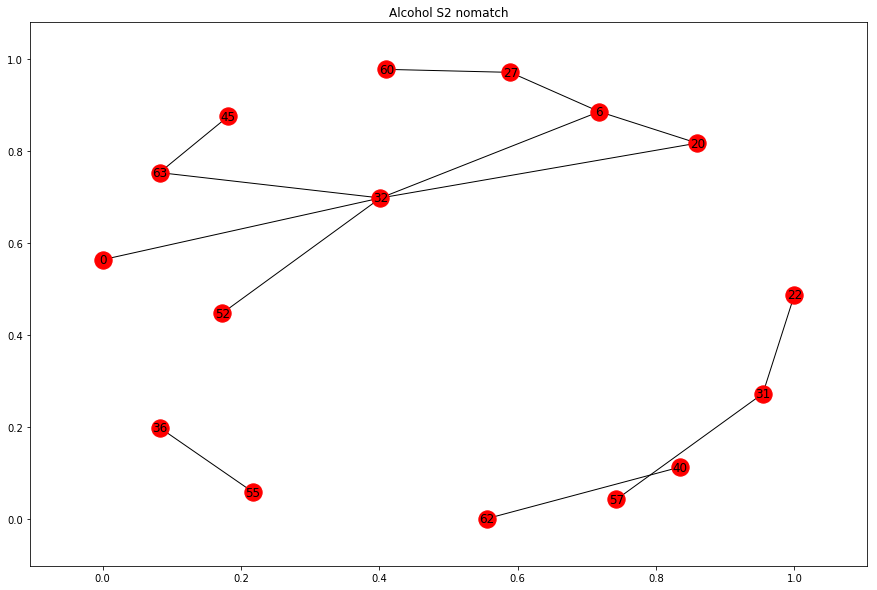

In [183]:
# Networkx plot of all highest correlations observed from 77 alcohol recordings
# Weight: mean of correlation
# length: no. of times correlation observed in recordings
import networkx as nx

G=nx.Graph()

for l in gp_data:
    G.add_edge(l[0],l[1],weight=l[2],length=l[3])
    #print(l[0])
    
    
nx.draw_networkx(G)
print("length of Y/52 and nd/32 ",nx.shortest_path_length(G,52, 32, weight='length'))
print("weight of Y/52 and nd/32 ",nx.shortest_path_length(G,52, 32,weight='weight'))
fig = plt.gcf()
plt.title("Alcohol S2 nomatch")
fig.set_size_inches(15, 10)
plt.show()

In [200]:
### 3.3 ###
# Selecting highest Correlation combination corresponding to every Control recording at stimulus 'S1 obj'
# Replacing missing values with np.nan

c_s1obj=[]
for i in range(0,45):
    cdata=pickle.load((open("pickles/c"+str(i),"rb")))
    maind=[0]*64
    for i in range(0,64):
        maind[i]=[]

    for channel in cdata['S1 obj']:
        maind[channel_map[channel]]=[float(i) for i in cdata['S1 obj'][channel]]   

    max=0
    for l in maind:
        if(max<len(l)):
            max=len(l)
    for l in maind:
        if (len(l)!=max):
            l.extend([np.nan for i in range(abs(max-len(l)))])
        
    
    cor=np.corrcoef(maind)

    df=pd.DataFrame(cor)
    np.fill_diagonal(df.values, -1000.)
    cor_sum=list(zip(df.max(), df.columns, df.idxmax())) 
    cor_sum=sorted(cor_sum, key=lambda x: x[0],reverse=True)
    l=cor_sum[0]
    c_s1obj.append(l)
    del maind
    del cdata
    
print("Maximum electrode combination correlation are observed for \n(Correlation, Sensor 1, Sensor 2)\n")
recording=1
for l in c_s1obj:
    print ("Control recording ",recording,": ",str(l[0])+" between "+str(index_map[l[1]])+"/"+str(l[1])+" and "+ str(index_map[l[2]])+"/"+str(l[2]))
    recording+=1

Maximum electrode combination correlation are observed for 
(Correlation, Sensor 1, Sensor 2)

Control recording  1 :  0.999657223088 between nd/32 and Y/52
Control recording  2 :  0.985805574328 between nd/32 and OZ/6
Control recording  3 :  0.99459871565 between P4/8 and P8/37
Control recording  4 :  0.995603943246 between PO7/0 and nd/32
Control recording  5 :  0.999812877037 between nd/32 and Y/52
Control recording  6 :  0.999781756042 between nd/32 and Y/52
Control recording  7 :  0.999571444972 between nd/32 and Y/52
Control recording  8 :  0.987171815029 between O1/20 and nd/32
Control recording  9 :  0.99963693883 between nd/32 and Y/52
Control recording  10 :  0.993494435747 between O1/20 and nd/32
Control recording  11 :  0.999734166064 between nd/32 and Y/52
Control recording  12 :  0.947342920696 between AF2/31 and AF1/57
Control recording  13 :  0.999698026305 between nd/32 and Y/52
Control recording  14 :  0.999666429751 between nd/32 and Y/52
Control recording  15 :  0.9

In [216]:
# Analyzing above results
c_s2obj=pickle.load(open("c_s1obj","rb"))
tc_data={}
for i in range(0,45):
    c_s1obj[i]=list(c_s1obj[i])
    if c_s1obj[i][1]>c_s1obj[i][2]:
        c_s1obj[i][1],c_s1obj[i][2]=c_s1obj[i][2],c_s1obj[i][1]
    if (c_s1obj[i][1],c_s1obj[i][2]) not in tc_data:
         tc_data[(c_s1obj[i][1],c_s1obj[i][2])]=[]
    tc_data[(c_s1obj[i][1],c_s1obj[i][2])].append(c_s1obj[i][0])        
            
        
for l in tc_data:
    if len(tc_data[l])>=2:
        print("Correlation between ",index_map[l[0]]," and ",index_map[l[1]], ": ",len(tc_data[l])," times")
        print("Mean of correlation: ",np.mean(tc_data[l]))
        
# We can observe from all 45 control recondings that nd and Y channels in 21 of them has approx 0.999 correlation


Correlation between  nd  and  Y :  21  times
Mean of correlation:  0.999384244034
Correlation between  O1  and  nd :  10  times
Mean of correlation:  0.988865563212
Correlation between  F1  and  AFZ :  2  times
Mean of correlation:  0.977057721528
Correlation between  nd  and  FPZ :  2  times
Mean of correlation:  0.969675144785
Correlation between  OZ  and  O2 :  2  times
Mean of correlation:  0.961429047133


In [217]:
# Adjusting tc_data to plot
gp_data=[]
for l in tc_data:
    gp_data.append([l[0],l[1],np.mean(tc_data[l]),len(tc_data[l])])
#print(gp_data) 

length of Y/52 and nd/32  21
weight of Y/52 and nd/32  0.999384244034


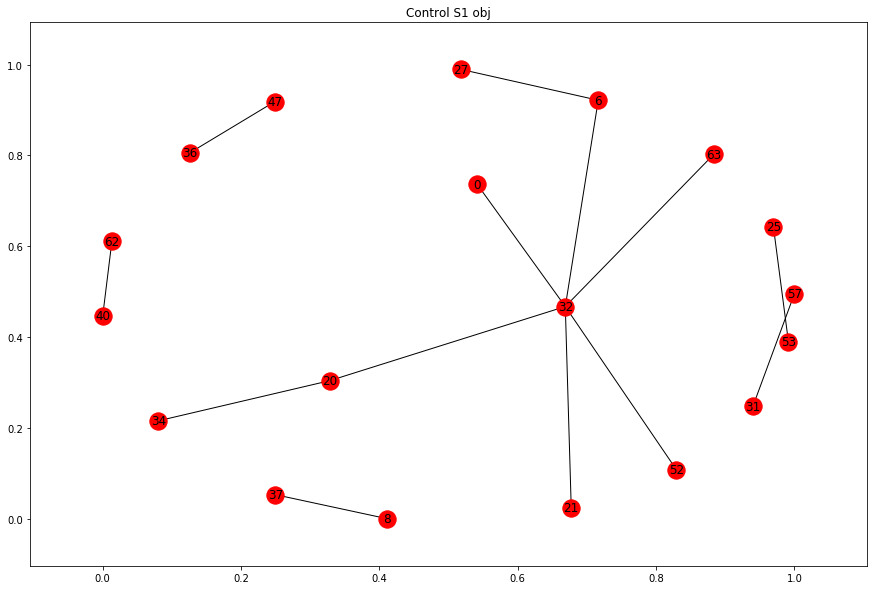

In [218]:
# Networkx plot of all highest correlations observed from 45 control recordings
# Weight: mean of correlation
# length: no. of times correlation observed in recordings

G=nx.Graph()

for l in gp_data:
    G.add_edge(l[0],l[1],weight=l[2],length=l[3])
    #print(l[0])
    
    
nx.draw_networkx(G)
print("length of Y/52 and nd/32 ",nx.shortest_path_length(G,52, 32, weight='length'))
print("weight of Y/52 and nd/32 ",nx.shortest_path_length(G,52, 32,weight='weight'))
fig = plt.gcf()
plt.title("Control S1 obj")
fig.set_size_inches(15, 10)
plt.show()

In [185]:
### 3.32 ###

# Selecting highest Correlation combination corresponding to every Control recording at stimulus 'S2 match'
# Replacing missing values with np.nan

c_s2match=[]
for i in range(0,45):
    cdata=pickle.load((open("pickles/c"+str(i),"rb")))
    maind=[0]*64
    for i in range(0,64):
        maind[i]=[]

    for channel in cdata['S2 match']:
        maind[channel_map[channel]]=[float(i) for i in cdata['S2 match'][channel]]   

    max=0
    for l in maind:
        if(max<len(l)):
            max=len(l)
    for l in maind:
        if (len(l)!=max):
            l.extend([np.nan for i in range(abs(max-len(l)))])
        
    
    cor=np.corrcoef(maind)

    df=pd.DataFrame(cor)
    np.fill_diagonal(df.values, -1000.)
    cor_sum=list(zip(df.max(), df.columns, df.idxmax())) 
    cor_sum=sorted(cor_sum, key=lambda x: x[0],reverse=True)
    l=cor_sum[0]
    c_s2match.append(l)
    del maind
    del cdata
    
print("Maximum electrode combination correlation are observed for \n(Correlation, Sensor 1, Sensor 2)\n")
recording=1
for l in c_s1obj:
    print ("Control recording ",recording,": ",str(l[0])+" between "+str(index_map[l[1]])+"/"+str(l[1])+" and "+ str(index_map[l[2]])+"/"+str(l[2]))
    recording+=1

Maximum electrode combination correlation are observed for 
(Correlation, Sensor 1, Sensor 2)

Control recording  1 :  0.999656723418 between nd/32 and Y/52
Control recording  2 :  0.987077321765 between OZ/6 and nd/32
Control recording  3 :  0.995474096925 between P4/8 and P8/37
Control recording  4 :  0.994254866008 between PO7/0 and nd/32
Control recording  5 :  0.999618825266 between nd/32 and Y/52
Control recording  6 :  0.999750302136 between nd/32 and Y/52
Control recording  7 :  0.999592505127 between nd/32 and Y/52
Control recording  8 :  0.989321244678 between O1/20 and nd/32
Control recording  9 :  0.999830304744 between nd/32 and Y/52
Control recording  10 :  0.994472488269 between O1/20 and nd/32
Control recording  11 :  0.99980028135 between nd/32 and Y/52
Control recording  12 :  0.988023317418 between AF2/31 and AF1/57
Control recording  13 :  0.999665581147 between nd/32 and Y/52
Control recording  14 :  0.999855763703 between nd/32 and Y/52
Control recording  15 :  0.

In [186]:
# Analyzing above results
#c_s2obj=pickle.load(open("c_s2match","rb"))
tc_data={}
for i in range(0,45):
    c_s2match[i]=list(c_s2match[i])
    if c_s2match[i][1]>c_s2match[i][2]:
        c_s2match[i][1],c_s2match[i][2]=c_s2match[i][2],c_s2match[i][1]
    if (c_s2match[i][1],c_s2match[i][2]) not in tc_data:
         tc_data[(c_s2match[i][1],c_s2match[i][2])]=[]
    tc_data[(c_s2match[i][1],c_s2match[i][2])].append(c_s2match[i][0])        
            
        
for l in tc_data:
    if len(tc_data[l])>=2:
        print("Correlation between ",index_map[l[0]]," and ",index_map[l[1]], ": ",len(tc_data[l])," times")
        print("Mean of correlation: ",np.mean(tc_data[l]))
        
# We can observe from all 45 control recondings that nd and Y channels in 21 of them has approx 0.999 correlation


Correlation between  nd  and  Y :  21  times
Mean of correlation:  0.99949531901
Correlation between  O1  and  nd :  9  times
Mean of correlation:  0.990007992579
Correlation between  nd  and  FPZ :  3  times
Mean of correlation:  0.983075815529
Correlation between  FP2  and  FPZ :  2  times
Mean of correlation:  0.965297178707


In [187]:
# Adjusting tc_data to plot
gp_data=[]
for l in tc_data:
    gp_data.append([l[0],l[1],np.mean(tc_data[l]),len(tc_data[l])])
#print(gp_data) 

length of Y/52 and nd/32  21
weight of Y/52 and nd/32  0.99949531901


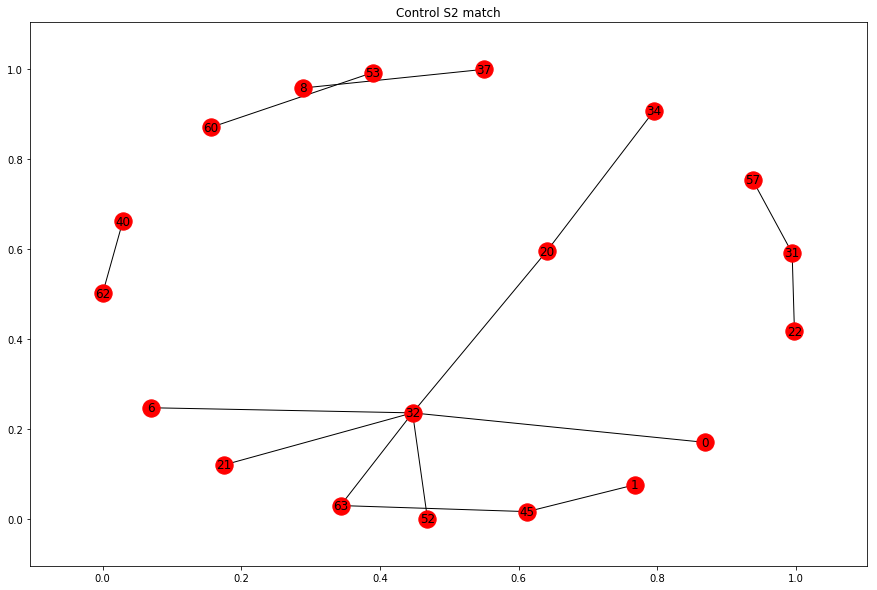

In [189]:
# Networkx plot of all highest correlations observed from 45 control recordings
# Weight: mean of correlation
# length: no. of times correlation observed in recordings

G=nx.Graph()

for l in gp_data:
    G.add_edge(l[0],l[1],weight=l[2],length=l[3])
    #print(l[0])
    
    
nx.draw_networkx(G)
print("length of Y/52 and nd/32 ",nx.shortest_path_length(G,52, 32, weight='length'))
print("weight of Y/52 and nd/32 ",nx.shortest_path_length(G,52, 32,weight='weight'))
fig = plt.gcf()
plt.title("Control S2 match")
fig.set_size_inches(15, 10)
plt.show()

In [190]:
### 3.32 ###

# Selecting highest Correlation combination corresponding to every Control recording at stimulus 'S2 match'
# Replacing missing values with np.nan

c_s2nomatch=[]
for i in range(0,45):
    cdata=pickle.load((open("pickles/c"+str(i),"rb")))
    maind=[0]*64
    for i in range(0,64):
        maind[i]=[]

    for channel in cdata['S2 nomatch']:
        maind[channel_map[channel]]=[float(i) for i in cdata['S2 nomatch'][channel]]   

    max=0
    for l in maind:
        if(max<len(l)):
            max=len(l)
    for l in maind:
        if (len(l)!=max):
            l.extend([np.nan for i in range(abs(max-len(l)))])
        
    
    cor=np.corrcoef(maind)

    df=pd.DataFrame(cor)
    np.fill_diagonal(df.values, -1000.)
    cor_sum=list(zip(df.max(), df.columns, df.idxmax())) 
    cor_sum=sorted(cor_sum, key=lambda x: x[0],reverse=True)
    l=cor_sum[0]
    c_s2nomatch.append(l)
    del maind
    del cdata
    
print("Maximum electrode combination correlation are observed for \n(Correlation, Sensor 1, Sensor 2)\n")
recording=1
for l in c_s1obj:
    print ("Control recording ",recording,": ",str(l[0])+" between "+str(index_map[l[1]])+"/"+str(l[1])+" and "+ str(index_map[l[2]])+"/"+str(l[2]))
    recording+=1

Maximum electrode combination correlation are observed for 
(Correlation, Sensor 1, Sensor 2)

Control recording  1 :  0.999656723418 between nd/32 and Y/52
Control recording  2 :  0.987077321765 between OZ/6 and nd/32
Control recording  3 :  0.995474096925 between P4/8 and P8/37
Control recording  4 :  0.994254866008 between PO7/0 and nd/32
Control recording  5 :  0.999618825266 between nd/32 and Y/52
Control recording  6 :  0.999750302136 between nd/32 and Y/52
Control recording  7 :  0.999592505127 between nd/32 and Y/52
Control recording  8 :  0.989321244678 between O1/20 and nd/32
Control recording  9 :  0.999830304744 between nd/32 and Y/52
Control recording  10 :  0.994472488269 between O1/20 and nd/32
Control recording  11 :  0.99980028135 between nd/32 and Y/52
Control recording  12 :  0.988023317418 between AF2/31 and AF1/57
Control recording  13 :  0.999665581147 between nd/32 and Y/52
Control recording  14 :  0.999855763703 between nd/32 and Y/52
Control recording  15 :  0.

In [191]:
# Analyzing above results
#c_s2obj=pickle.load(open("c_s2nomatch","rb"))
tc_data={}
for i in range(0,45):
    c_s2nomatch[i]=list(c_s2nomatch[i])
    if c_s2nomatch[i][1]>c_s2nomatch[i][2]:
        c_s2nomatch[i][1],c_s2nomatch[i][2]=c_s2nomatch[i][2],c_s2nomatch[i][1]
    if (c_s2nomatch[i][1],c_s2nomatch[i][2]) not in tc_data:
         tc_data[(c_s2nomatch[i][1],c_s2nomatch[i][2])]=[]
    tc_data[(c_s2nomatch[i][1],c_s2nomatch[i][2])].append(c_s2nomatch[i][0])        
            
        
for l in tc_data:
    if len(tc_data[l])>=2:
        print("Correlation between ",index_map[l[0]]," and ",index_map[l[1]], ": ",len(tc_data[l])," times")
        print("Mean of correlation: ",np.mean(tc_data[l]))
        
# We can observe from all 45 control recondings that nd and Y channels in 21 of them has approx 0.999 correlation


Correlation between  nd  and  Y :  21  times
Mean of correlation:  0.999481524611
Correlation between  O1  and  nd :  10  times
Mean of correlation:  0.98886165381
Correlation between  nd  and  FPZ :  2  times
Mean of correlation:  0.984578077192


In [192]:
# Adjusting tc_data to plot
gp_data=[]
for l in tc_data:
    gp_data.append([l[0],l[1],np.mean(tc_data[l]),len(tc_data[l])])
#print(gp_data) 

length of Y/52 and nd/32  21
weight of Y/52 and nd/32  0.999481524611


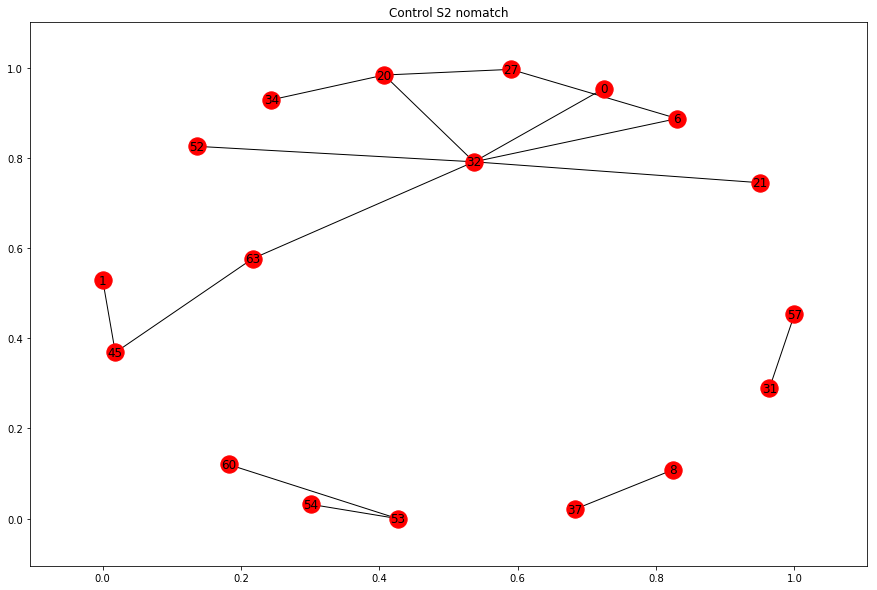

In [194]:
# Networkx plot of all highest correlations observed from 45 control recordings
# Weight: mean of correlation
# length: no. of times correlation observed in recordings

G=nx.Graph()

for l in gp_data:
    G.add_edge(l[0],l[1],weight=l[2],length=l[3])
    #print(l[0])
    
    
nx.draw_networkx(G)
print("length of Y/52 and nd/32 ",nx.shortest_path_length(G,52, 32, weight='length'))
print("weight of Y/52 and nd/32 ",nx.shortest_path_length(G,52, 32,weight='weight'))
fig = plt.gcf()
plt.title("Control S2 nomatch")
fig.set_size_inches(15, 10)
plt.show()

In [ ]:
# It is observed in all 6 Correlation test that Y and nd followed by 01 and nd are most correlated sensors in
# all 122 recordings

In [20]:
stimulus_map={'S1 obj':0,'S2 match':1, 'S2 nomatch':2}

In [ ]:
######################## Part-4 #########################################

In [21]:
### 4.1 Restructuring Dataset ###

# New dataset for alcohol contains 3-lists inside a list denoting S1 obj, S2 match and S2 nomatch. 
# Each of them further conatins lists of size 64 channels corresponding to mean value of a recording (total 77)
# Same for control, storing mean, std-devs and observations

all_c_mean=[[],[],[]]
all_a_mean=[[],[],[]]
all_c_std=[[],[],[]]
all_a_std=[[],[],[]]
all_c_n=[[],[],[]]
all_a_n=[[],[],[]]


for files in range (0,45):
     
    tdata=pickle.load(open("pickles/c"+str(files),"rb"))
    for stimulus in tdata:
        for channel in tdata[stimulus]:
            tdata[stimulus][channel]=(np.mean([float(i) for i in tdata[stimulus][channel]]),np.std([float(i) for i in tdata[stimulus][channel]]),len(tdata[stimulus][channel]))
                
    #print(tdata)
    for stimulus in tdata:
        if stimulus in stimulus_map:
            maind=[0]*64 
            mainsd=[0]*64
            mainn=[0]*64
            for key, value in tdata[stimulus].items():
                maind[channel_map[key]]=value[0]  
                mainsd[channel_map[key]]=value[1]
                mainn[channel_map[key]]=value[2]
            all_c_mean[stimulus_map[stimulus]].append(maind) 
            all_c_std[stimulus_map[stimulus]].append(mainsd)
            all_c_n[stimulus_map[stimulus]].append(mainn)
       
    ptr=0
    del maind
    del mainsd
    del mainn
    
pickle.dump(all_c_mean,open("all_c_mean","wb"))
pickle.dump(all_c_std,open("all_c_std","wb")) 
pickle.dump(all_c_n,open("all_c_n","wb")) 
del all_c_mean
del all_c_std
del all_c_n

for files in range (0,77):
     
    tdata=pickle.load(open("pickles/a"+str(files),"rb"))
    for stimulus in tdata:
        for channel in tdata[stimulus]:
            tdata[stimulus][channel]=(np.mean([float(i) for i in tdata[stimulus][channel]]),np.std([float(i) for i in tdata[stimulus][channel]]),len(tdata[stimulus][channel]))
                
    #print(tdata)
    for stimulus in tdata:
        if stimulus in stimulus_map:
            maind=[0]*64
            mainsd=[0]*64
            mainn=[0]*64
            for key, value in tdata[stimulus].items():
                maind[channel_map[key]]=value[0]
                mainsd[channel_map[key]]=value[1]
                mainn[channel_map[key]]=value[2]
            #print(maind)    
            all_a_mean[stimulus_map[stimulus]].append(maind)
            all_a_std[stimulus_map[stimulus]].append(mainsd)
            all_a_n[stimulus_map[stimulus]].append(mainn)
       
    ptr=0
    del maind 
    del mainsd
    del mainn

pickle.dump(all_a_mean,open("all_a_mean","wb"))  
pickle.dump(all_a_std,open("all_a_std","wb")) 
pickle.dump(all_a_n,open("all_a_n","wb")) 

del all_a_mean
del all_a_std 
del all_a_n

In [3]:
import pickle

all_a_mean=pickle.load(open("all_a_mean","rb"))
all_a_std=pickle.load(open("all_a_std","rb"))
all_a_n=pickle.load(open("all_a_n","rb"))
all_c_mean=pickle.load(open("all_c_mean","rb"))
all_c_std=pickle.load(open("all_c_std","rb"))
all_c_n=pickle.load(open("all_c_n","rb"))

In [4]:
# Now we have mean, std, n of all channels of all recordings
# We have to find Resultant Mean, STD and N of all recording corrsponding to each channel
# Now Dataset has 3-list for differnet stimulus and each of them contains mean/std/n of all 64 channels observed 

import numpy as np

for k in range(0,3):
    for i in range(0,64):
        t_n=[all_c_n[k][j][i] for j in range(0,45)]
        t_mean=[all_c_mean[k][j][i] for j in range(0,45)]
        t_sd=[all_c_std[k][j][i] for j in range(0,45)]
        total_n=sum(t_n)
        total_mean=sum([t_n[j]*t_mean[j] for j in range(0,len(t_mean))])/total_n
        
        # Resultant SD Calculations
        z=0
        for ptr in range(0,45):
            x=(t_n[ptr]-1)*pow(t_sd[ptr],2)
            y=t_n[ptr]*pow((t_mean[ptr]-total_mean),2)
            z=z+x+y
        total_std=z/(total_n-1)           
        all_c_mean[k][0][i]=total_mean
        all_c_std[k][0][i]=total_std
        all_c_n[k][0][i]=total_n
        
    del all_c_mean[k][1:]  
    del all_c_std[k][1:]
    del all_c_n[k][1:]
    
for k in range(0,3):
    for i in range(0,64):
        t_n=[all_a_n[k][j][i] for j in range(0,77)]
        t_mean=[all_a_mean[k][j][i] for j in range(0,77)]
        t_sd=[all_a_std[k][j][i] for j in range(0,77)]
        total_n=sum(t_n)
        total_mean=sum([t_n[j]*t_mean[j] for j in range(0,len(t_mean))])/total_n
        
        # Resultant SD Calculations
        z=0
        for ptr in range(0,45):
            x=(t_n[ptr]-1)*pow(t_sd[ptr],2)
            y=t_n[ptr]*pow((t_mean[ptr]-total_mean),2)
            z=z+x+y
        total_std=z/(total_n-1)           
        all_a_mean[k][0][i]=total_mean
        all_a_std[k][0][i]=total_std
        all_a_n[k][0][i]=total_n
        
    del all_a_mean[k][1:]  
    del all_a_std[k][1:]
    del all_a_n[k][1:]
      


In [18]:
# 4.2 Hypothesis tetsing ##

# Confidence Interval: 95% (two tailed)

# We have two samples i.e. of alcohol and control, and means and std of 64 channels for 3 stimulus
# Here we will run test for all 3 stimulus and 64 channels
# First we will select a stimulus then we will run test on every channel from alcohol and control

# 1st Test out of 64*3 Tests

# We consider both population same and innocent before test
# H0: u1-u2=0 (channel P07 has same mean for stimulus S1 obj in alcohols and controls resp. population)
# H1: u1-u2!=0

# x1 and x2 are sample means of channel 'P07' for stimulus S1 obj for alcohols and control resp.
# s1 and s2 are std of channel 'P07' for stimulus S1 obj for alcohols and control resp.
# n1 and n2 are observations of channel 'P07' for stimulus S1 obj for alcohols and control resp.

# z0= (x1-x2-(u1-u2))/srqt([s1^2/n1]+[s2^2/n2])

# if -1.96< z0 < 1.96 then we will accept H0 else reject  

# Plots of Hypothesis Curve are just to show rejection and acceptance with illustration
# Y axis is assumpted

In [5]:
# funtion to plot normalization curve 

def normplot(z,title):
    mu = 0
    variance = 1
    sigma = math.sqrt(variance)
    x = np.linspace(mu-3*variance,mu+3*variance, 100)
    plt.plot(x,mlab.normpdf(x, mu, sigma))
    plt.axvline(x=-1.96,color='k')
    plt.axvline(x=1.96,color='k')
    plt.axvline(x=z,color='r')
    plt.title(title)
    plt.show()
    plt.clf()


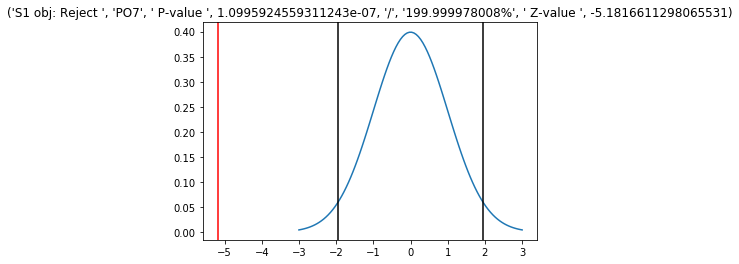

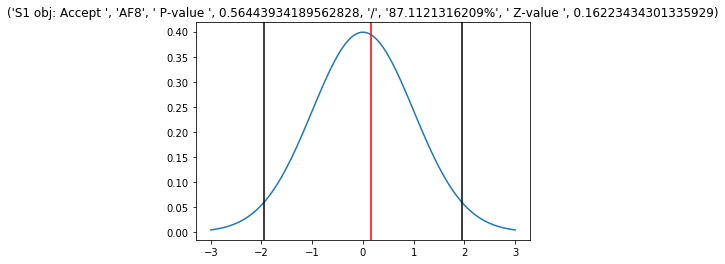

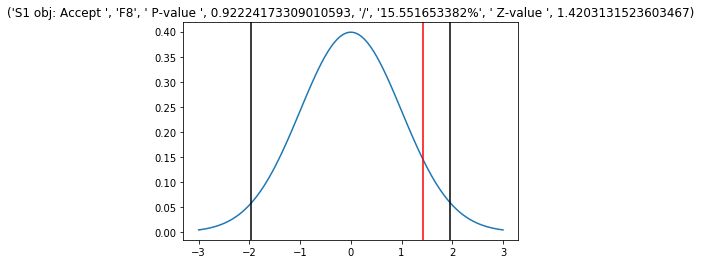

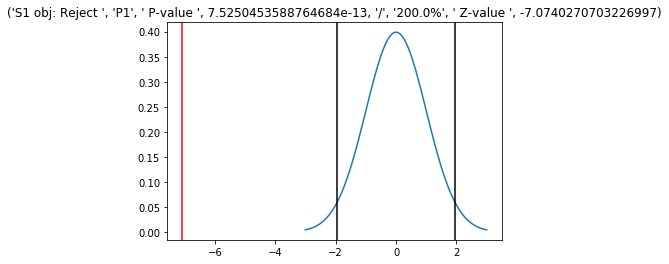

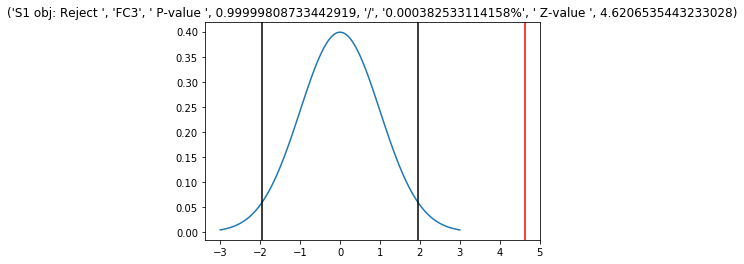

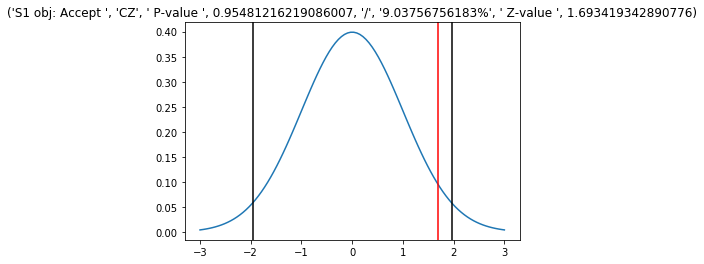

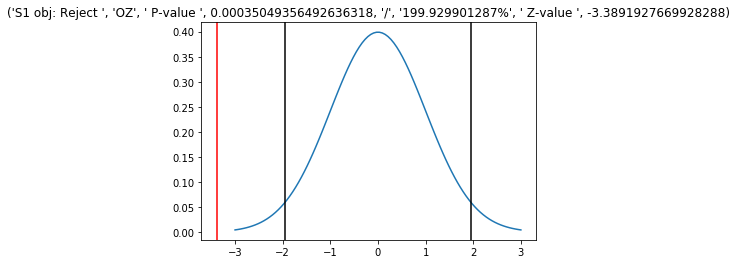

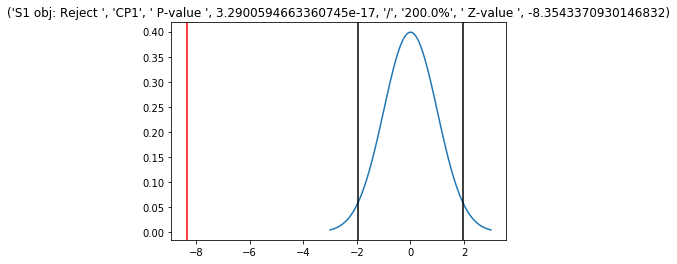

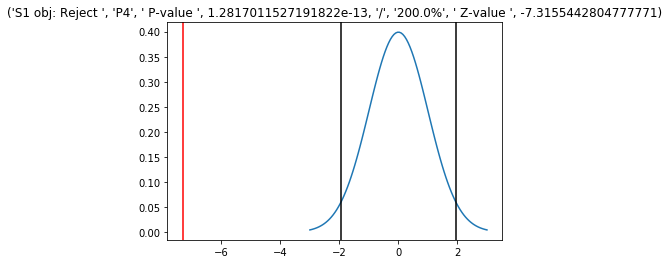

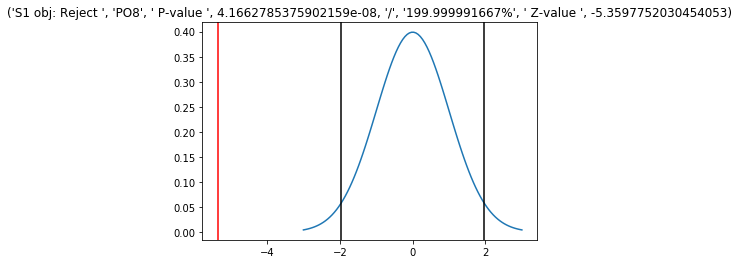

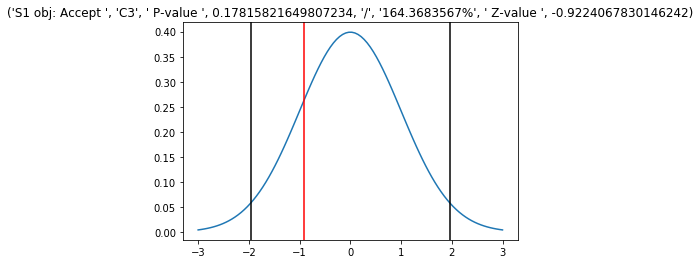

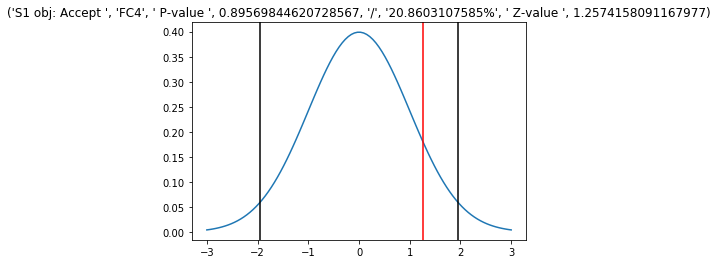

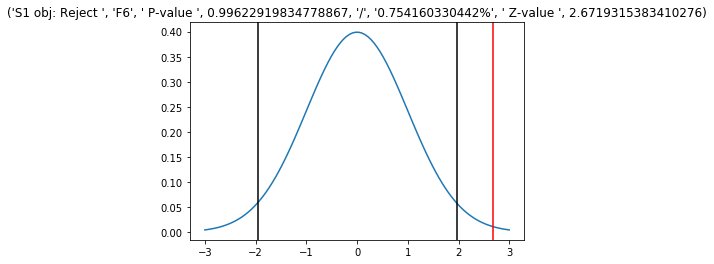

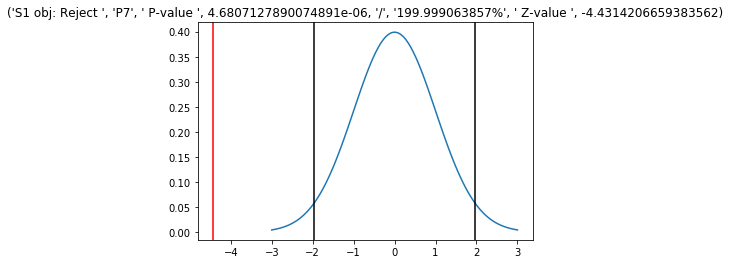

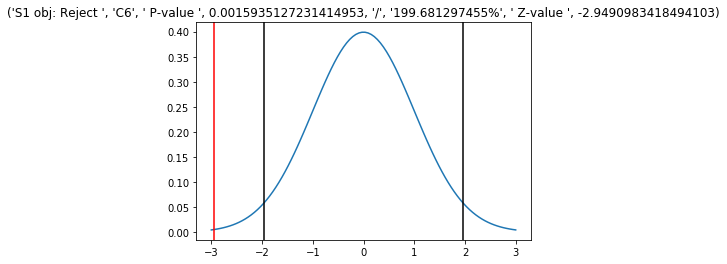

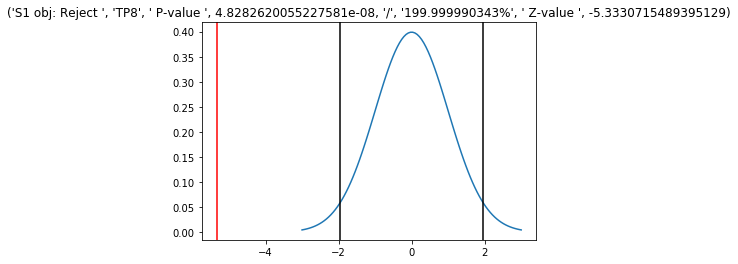

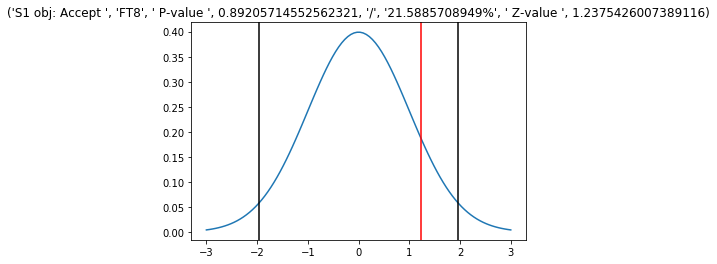

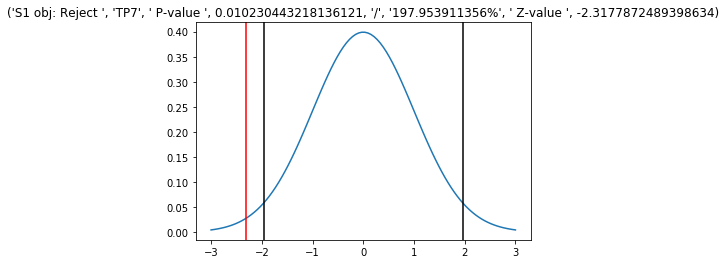

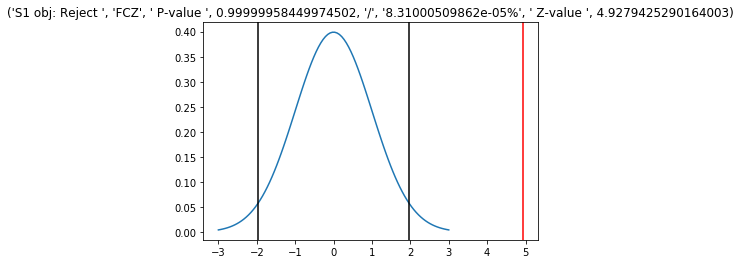

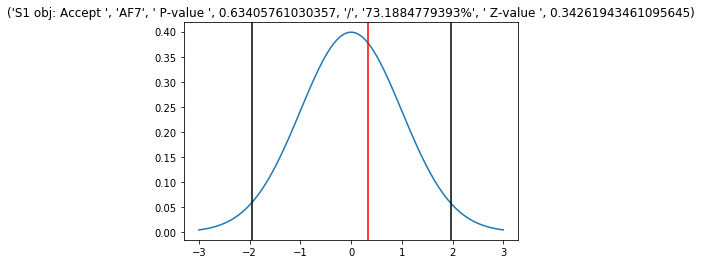

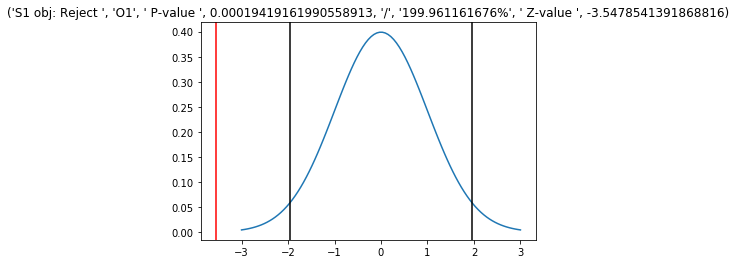

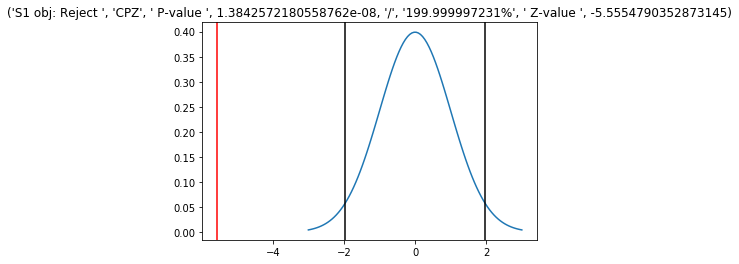

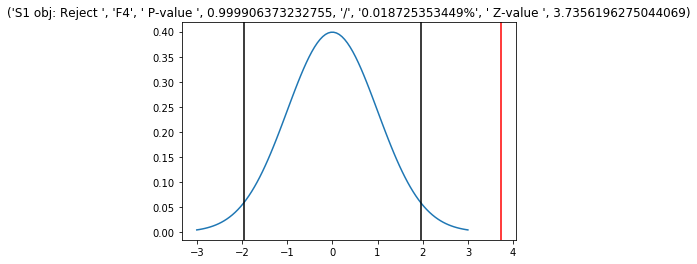

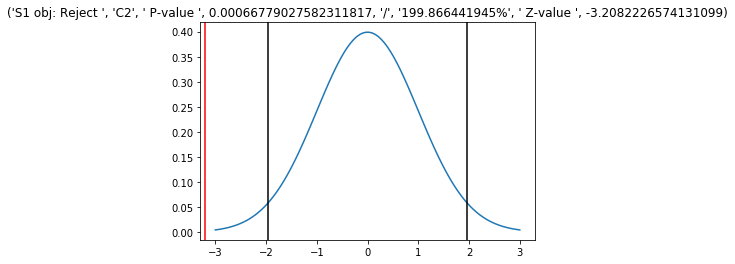

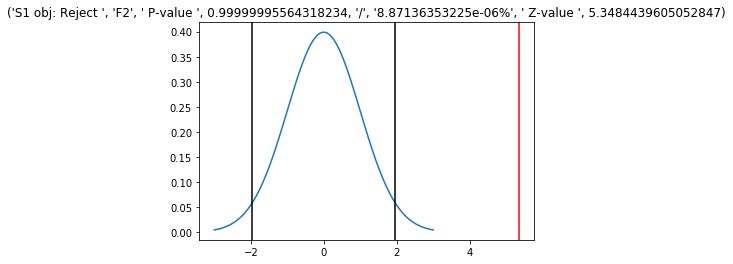

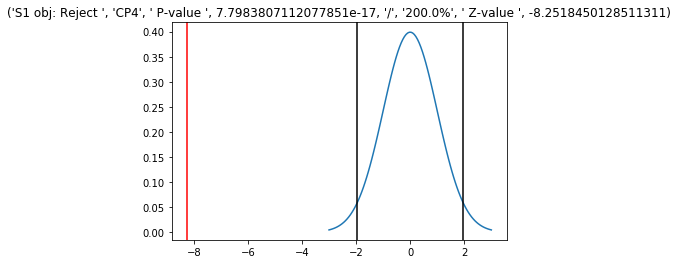

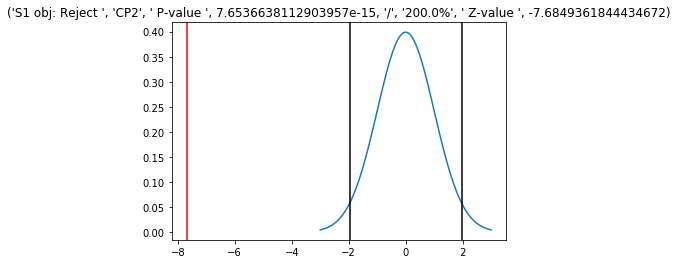

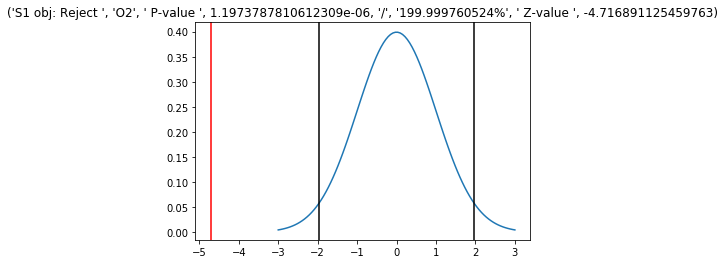

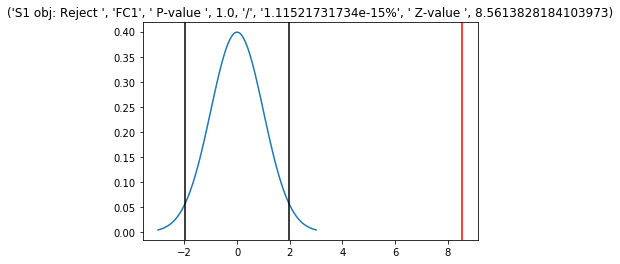

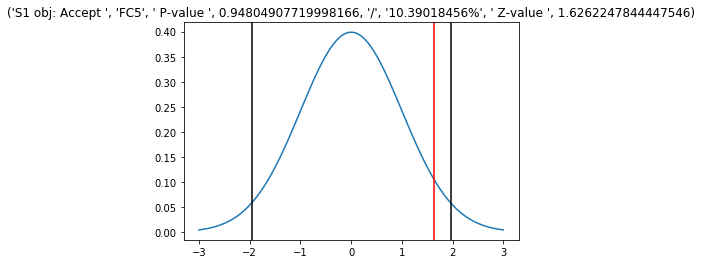

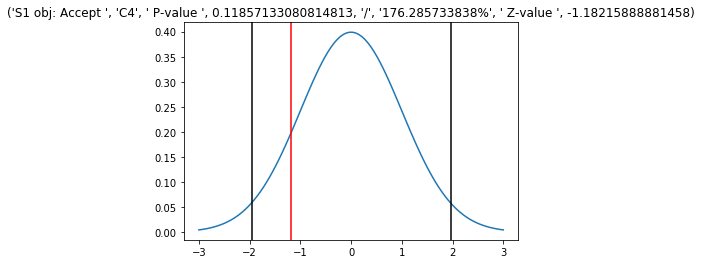

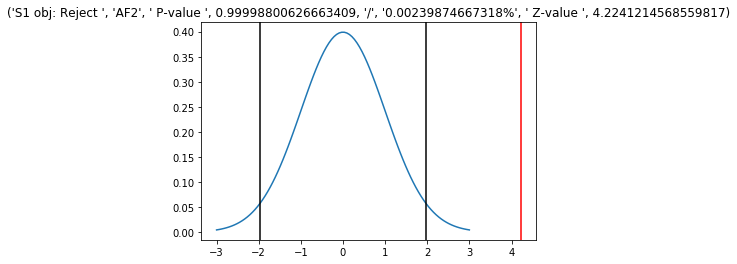

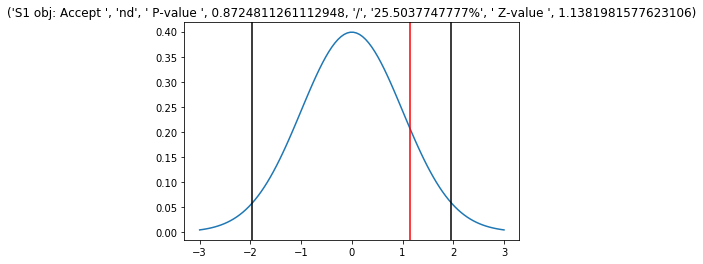

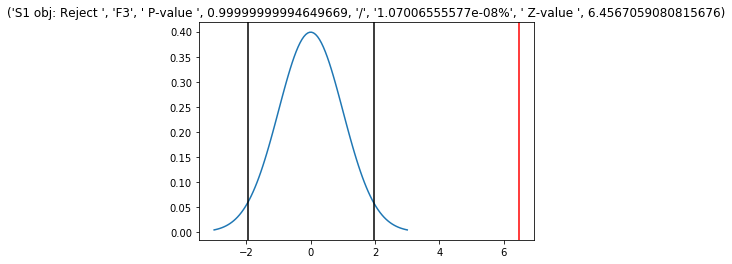

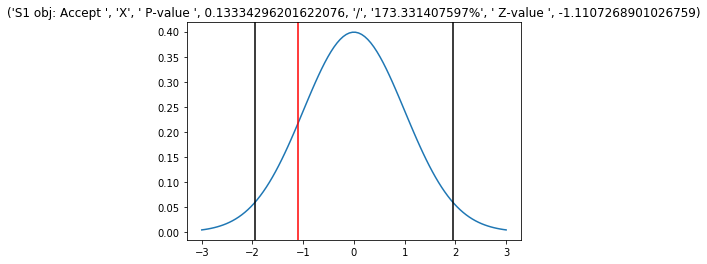

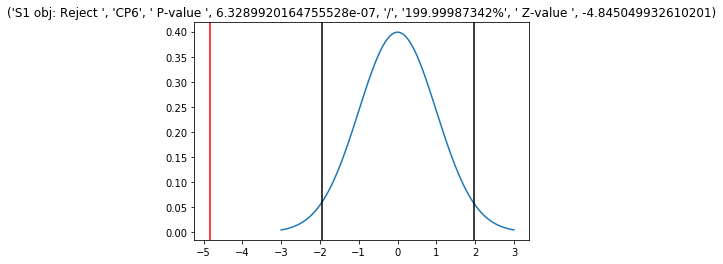

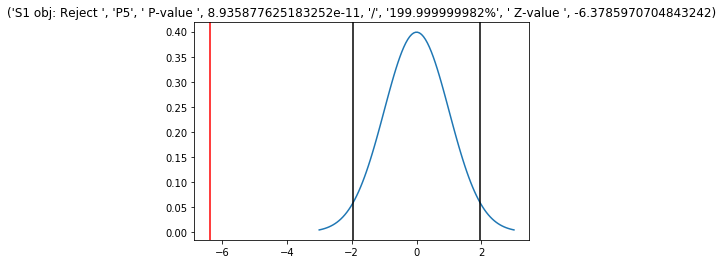

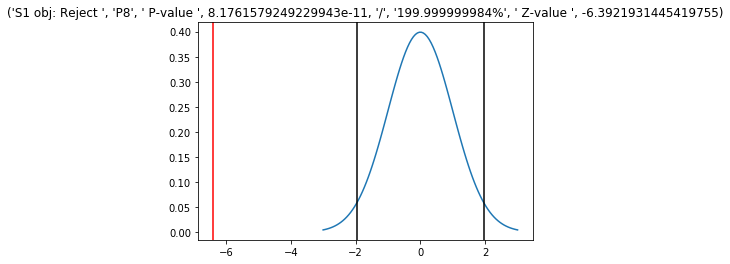

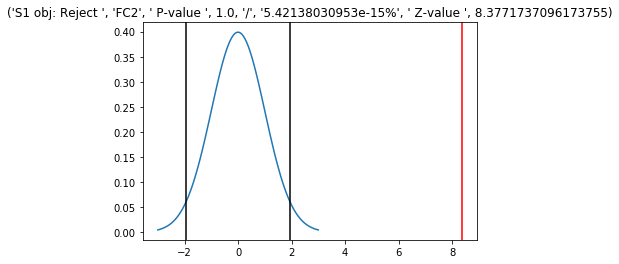

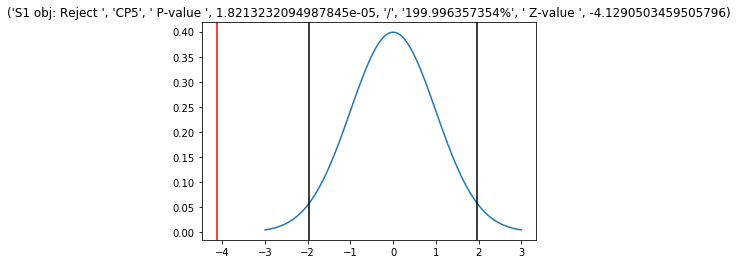

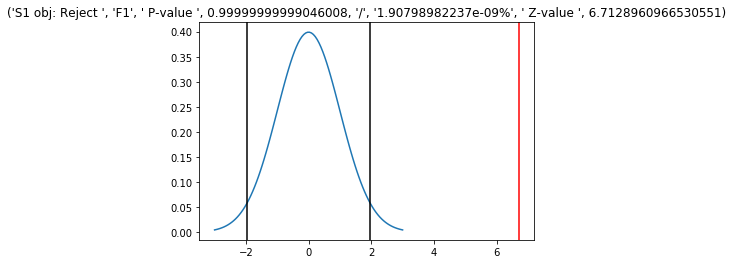

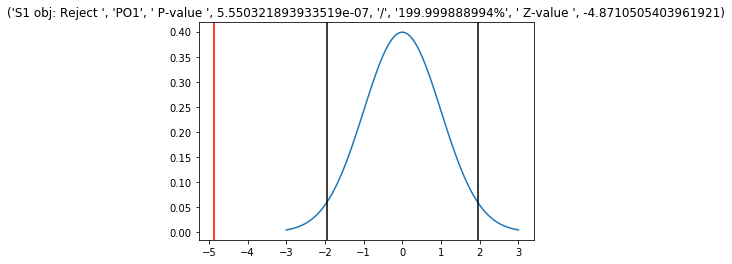

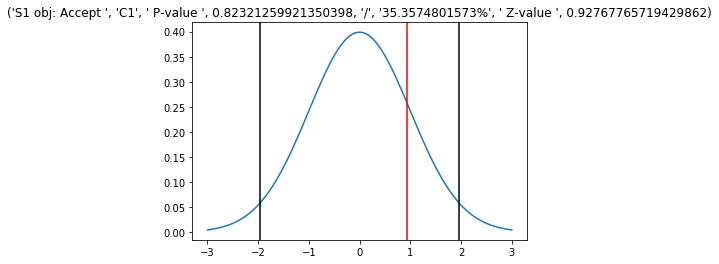

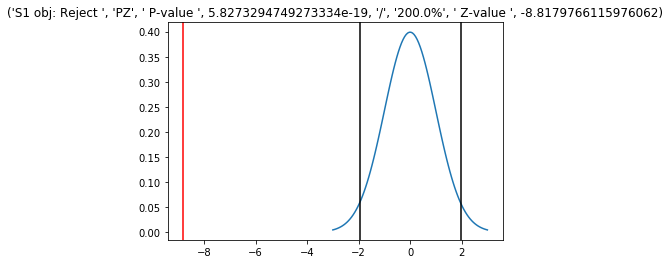

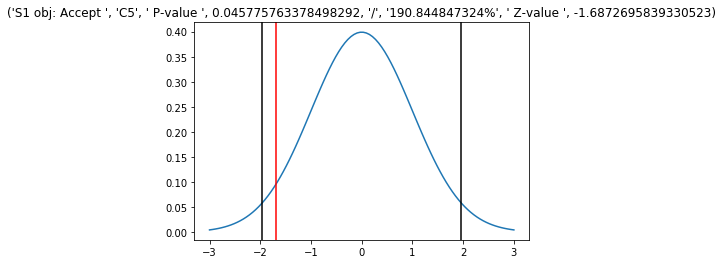

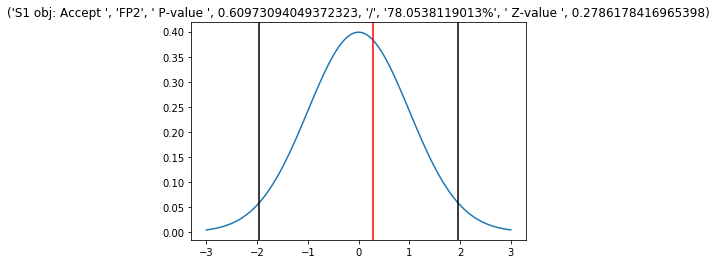

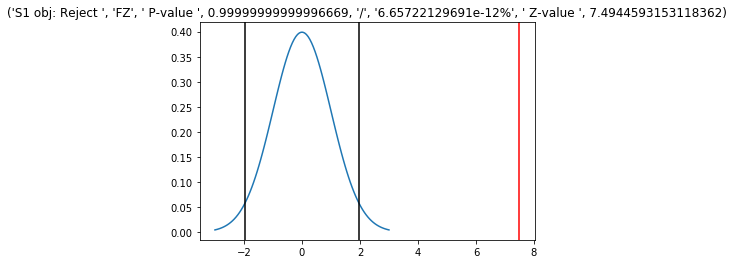

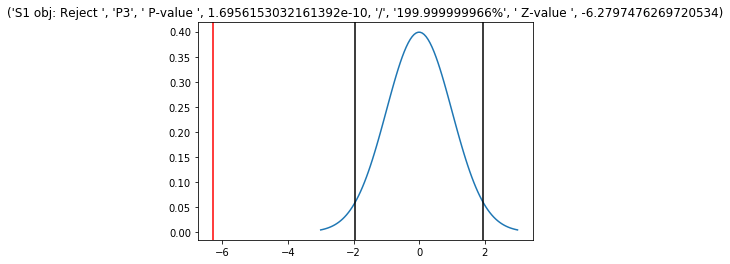

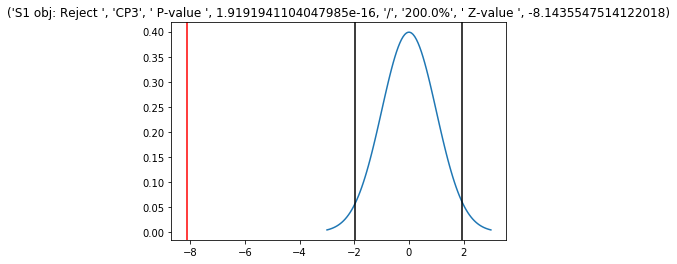

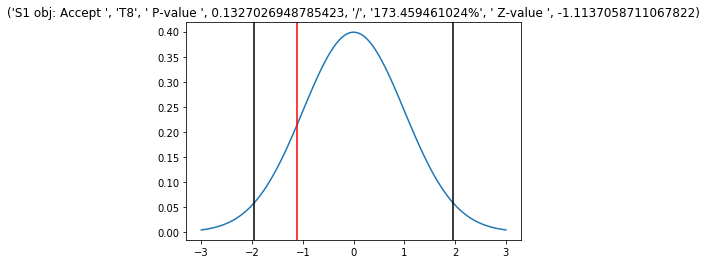

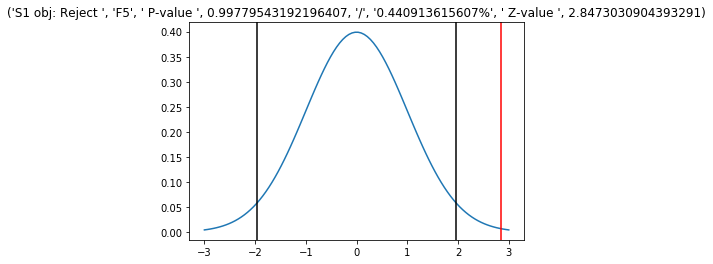

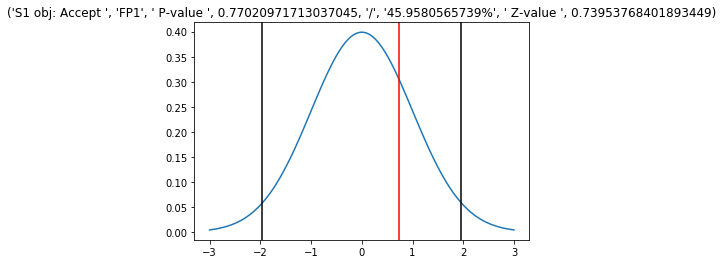

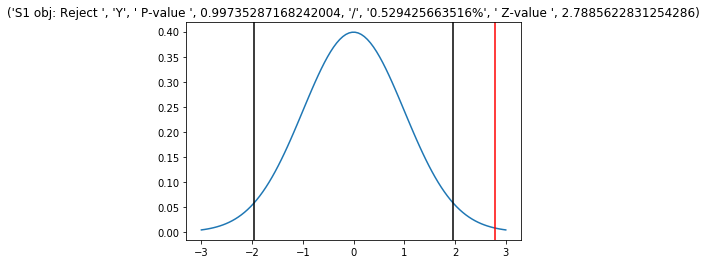

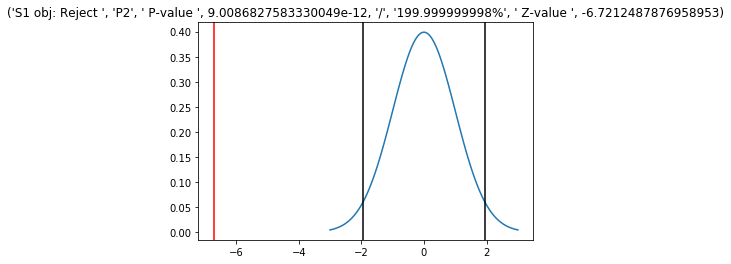

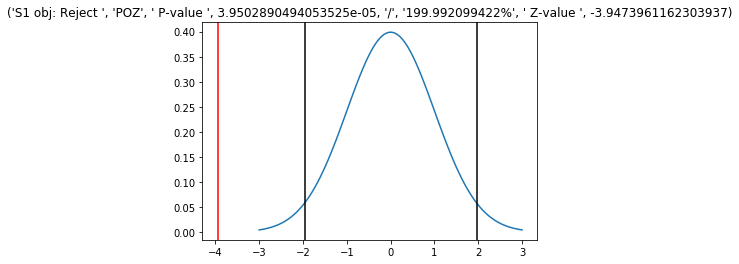

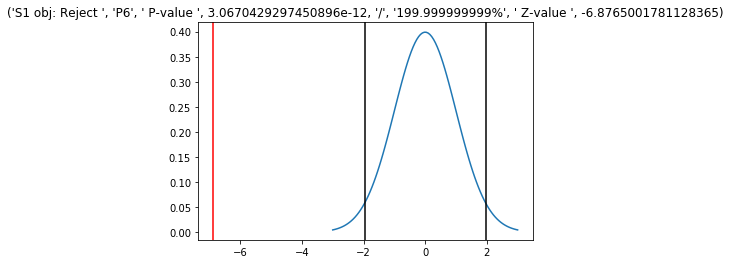

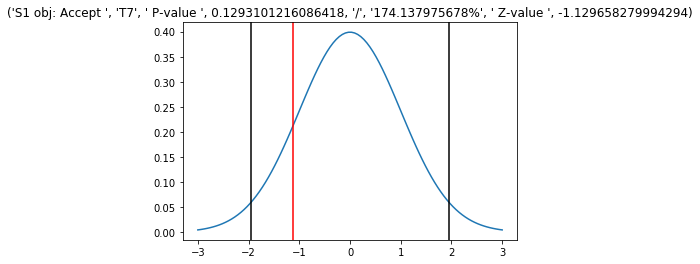

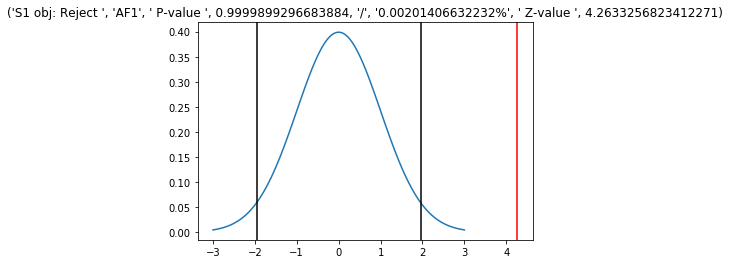

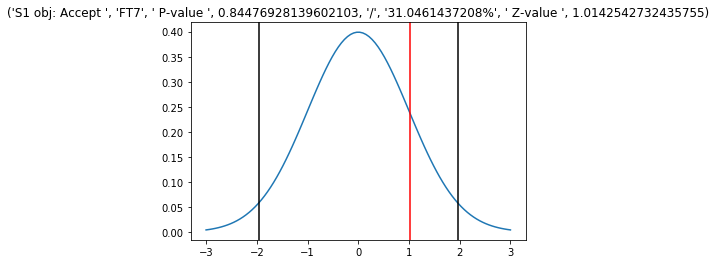

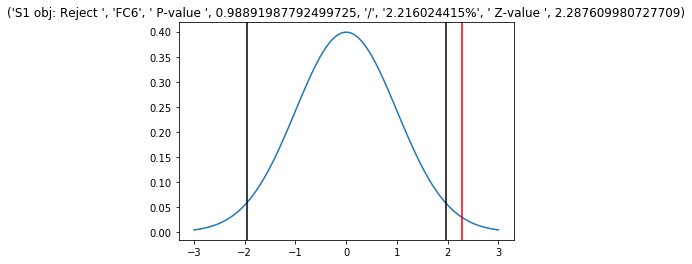

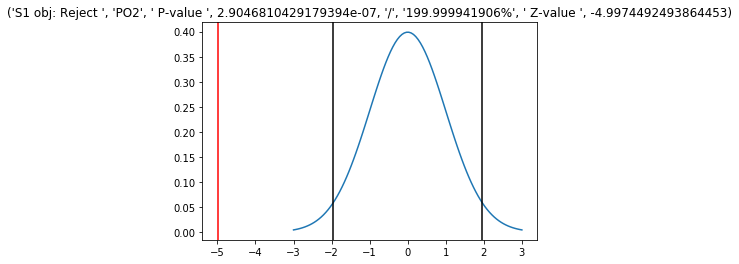

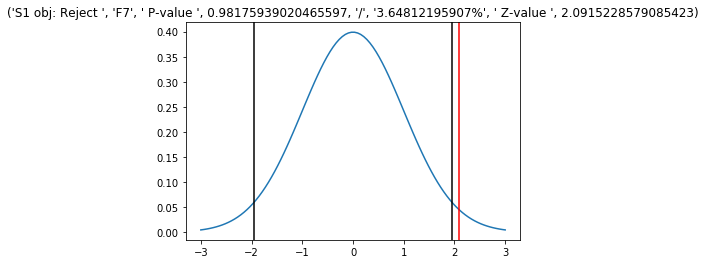

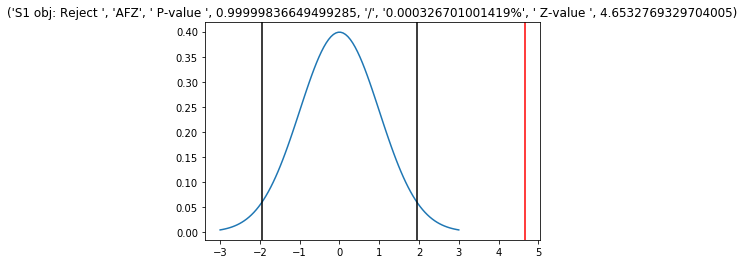

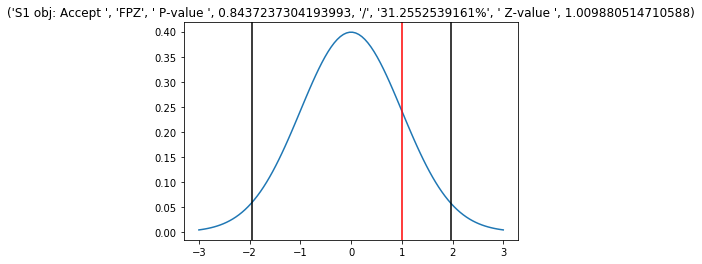

In [10]:
## 4.21 S1 obj ##
# Check for 64 channel for stumulus 'S1 obj'

from math import sqrt
import scipy.stats as st
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import math

s1_accept={}
s1_reject={}

for i in range(0,64):
    z0=(all_a_mean[0][0][i]-all_c_mean[0][0][i])/sqrt((pow(all_a_std[0][0][i],2)/all_a_n[0][0][i])+(pow(all_c_std[0][0][i],2)/all_c_n[0][0][i]))
    if -1.959 < z0 < 1.959:
        p_value=st.norm.cdf(z0)
        alpha=str(st.norm.cdf(-z0)*2*100)+"%"
        message=("S1 obj: Accept ",index_map[i]," P-value ",p_value,"/",alpha," Z-value ",z0)
        normplot(z0,message)
        s1_accept[i]=p_value
    else:
        p_value=st.norm.cdf(z0)
        alpha=str(st.norm.cdf(-z0)*2*100)+"%"
        message=("S1 obj: Reject ",index_map[i]," P-value ",p_value,"/",alpha," Z-value ",z0)
        normplot(z0,message)
        s1_reject[i]=p_value


# Plots of Hypothesis Curve are just to show rejection and acceptance with illustration
# Y axis is assumpted

# Here are 64 Plots #RED# line shows z value, while #BLACK# line depicks confidence interval        

In [11]:
# Now to conclude S1 obj test for all 64 channels

print("Accepted Channel that observed no significant difference between alcohol and control")
print([ index_map[i] for i in s1_accept],"\n")

print("Rejected Channel that observed significant difference between alcohol and control")
print([ index_map[i] for i in s1_reject])

Accepted Channel that observed no significant difference between alcohol and control
['nd', 'AF8', 'F8', 'CZ', 'C1', 'C3', 'FC4', 'C5', 'X', 'FP2', 'FT8', 'T8', 'AF7', 'T7', 'FT7', 'FPZ', 'FC5', 'C4', 'FP1'] 

Rejected Channel that observed significant difference between alcohol and control
['PO7', 'P1', 'FC3', 'OZ', 'CP1', 'P4', 'PO8', 'F6', 'P7', 'C6', 'TP8', 'TP7', 'FCZ', 'O1', 'CPZ', 'F4', 'C2', 'F2', 'CP4', 'CP2', 'O2', 'FC1', 'AF2', 'F3', 'CP6', 'P5', 'P8', 'FC2', 'CP5', 'F1', 'PO1', 'PZ', 'FZ', 'P3', 'CP3', 'F5', 'Y', 'P2', 'POZ', 'P6', 'AF1', 'FC6', 'PO2', 'F7', 'AFZ']


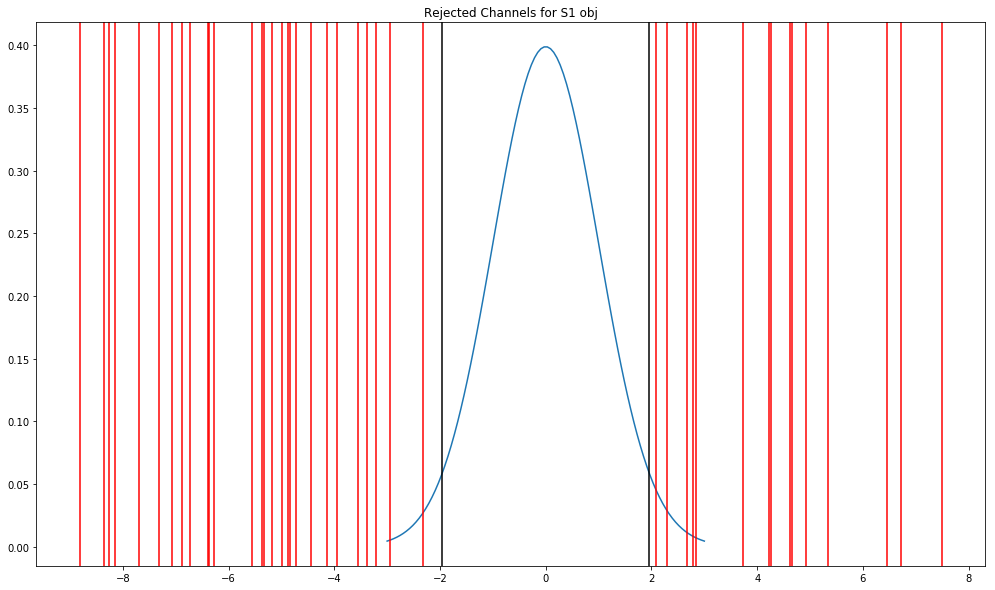

In [12]:
# P-values of rejected channels to depict their significance

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu-3*variance,mu+3*variance, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.axvline(x=-1.96,color='k')
plt.axvline(x=1.96,color='k')
for l in s1_reject:
    #print(st.norm.ppf(s1_reject[l]))
    plt.axvline(x=st.norm.ppf(s1_reject[l]),color='r')
plt.title("Rejected Channels for S1 obj")
fig = plt.gcf()
fig.set_size_inches(17, 10)
plt.show()
plt.clf()

# Here we can observe that many channels are significantly different. Lets find them

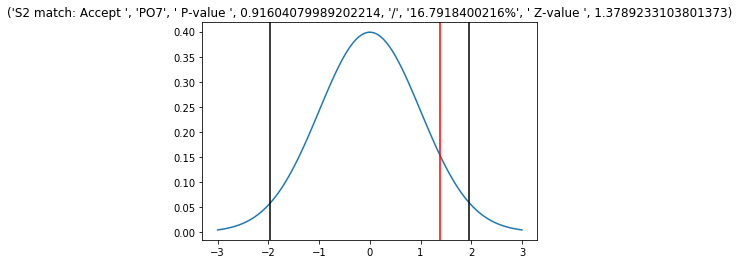

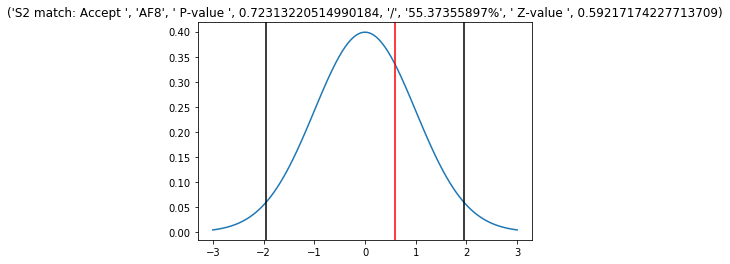

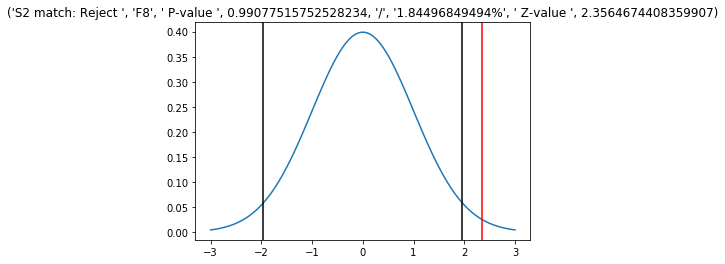

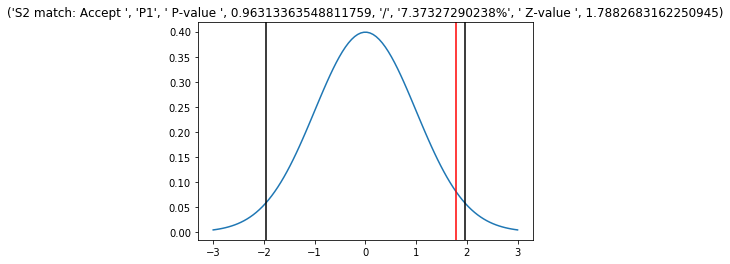

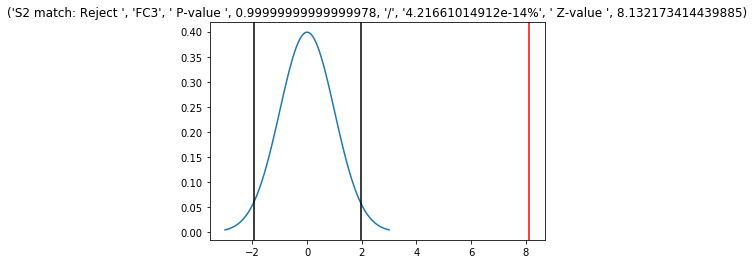

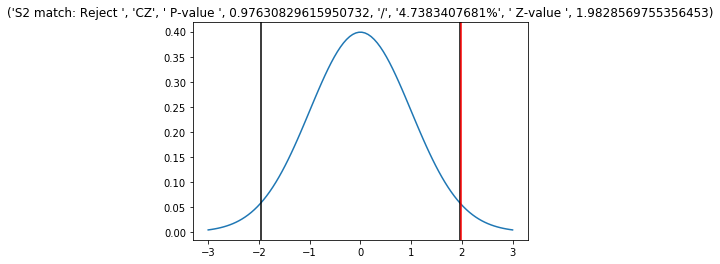

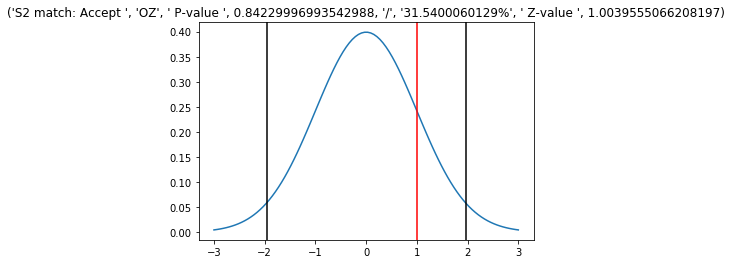

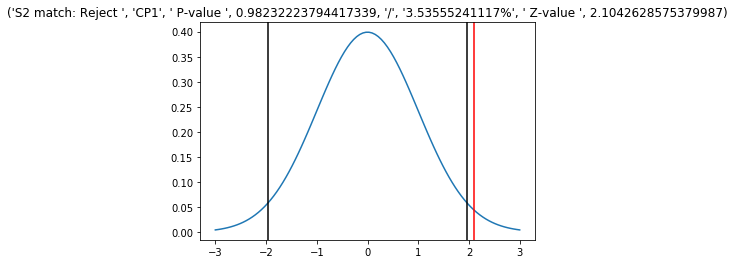

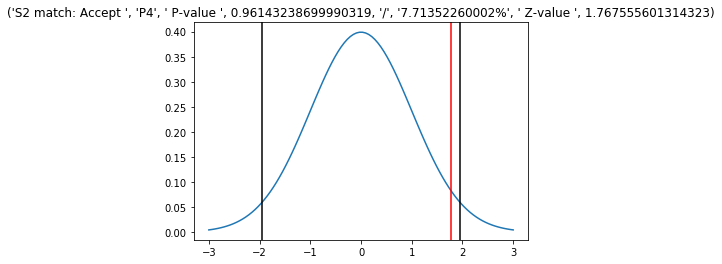

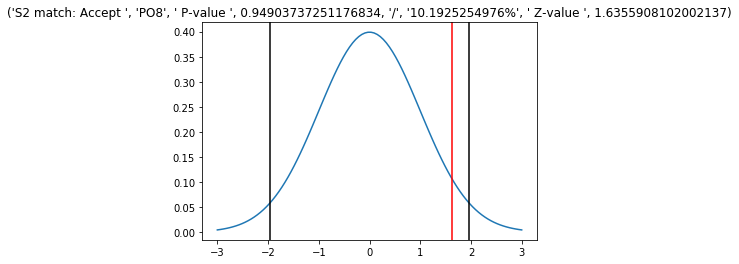

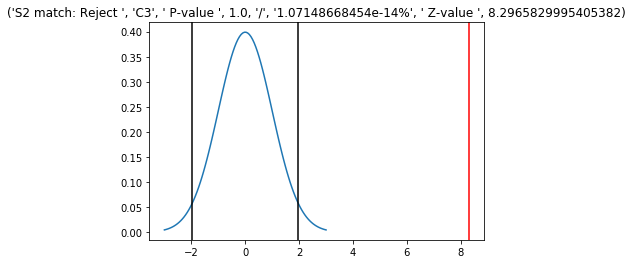

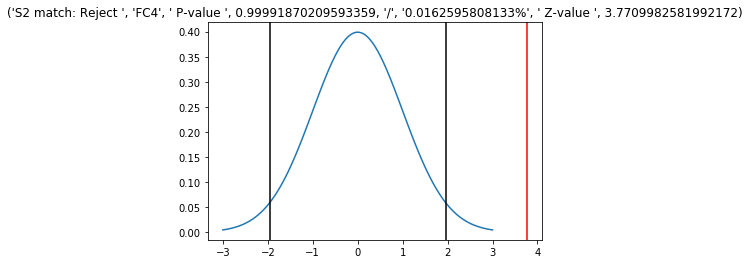

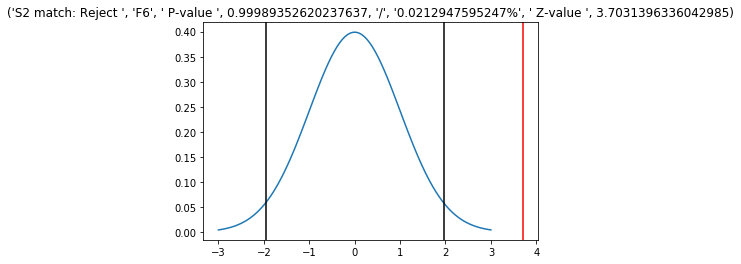

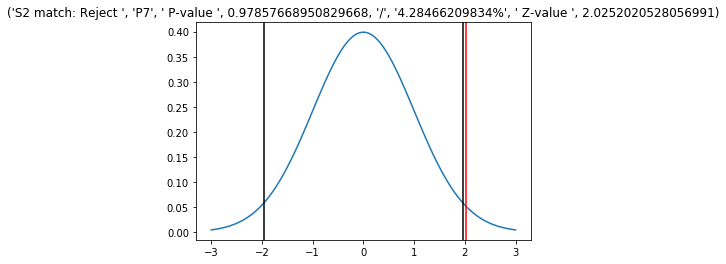

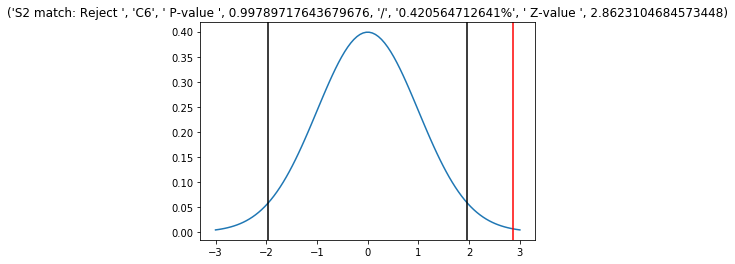

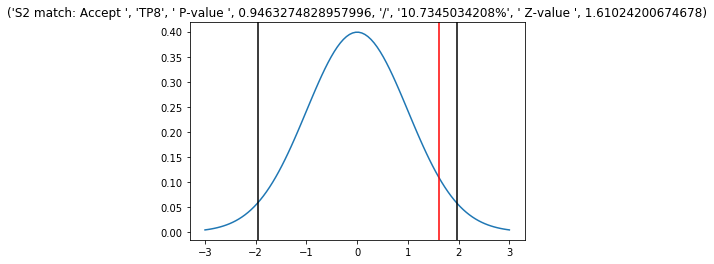

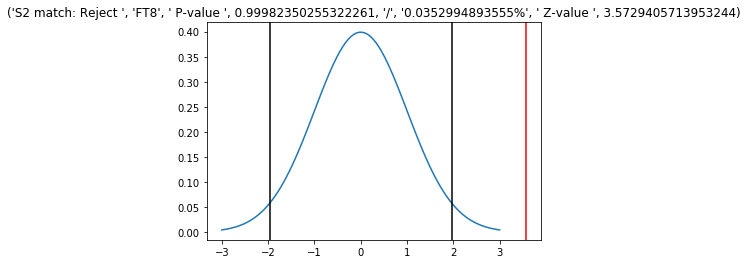

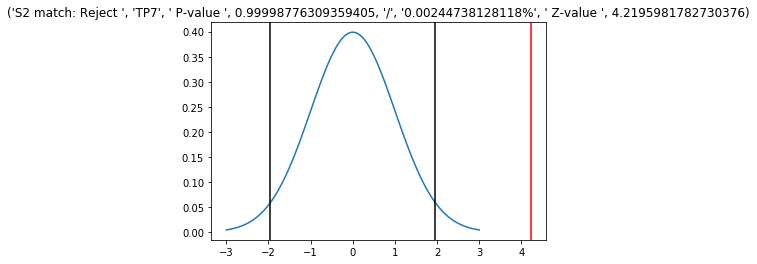

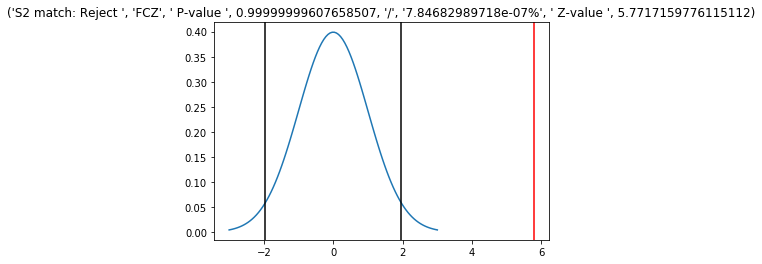

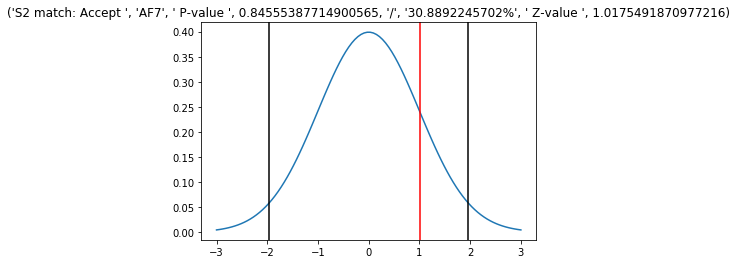

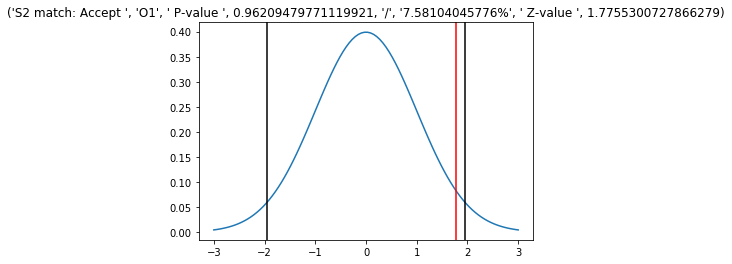

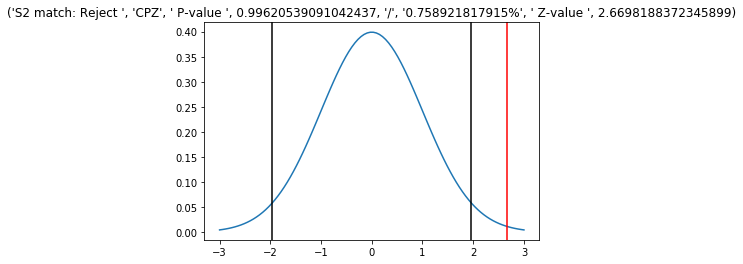

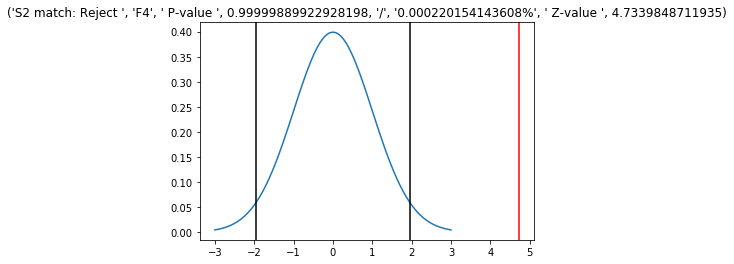

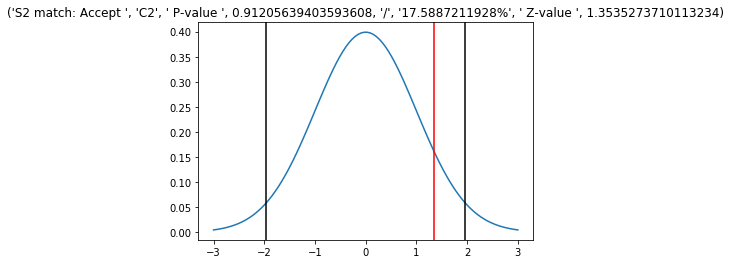

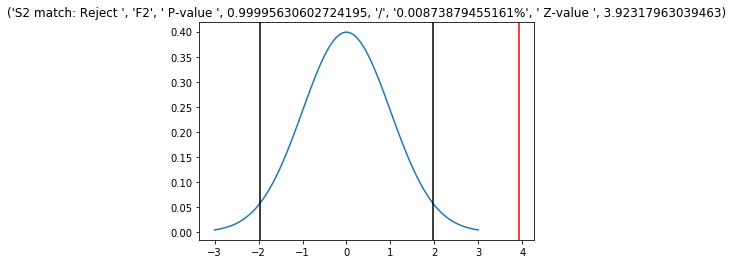

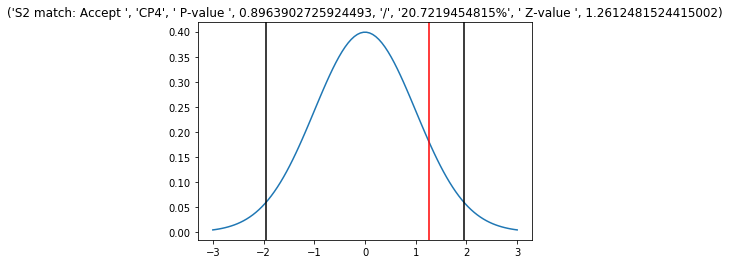

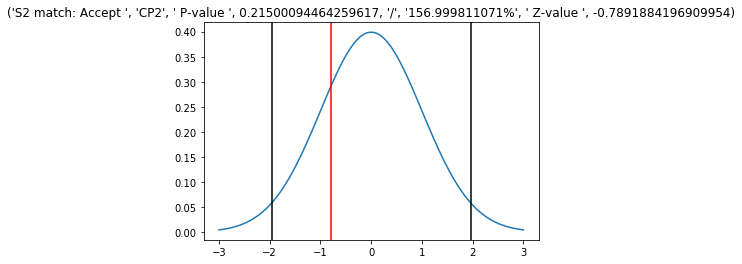

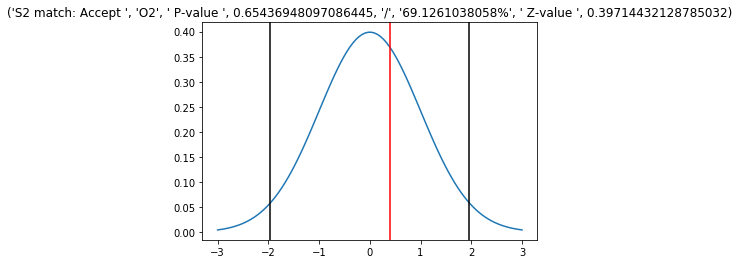

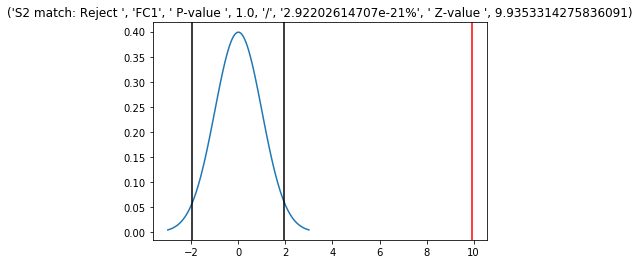

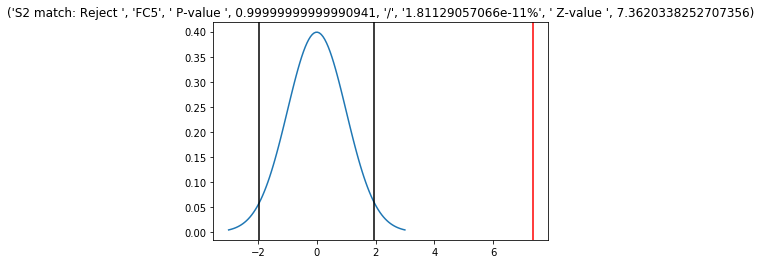

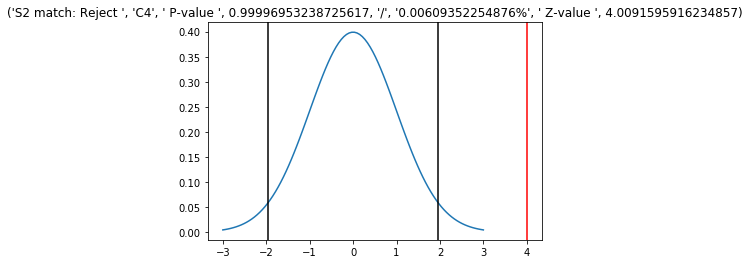

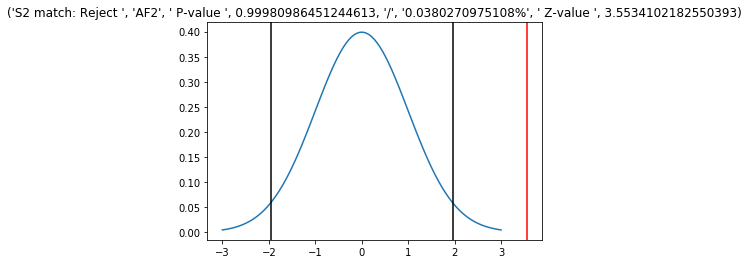

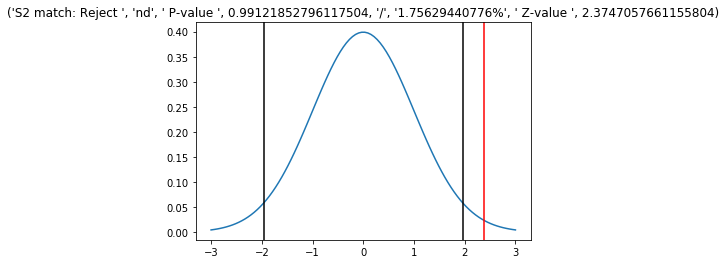

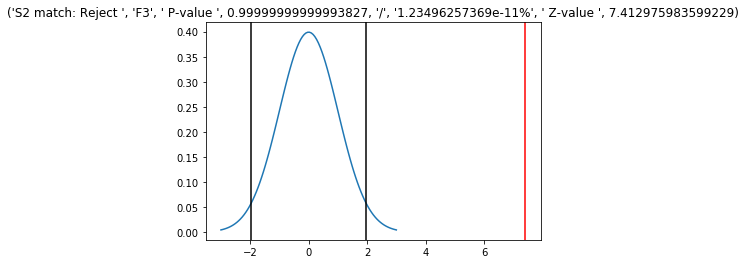

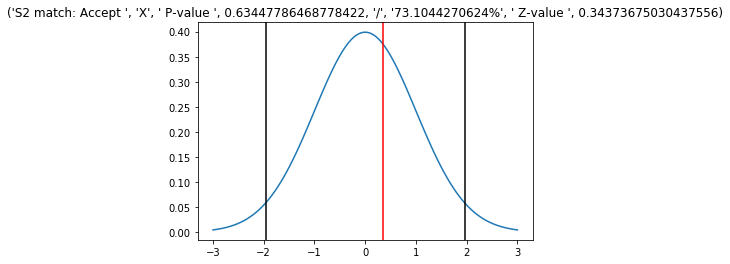

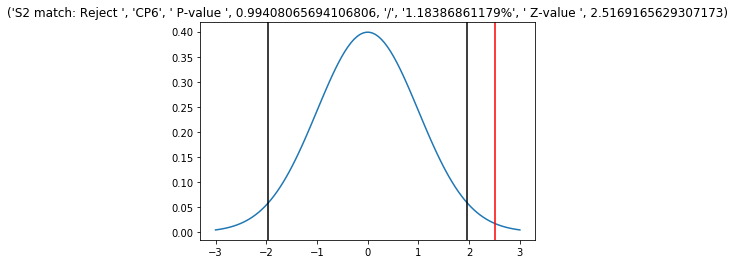

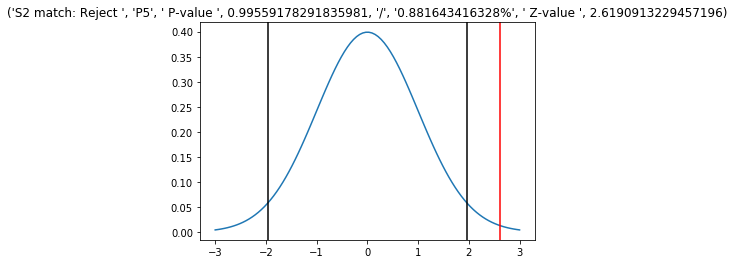

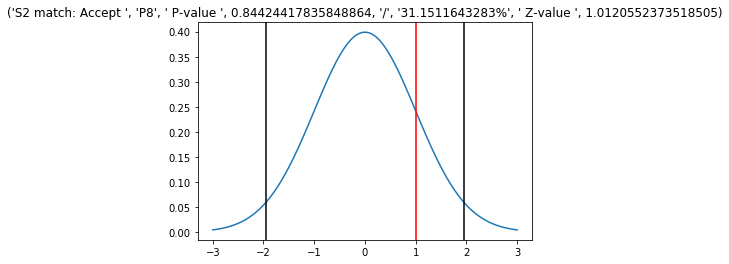

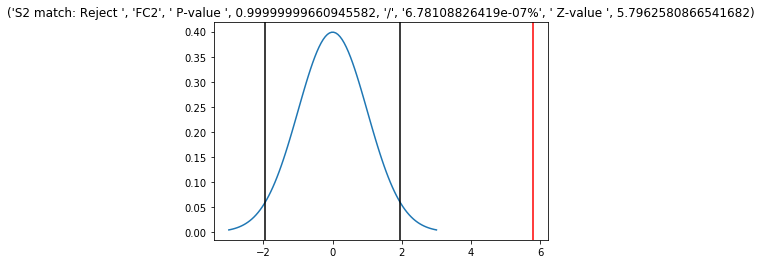

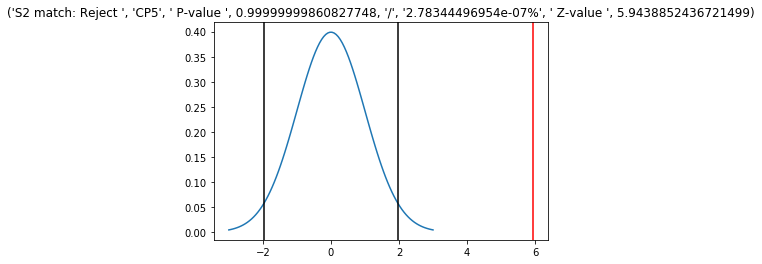

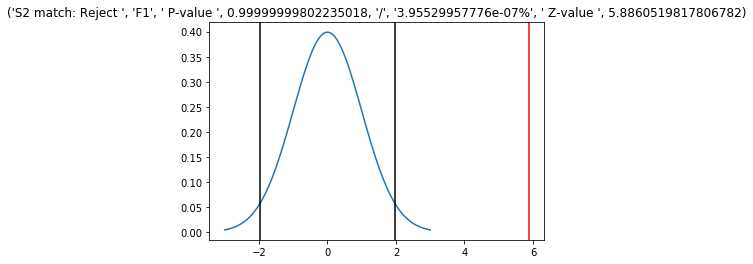

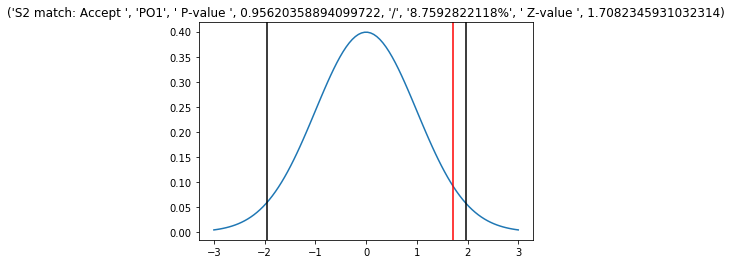

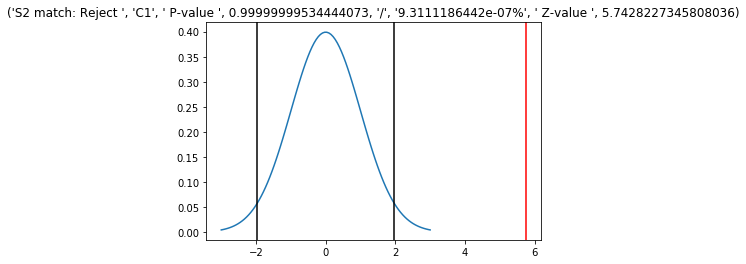

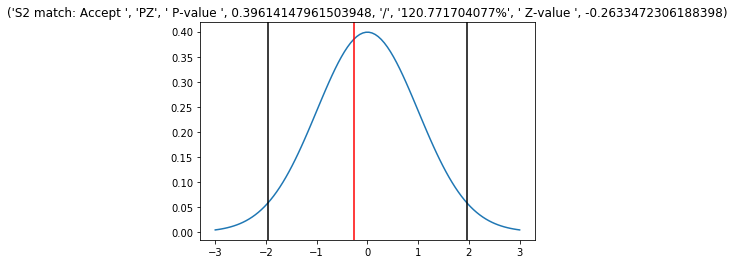

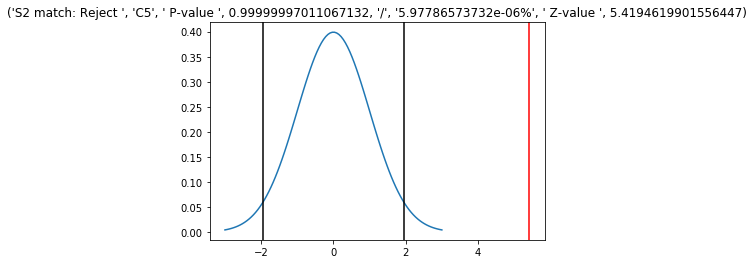

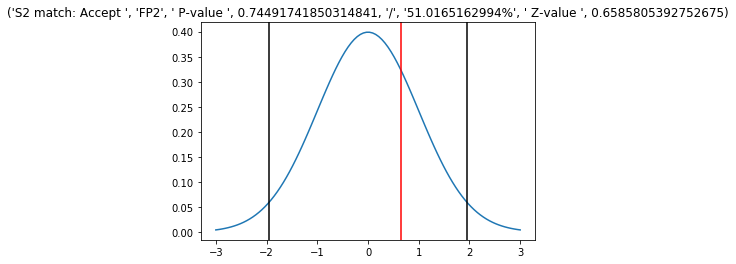

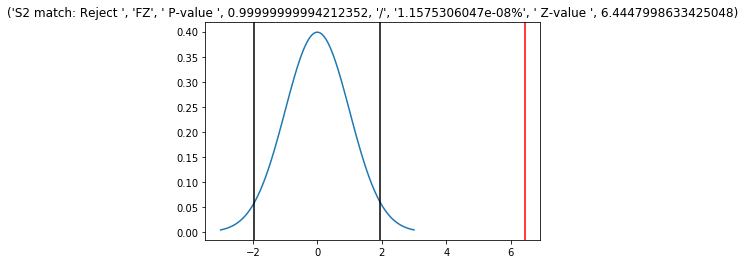

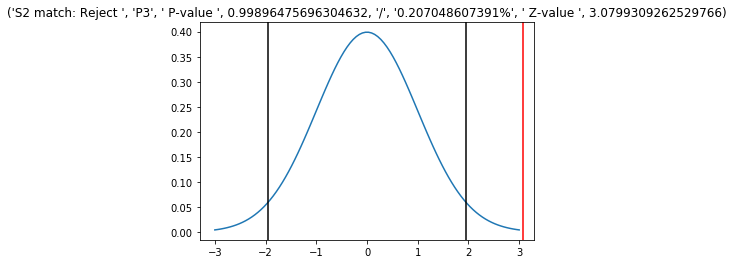

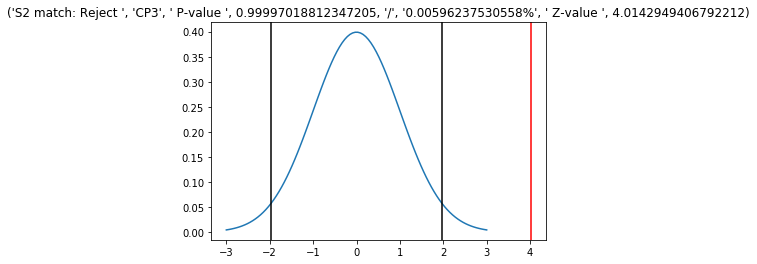

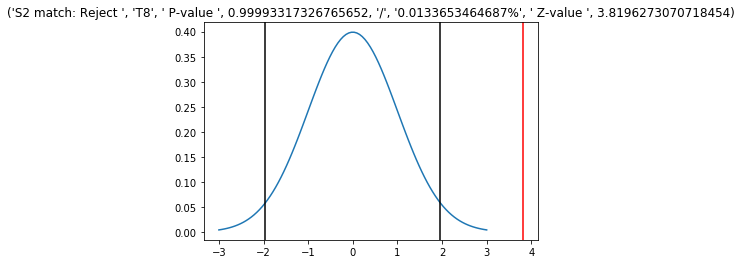

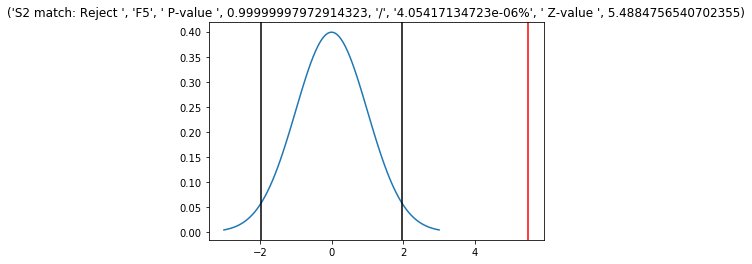

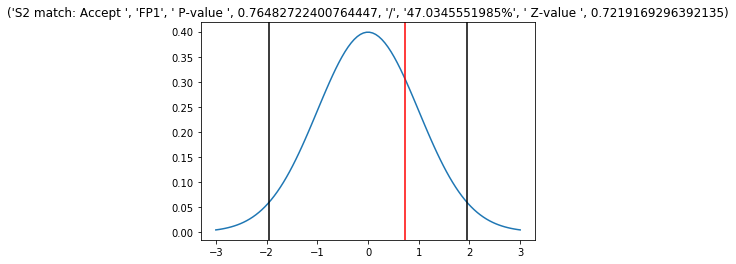

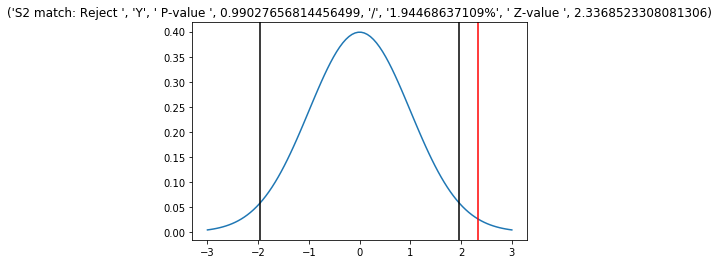

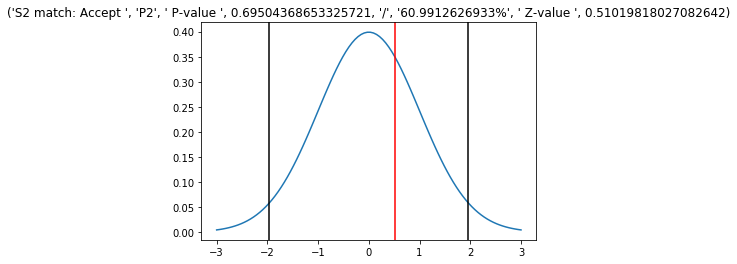

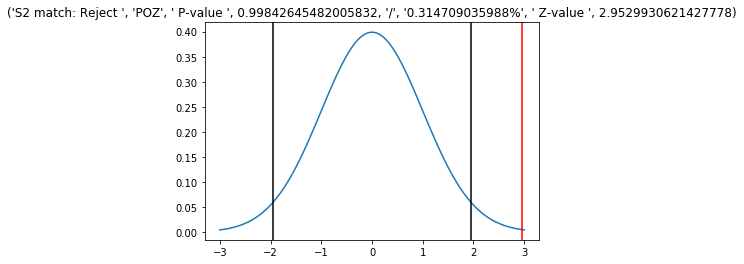

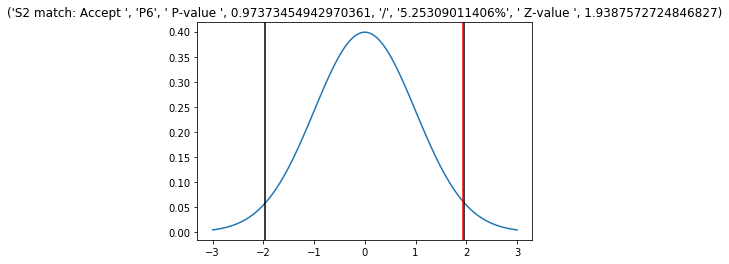

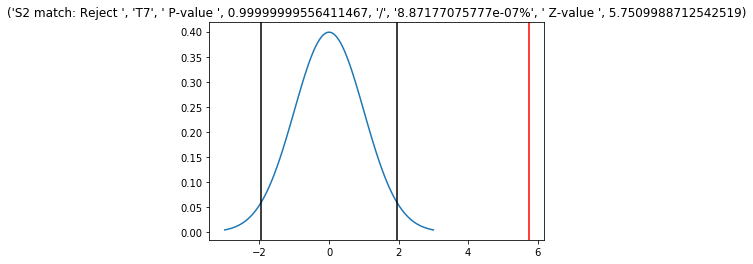

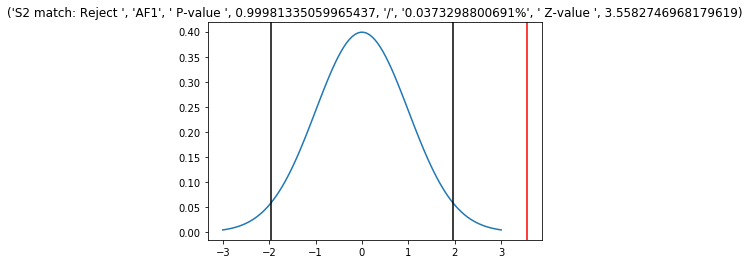

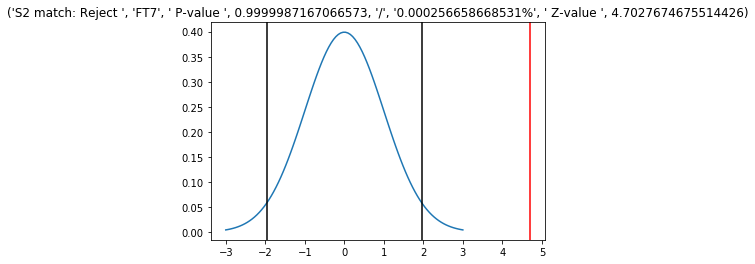

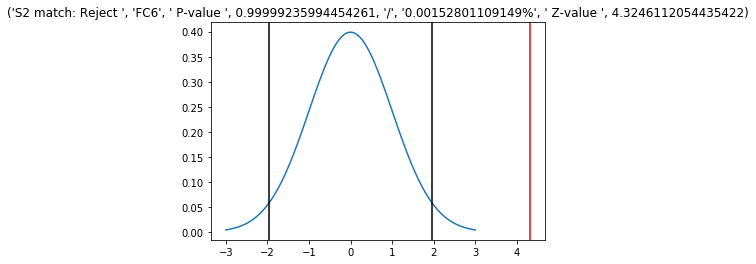

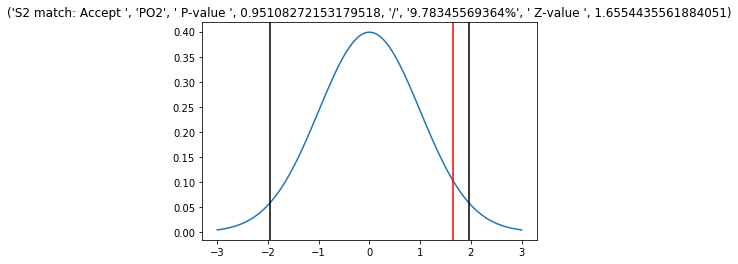

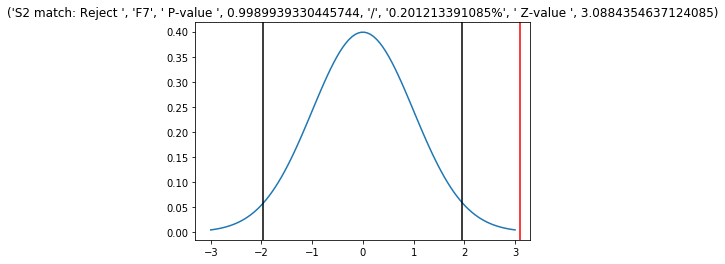

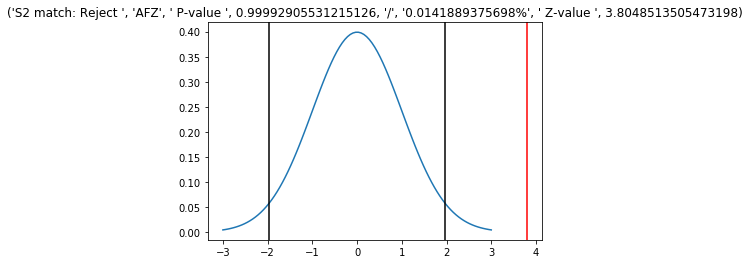

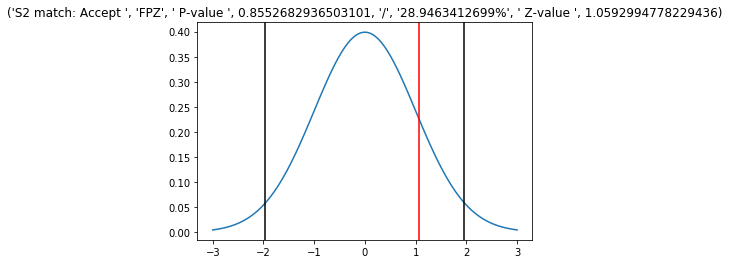

In [13]:
## 4.22 S2 match ##
# Check for 64 channel for stumulus 'S2 match'

s2m_accept={}
s2m_reject={}
sit=1
for i in range(0,64):
    z0=(all_a_mean[sit][0][i]-all_c_mean[sit][0][i])/sqrt((pow(all_a_std[sit][0][i],2)/all_a_n[sit][0][i])+(pow(all_c_std[sit][0][i],2)/all_c_n[sit][0][i]))
    if -1.959 < z0 < 1.959:
        p_value=st.norm.cdf(z0)
        alpha=str(st.norm.cdf(-z0)*2*100)+"%"
        message=("S2 match: Accept ",index_map[i]," P-value ",p_value,"/",alpha," Z-value ",z0)
        normplot(z0,message)
        s2m_accept[i]=p_value
    else:
        p_value=st.norm.cdf(z0)
        alpha=str(st.norm.cdf(-z0)*2*100)+"%"
        message=("S2 match: Reject ",index_map[i]," P-value ",p_value,"/",alpha," Z-value ",z0)
        normplot(z0,message)
        s2m_reject[i]=p_value

# Here are 64 Plots #RED# line shows z value, while #BLACK# line depicks confidence interval  

In [14]:
# Now to conclude S2 match test for all 64 channels

print("Accepted Channel that observed no significant difference between alcohol and control")
print([ index_map[i] for i in s2m_accept],"\n")

print("Rejected Channel that observed significant difference between alcohol and control")
print([ index_map[i] for i in s2m_reject])

Accepted Channel that observed no significant difference between alcohol and control
['PO7', 'AF8', 'P1', 'OZ', 'P4', 'PO8', 'TP8', 'AF7', 'O1', 'C2', 'CP4', 'CP2', 'O2', 'X', 'P8', 'PO1', 'PZ', 'FP2', 'FP1', 'P2', 'P6', 'PO2', 'FPZ'] 

Rejected Channel that observed significant difference between alcohol and control
['F8', 'FC3', 'CZ', 'CP1', 'C3', 'FC4', 'F6', 'P7', 'C6', 'FT8', 'TP7', 'FCZ', 'CPZ', 'F4', 'F2', 'FC1', 'FC5', 'C4', 'AF2', 'nd', 'F3', 'CP6', 'P5', 'FC2', 'CP5', 'F1', 'C1', 'C5', 'FZ', 'P3', 'CP3', 'T8', 'F5', 'Y', 'POZ', 'T7', 'AF1', 'FT7', 'FC6', 'F7', 'AFZ']


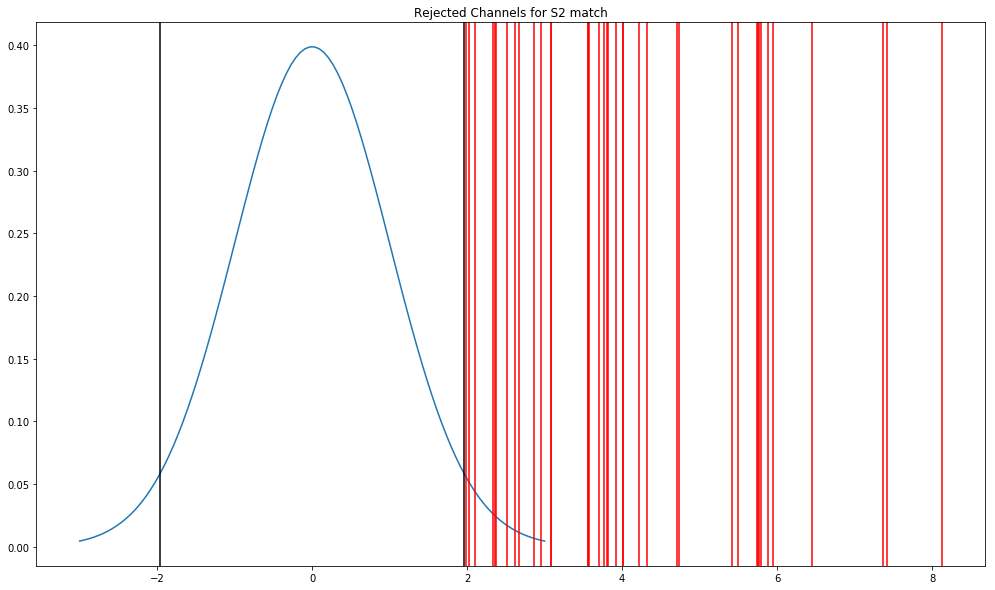

In [15]:
# P-values of rejected channels to depict their significance

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu-3*variance,mu+3*variance, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.axvline(x=-1.96,color='k')
plt.axvline(x=1.96,color='k')
for l in s2m_reject:
    #print(st.norm.ppf(s1_reject[l]))
    plt.axvline(x=st.norm.ppf(s2m_reject[l]),color='r')
plt.title("Rejected Channels for S2 match")
fig = plt.gcf()
fig.set_size_inches(17, 10)
plt.show()
plt.clf()

# Here we can observe that all rejected channels lie outside positive confidence interwal


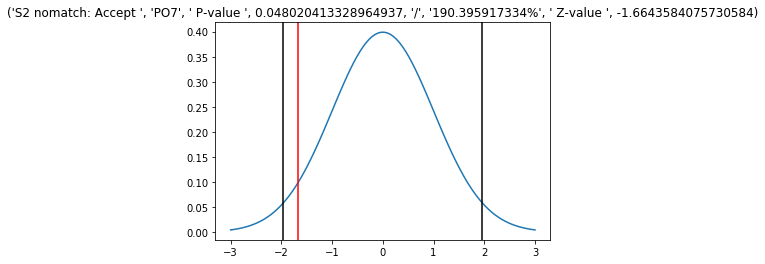

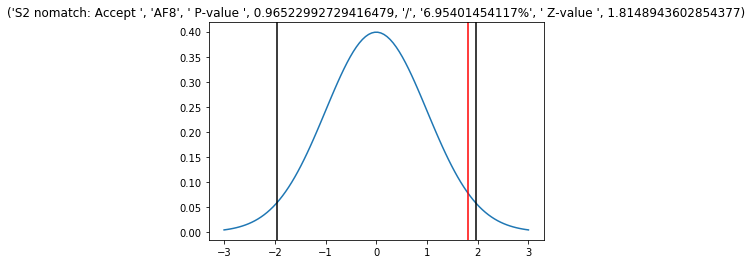

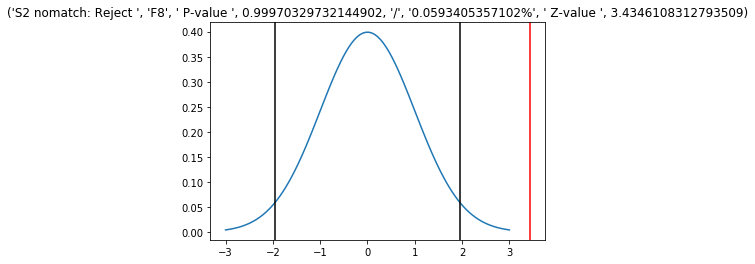

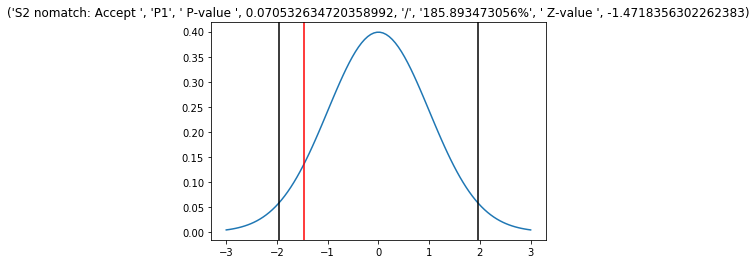

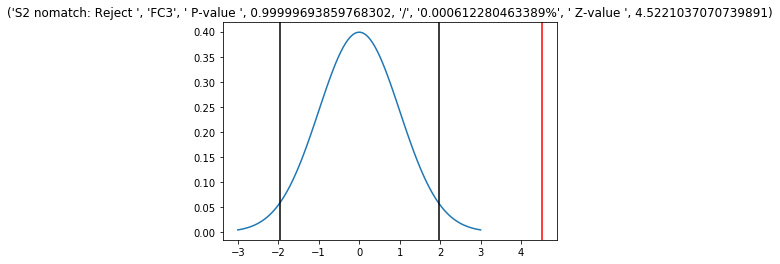

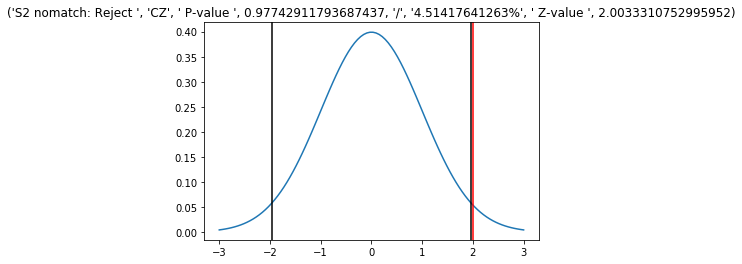

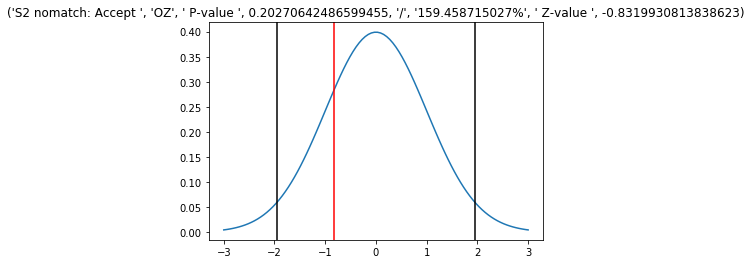

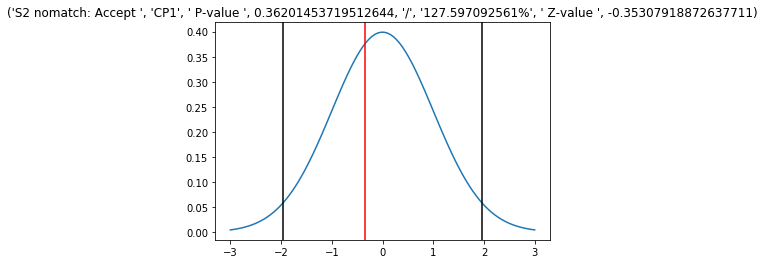

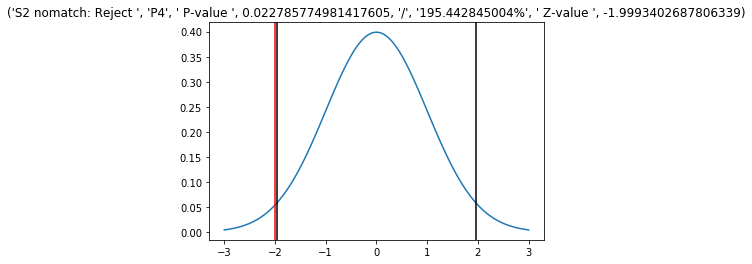

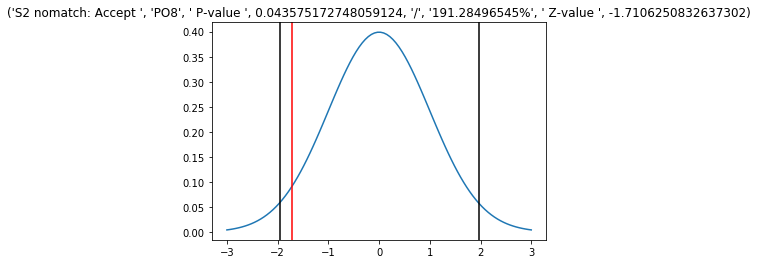

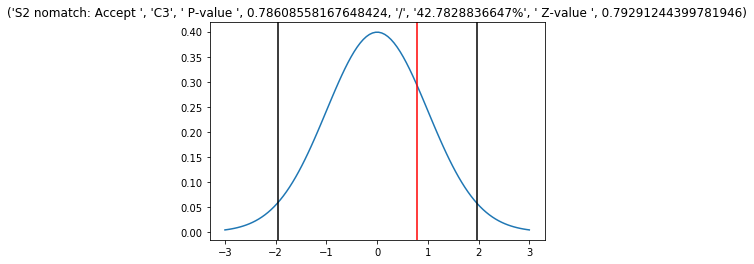

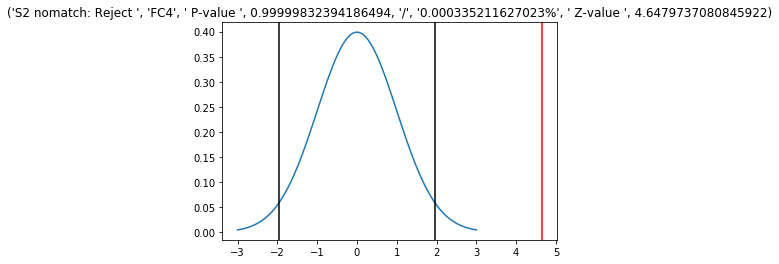

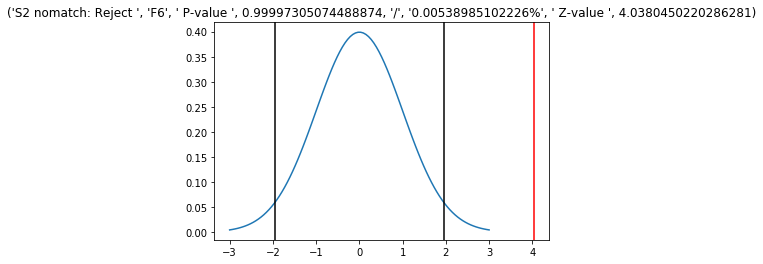

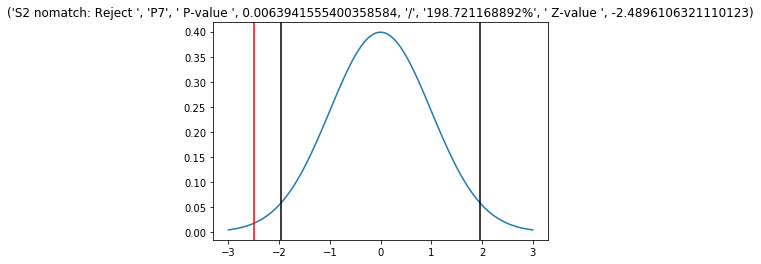

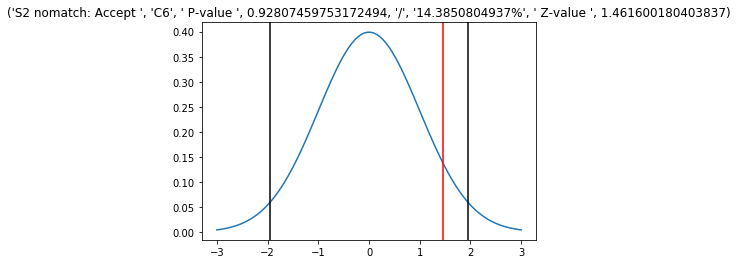

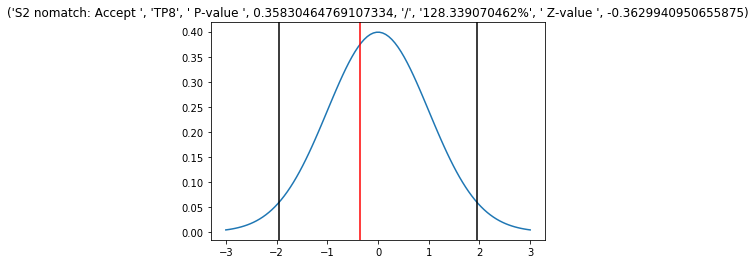

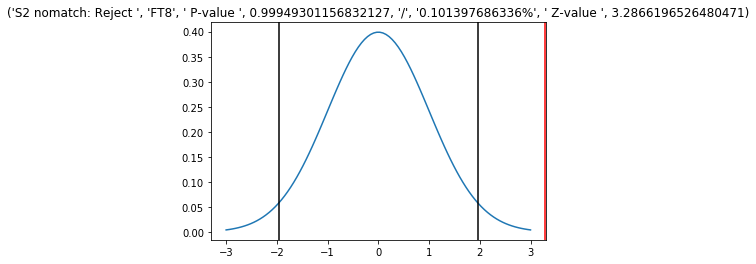

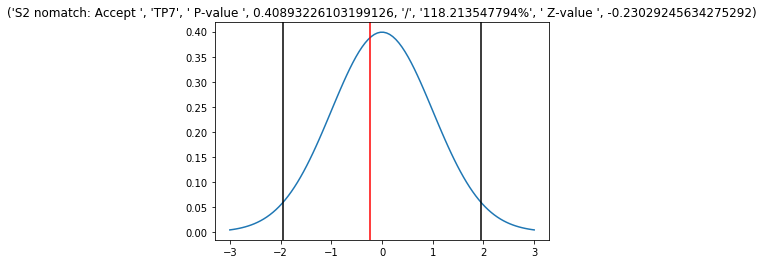

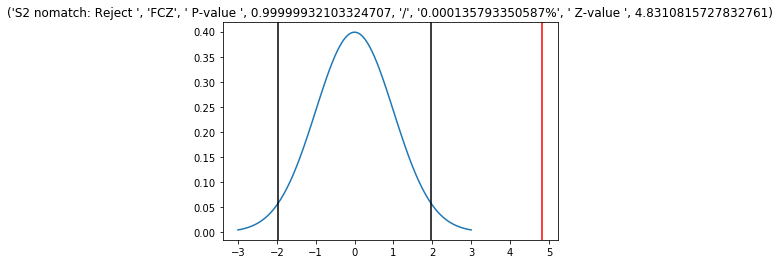

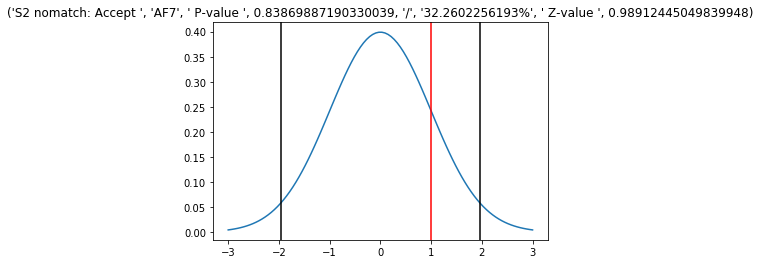

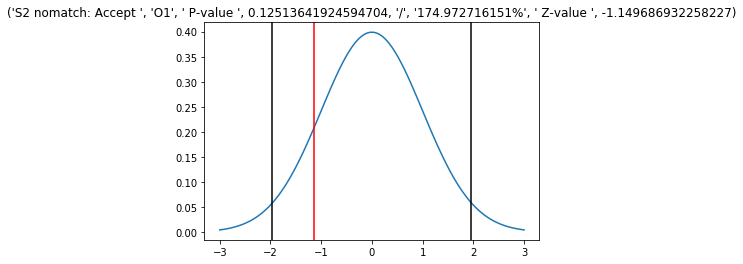

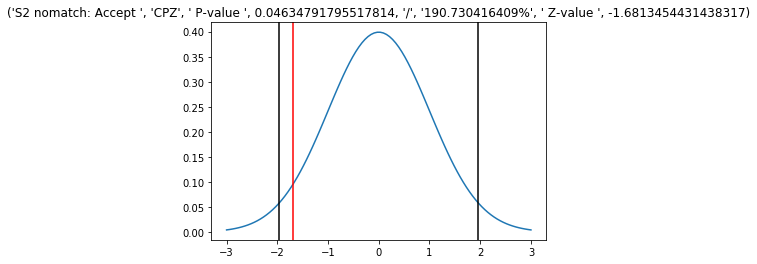

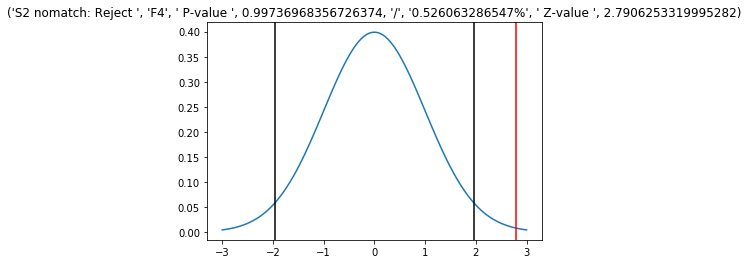

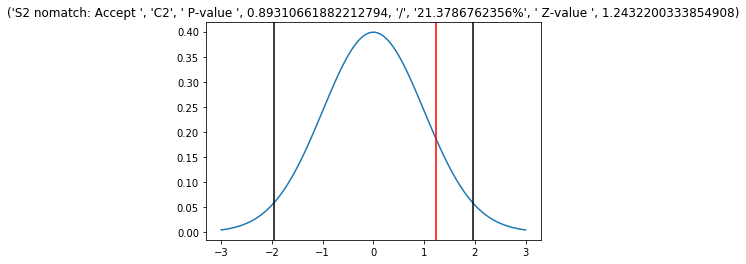

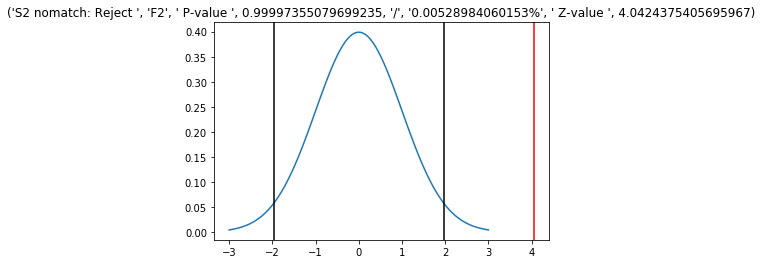

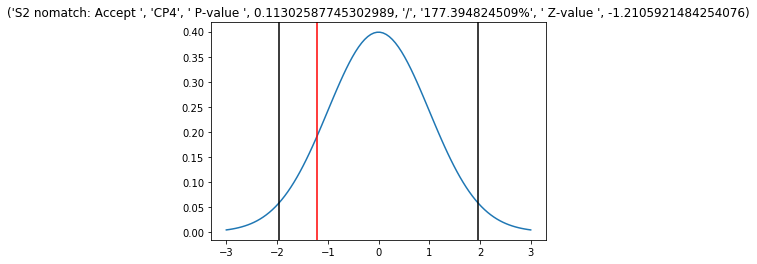

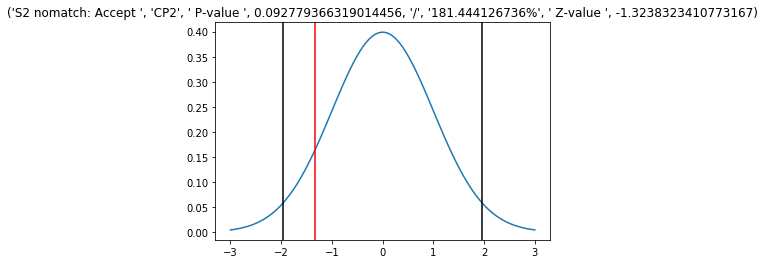

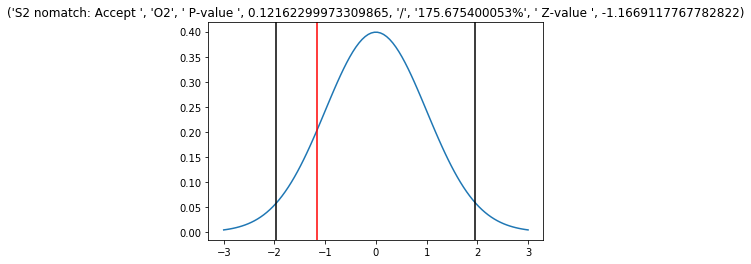

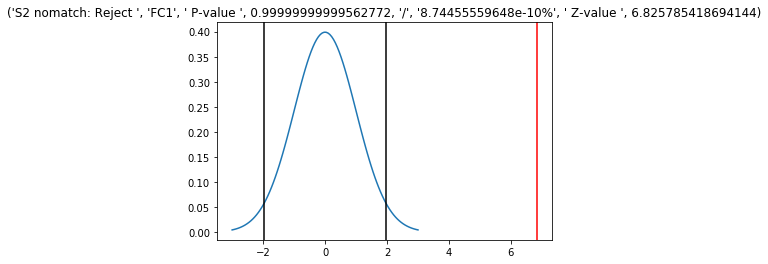

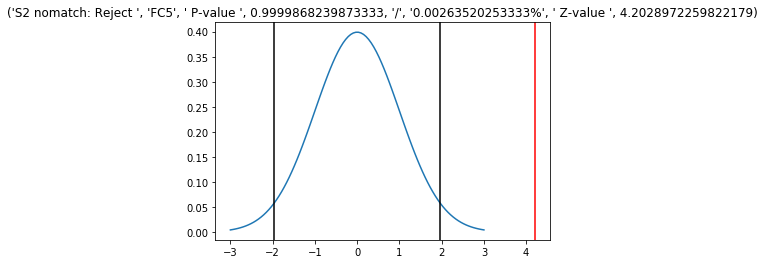

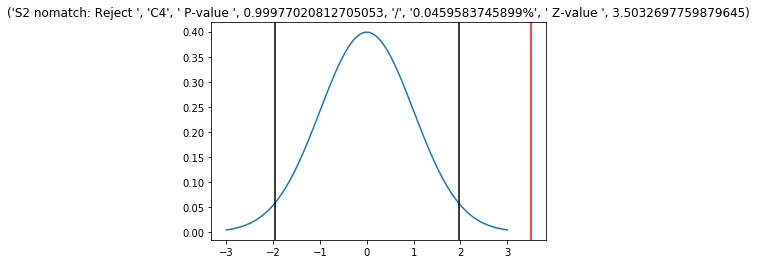

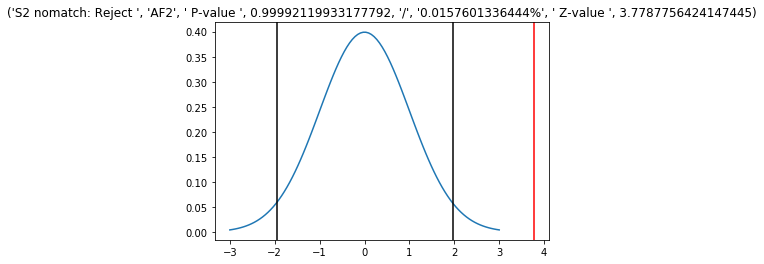

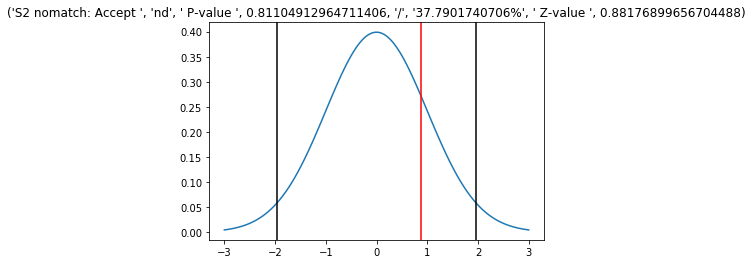

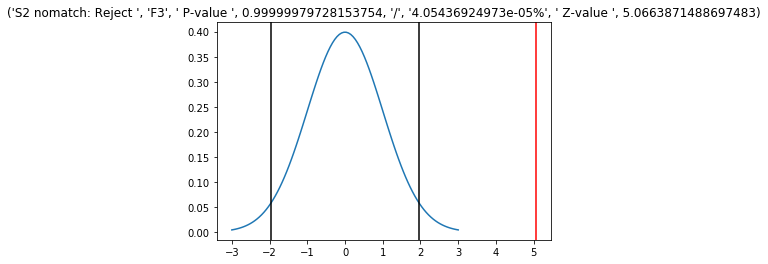

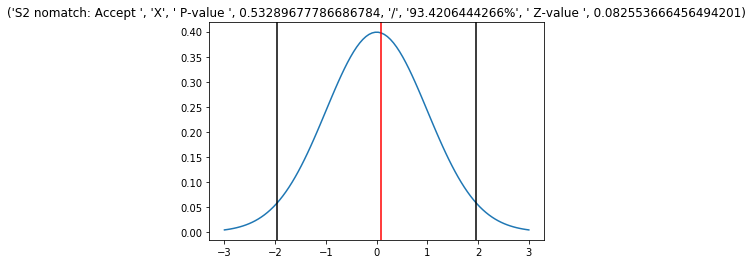

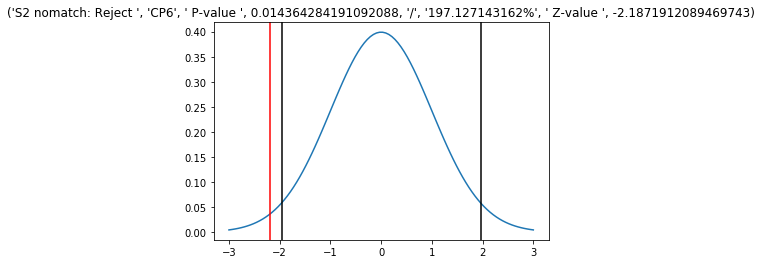

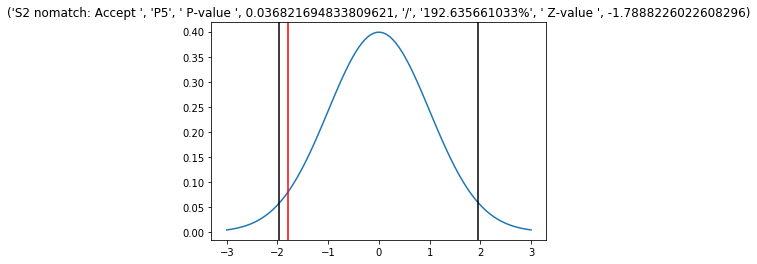

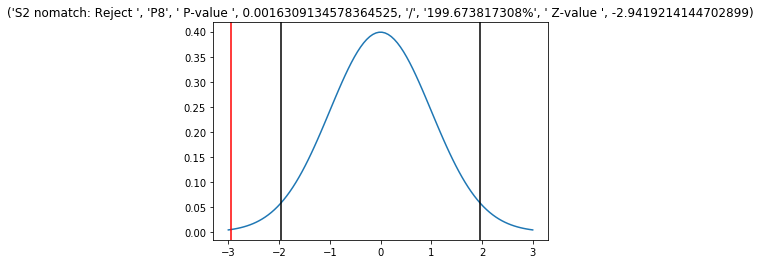

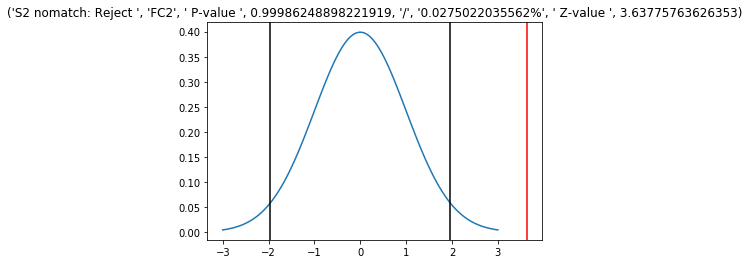

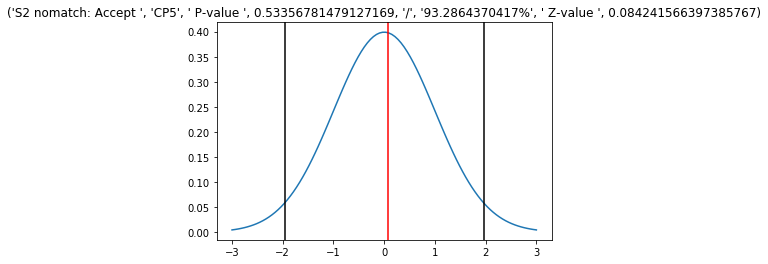

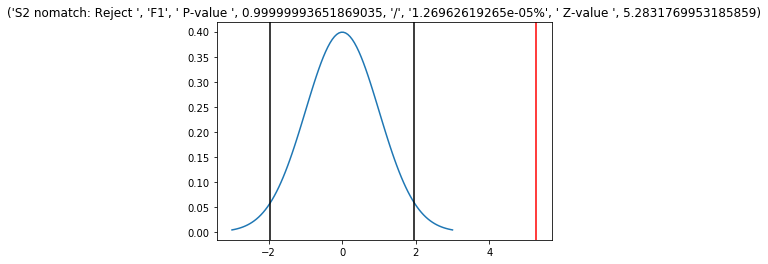

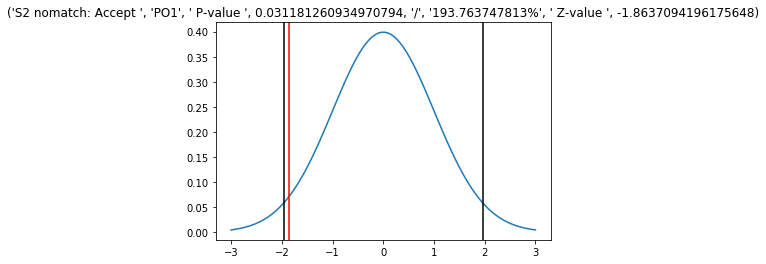

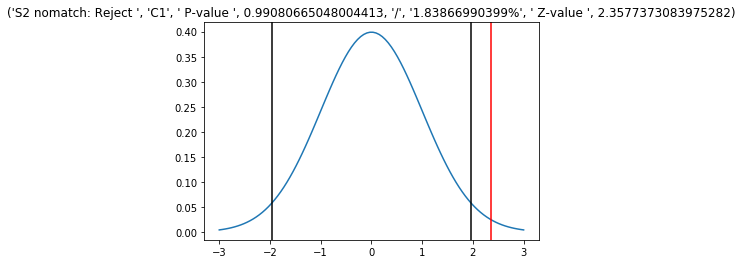

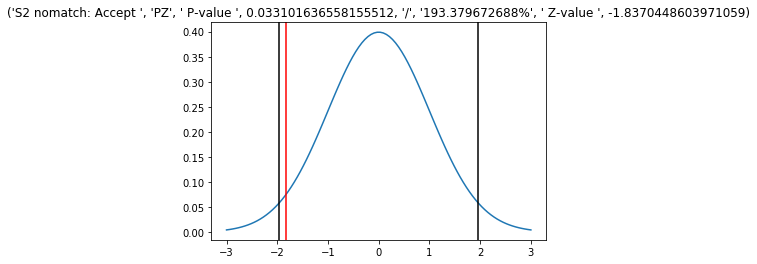

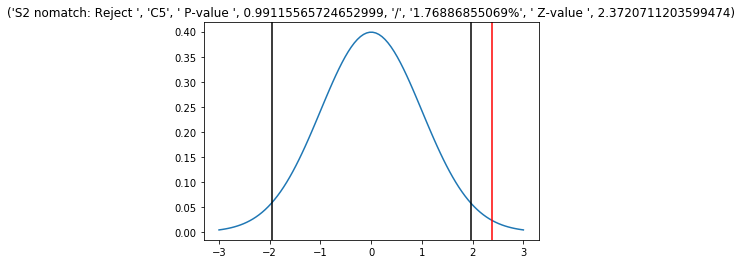

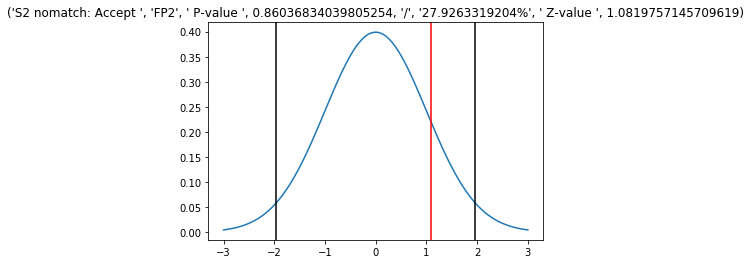

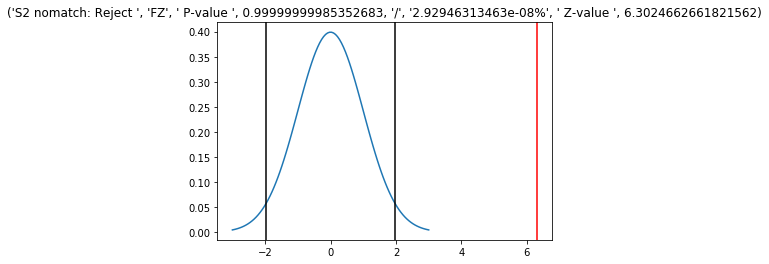

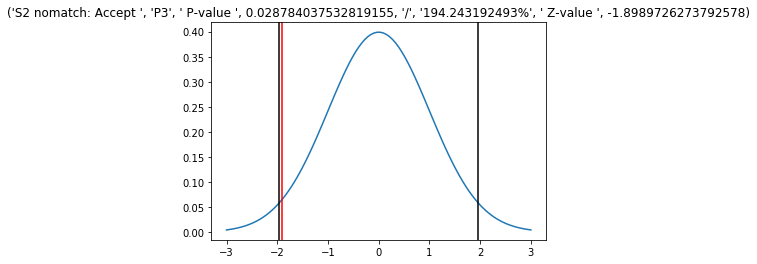

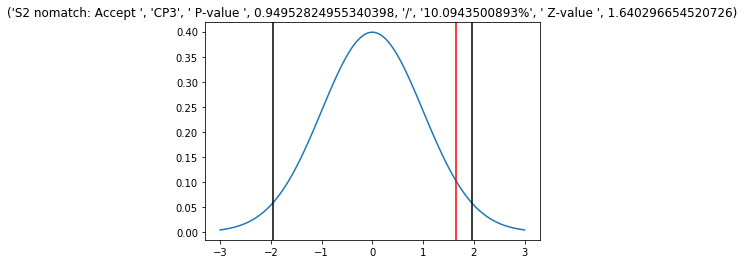

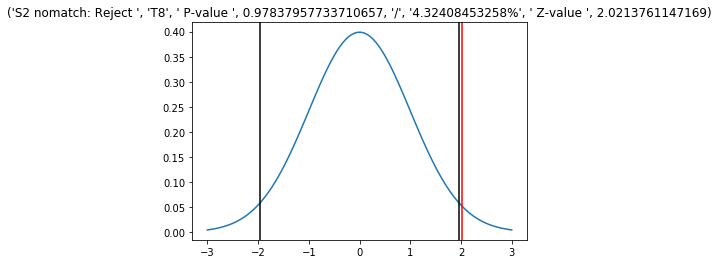

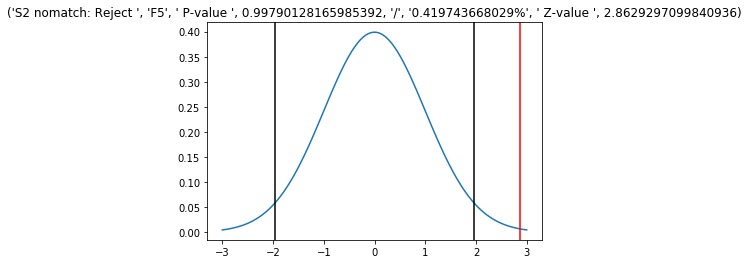

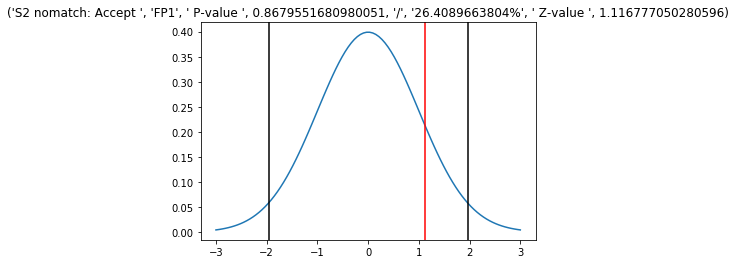

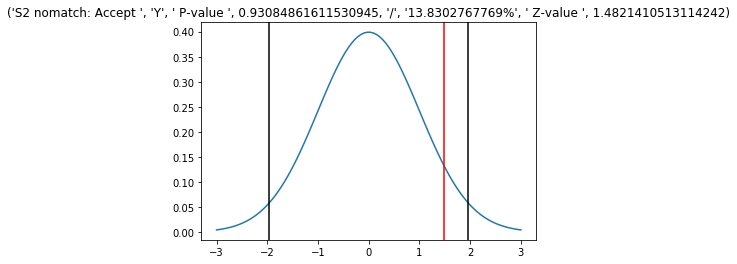

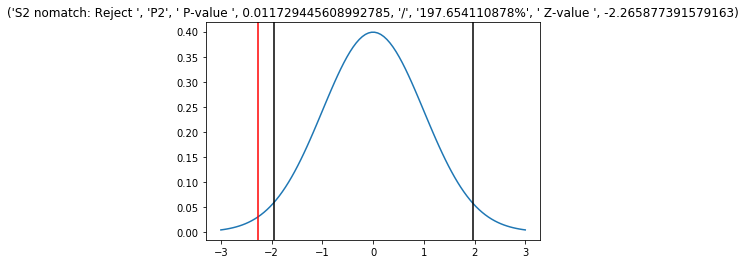

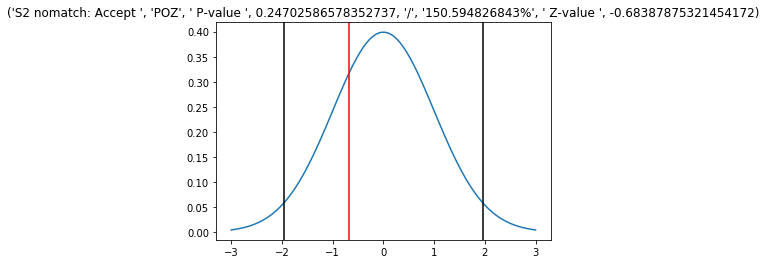

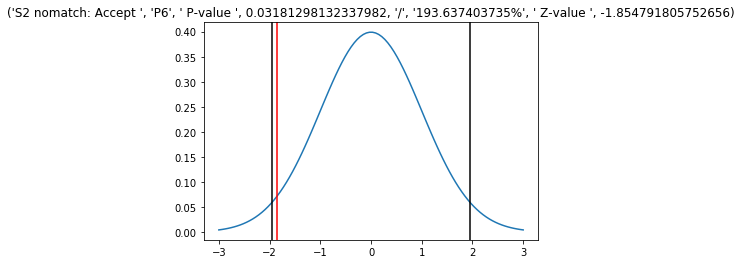

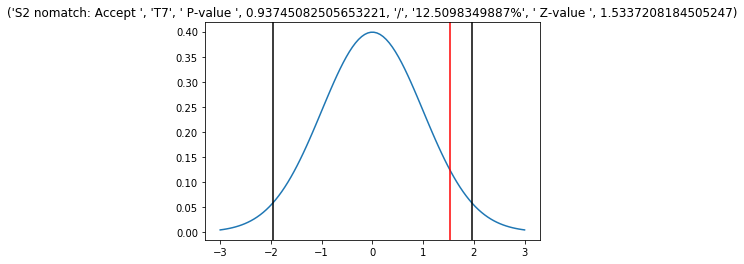

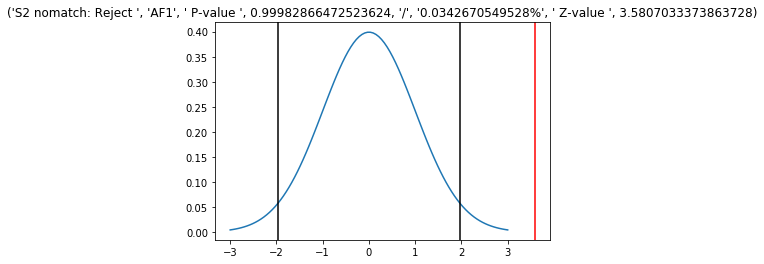

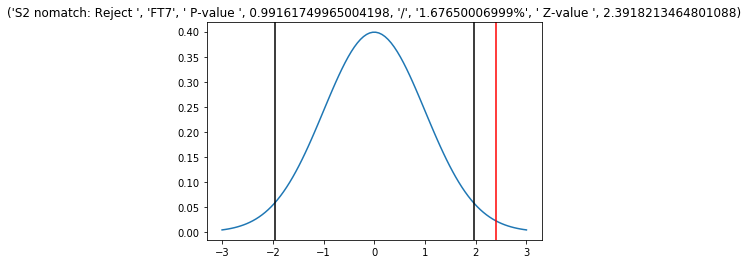

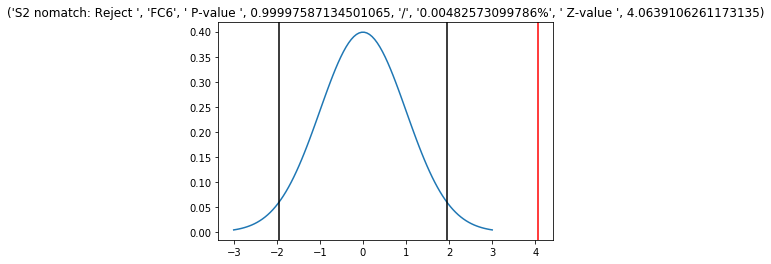

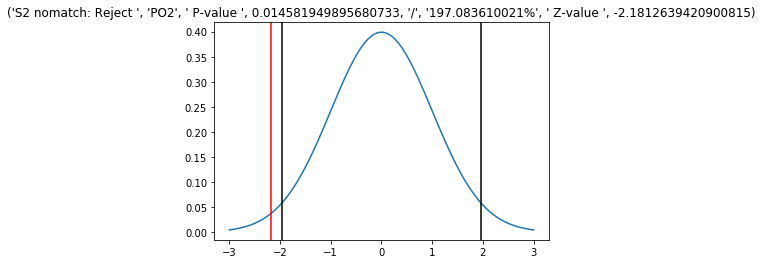

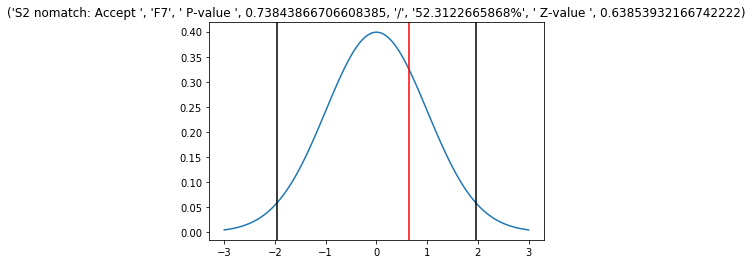

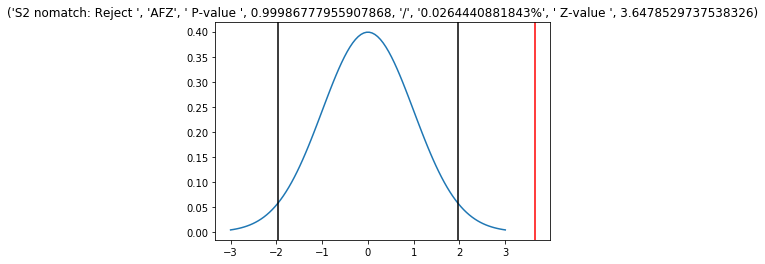

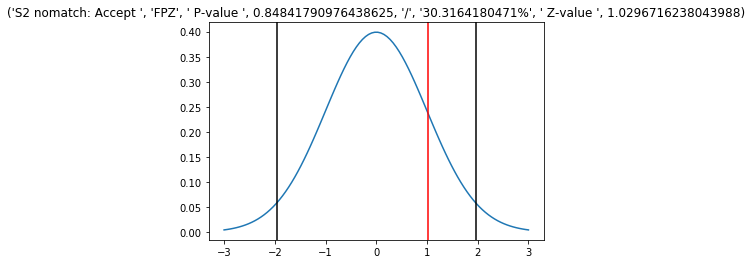

In [16]:
## 4.23 S1 nomatch ##
# Check for 64 channel for stumulus 'S2 nomatch'

s2n_accept={}
s2n_reject={}
sit=2
for i in range(0,64):
    z0=(all_a_mean[sit][0][i]-all_c_mean[sit][0][i])/sqrt((pow(all_a_std[sit][0][i],2)/all_a_n[sit][0][i])+(pow(all_c_std[sit][0][i],2)/all_c_n[sit][0][i]))
    if -1.959 < z0 < 1.959:
        p_value=st.norm.cdf(z0)
        alpha=str(st.norm.cdf(-z0)*2*100)+"%"
        message=("S2 nomatch: Accept ",index_map[i]," P-value ",p_value,"/",alpha," Z-value ",z0)
        normplot(z0,message)
        s2n_accept[i]=p_value
    else:
        p_value=st.norm.cdf(z0)
        alpha=str(st.norm.cdf(-z0)*2*100)+"%"
        message=("S2 nomatch: Reject ",index_map[i]," P-value ",p_value,"/",alpha," Z-value ",z0)
        normplot(z0,message)
        s2n_reject[i]=p_value

In [17]:
# Now to conclude S2 nomatch test for all 64 channels

print("Accepted Channel that observed no significant difference between alcohol and control")
print([ index_map[i] for i in s2n_accept],"\n")

print("Rejected Channel that observed significant difference between alcohol and control")
print([ index_map[i] for i in s2n_reject])

Accepted Channel that observed no significant difference between alcohol and control
['PO7', 'AF8', 'P1', 'OZ', 'CP1', 'PO8', 'C3', 'C6', 'TP8', 'TP7', 'AF7', 'O1', 'CPZ', 'C2', 'CP4', 'CP2', 'O2', 'nd', 'X', 'P5', 'CP5', 'PO1', 'PZ', 'FP2', 'P3', 'CP3', 'FP1', 'Y', 'POZ', 'P6', 'T7', 'F7', 'FPZ'] 

Rejected Channel that observed significant difference between alcohol and control
['F8', 'FC3', 'CZ', 'P4', 'FC4', 'F6', 'P7', 'FT8', 'FCZ', 'F4', 'F2', 'FC1', 'FC5', 'C4', 'AF2', 'F3', 'CP6', 'P8', 'FC2', 'F1', 'C1', 'C5', 'FZ', 'T8', 'F5', 'P2', 'AF1', 'FT7', 'FC6', 'PO2', 'AFZ']


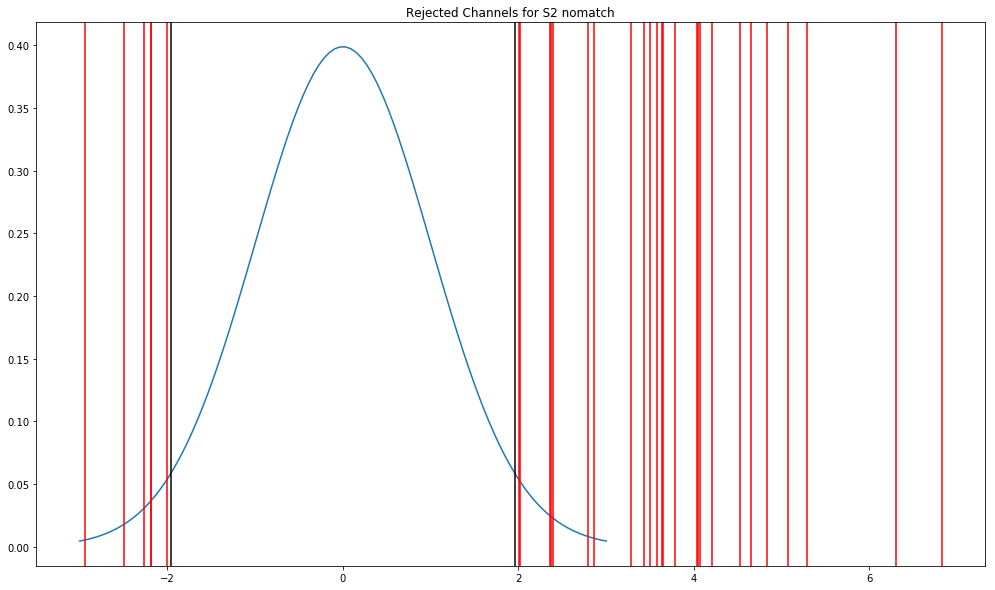

In [128]:
# P-values of rejected channels to depict their significance

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu-3*variance,mu+3*variance, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.axvline(x=-1.96,color='k')
plt.axvline(x=1.96,color='k')
for l in s2n_reject:
    #print(st.norm.ppf(s1_reject[l]))
    plt.axvline(x=st.norm.ppf(s2n_reject[l]),color='r')
plt.title("Rejected Channels for S2 nomatch")
fig = plt.gcf()
fig.set_size_inches(17, 10)
plt.show()
plt.clf()




In [147]:
## 4.3 Common rejects and accepts ##

# Common rejects and accepts in all 3 stimulus
c_accept=[]
c_reject=[]

print("Across 122 recordings")
l=set(s1_accept).intersection(s2m_accept)
p=set(l).intersection(s2n_accept)
c_accept=p
print("Common Accepts: ",[index_map[i] for i in p])

l=set(s1_reject).intersection(s2m_reject)
p=set(l).intersection(s2n_reject)
c_reject=p
print("Common Rejects: ",[index_map[i] for i in p])



Across 122 recordings
Common Accepts:  ['AF8', 'X', 'FP2', 'AF7', 'FP1', 'FPZ']
Common Rejects:  ['F3', 'CP6', 'FC3', 'FC2', 'F1', 'F6', 'P7', 'FZ', 'FCZ', 'F5', 'F4', 'F2', 'AF1', 'FC6', 'FC1', 'AFZ', 'AF2']


In [157]:
## 4.41 Correlation between stimulus of Alcohol ##

com_sa=[all_a_mean[0][0],all_a_mean[1][0],all_a_mean[2][0]]
print("  S1 obj", "S2 match", "S2 nomatch")
print(np.corrcoef(com_sa))

print("\nWe can observe that S2 match and S2 nomatch are significantly correalated for alcohol")

  S1 obj S2 match S2 nomatch
[[ 1.          0.25103738  0.33646722]
 [ 0.25103738  1.          0.98049183]
 [ 0.33646722  0.98049183  1.        ]]

We can observe that S2 match and S2 nomatch are significantly correalated for alcohol


In [158]:
## 4.42 Correlation between stimulus of Control ##

com_sc=[all_c_mean[0][0],all_c_mean[1][0],all_c_mean[2][0]]
print("  S1 obj", "S2 match", "S2 nomatch")
print(np.corrcoef(com_sc))

print("\nWe can observe that S2 match and S2 nomatch are also significantly correalated for control but less than alcohol")

  S1 obj S2 match S2 nomatch
[[ 1.          0.24122364  0.30009912]
 [ 0.24122364  1.          0.96108362]
 [ 0.30009912  0.96108362  1.        ]]

We can observe that S2 match and S2 nomatch are also significantly correalated for control but less than alcohol


In [211]:
## 4.43 Correlation between stimulus S1 obj ##

com_sa=[all_a_mean[0][0],all_c_mean[0][0]]
print("  Alcohol ", " Control; ")
print(np.corrcoef(com_sa))

print("\nWe can observe that both are less correalated")

  Alcohol   Control; 
[[ 1.          0.23634448]
 [ 0.23634448  1.        ]]

We can observe that both are less correalated


In [209]:
## 4.44 Correlation between stimulus S2 match ##

com_sa=[all_a_mean[1][0],all_c_mean[1][0]]
print("  Alcohol ", " Control; ")
print(np.corrcoef(com_sa))

print("\nWe can observe that both are significantly correalated")

  Alcohol   Control; 
[[ 1.          0.96404892]
 [ 0.96404892  1.        ]]

We can observe that both are significantly correalated


In [210]:
## 4.4 Correlation between stimulus S2 nomatch ##

com_sa=[all_a_mean[2][0],all_c_mean[2][0]]
print("  Alcohol ", " Control; ")
print(np.corrcoef(com_sa))

print("\nWe can observe that both are correalated")

  Alcohol   Control; 
[[ 1.         0.8614625]
 [ 0.8614625  1.       ]]

We can observe that both are correalated
